$\textbf{NOM PRENOM : DARGEL FLORIAN}$

$\textbf{Projet House Prices - Advanced Regression Techniques}$

Description du projet : https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview/tutorials

# 0] Importation Packages

In [2]:
import pandas as pd #Importation de données
import numpy as np #Manipulation de données
import matplotlib.pyplot as plt #Affichage graphique
import seaborn as sns #Affichage graphique avancé
from sklearn.model_selection import train_test_split 
from sklearn import linear_model #Importation modèle linéaire
from math import *

from plotly.offline import init_notebook_mode, iplot
import plotly.figure_factory as ff

import scipy.stats as ss

# 1] Informations sur les données

In [3]:
data = pd.read_csv("train.csv")

In [4]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [6]:
data = data.drop("Id", axis=1)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [8]:
#Statistiques descriptives variables quantitatives
data.describe().T 

count           mean           std      min        25%  \
MSSubClass     1460.0      56.897260     42.300571     20.0      20.00   
LotFrontage    1201.0      70.049958     24.284752     21.0      59.00   
LotArea        1460.0   10516.828082   9981.264932   1300.0    7553.50   
OverallQual    1460.0       6.099315      1.382997      1.0       5.00   
OverallCond    1460.0       5.575342      1.112799      1.0       5.00   
YearBuilt      1460.0    1971.267808     30.202904   1872.0    1954.00   
YearRemodAdd   1460.0    1984.865753     20.645407   1950.0    1967.00   
MasVnrArea     1452.0     103.685262    181.066207      0.0       0.00   
BsmtFinSF1     1460.0     443.639726    456.098091      0.0       0.00   
BsmtFinSF2     1460.0      46.549315    161.319273      0.0       0.00   
BsmtUnfSF      1460.0     567.240411    441.866955      0.0     223.00   
TotalBsmtSF    1460.0    1057.429452    438.705324      0.0     795.75   
1stFlrSF       1460.0    1162.626712    386.587738    334.0     882.00   
2ndFlrSF       1460.0     346.992466    436.528436      0.0       0.00   
LowQualFinSF   1460.0       5.844521     48.623081      0.0       0.00   
GrLivArea      1460.0    1515.463699    525.480383    334.0    1129.50   
BsmtFullBath   1460.0       0.425342      0.518911      0.0       0.00   
BsmtHalfBath   1460.0       0.057534      0.238753      0.0       0.00   
FullBath       1460.0       1.565068      0.550916      0.0       1.00   
HalfBath       1460.0       0.382877      0.502885      0.0       0.00   
BedroomAbvGr   1460.0       2.866438      0.815778      0.0       2.00   
KitchenAbvGr   1460.0       1.046575      0.220338      0.0       1.00   
TotRmsAbvGrd   1460.0       6.517808      1.625393      2.0       5.00   
Fireplaces     1460.0       0.613014      0.644666      0.0       0.00   
GarageYrBlt    1379.0    1978.506164     24.689725   1900.0    1961.00   
GarageCars     1460.0       1.767123      0.747315      0.0       1.00   
GarageArea     1460.0     472.980137    213.804841      0.0     334.50   
WoodDeckSF     1460.0      94.244521    125.338794      0.0       0.00   
OpenPorchSF    1460.0      46.660274     66.256028      0.0       0.00   
EnclosedPorch  1460.0      21.954110     61.119149      0.0       0.00   
3SsnPorch      1460.0       3.409589     29.317331      0.0       0.00   
ScreenPorch    1460.0      15.060959     55.757415      0.0       0.00   
PoolArea       1460.0       2.758904     40.177307      0.0       0.00   
MiscVal        1460.0      43.489041    496.123024      0.0       0.00   
MoSold         1460.0       6.321918      2.703626      1.0       5.00   
YrSold         1460.0    2007.815753      1.328095   2006.0    2007.00   
SalePrice      1460.0  180921.195890  79442.502883  34900.0  129975.00   

                    50%        75%       max  
MSSubClass         50.0      70.00     190.0  
LotFrontage        69.0      80.00     313.0  
LotArea          9478.5   11601.50  215245.0  
OverallQual         6.0       7.00      10.0  
OverallCond         5.0       6.00       9.0  
YearBuilt        1973.0    2000.00    2010.0  
YearRemodAdd     1994.0    2004.00    2010.0  
MasVnrArea          0.0     166.00    1600.0  
BsmtFinSF1        383.5     712.25    5644.0  
BsmtFinSF2          0.0       0.00    1474.0  
BsmtUnfSF         477.5     808.00    2336.0  
TotalBsmtSF       991.5    1298.25    6110.0  
1stFlrSF         1087.0    1391.25    4692.0  
2ndFlrSF            0.0     728.00    2065.0  
LowQualFinSF        0.0       0.00     572.0  
GrLivArea        1464.0    1776.75    5642.0  
BsmtFullBath        0.0       1.00       3.0  
BsmtHalfBath        0.0       0.00       2.0  
FullBath            2.0       2.00       3.0  
HalfBath            0.0       1.00       2.0  
BedroomAbvGr        3.0       3.00       8.0  
KitchenAbvGr        1.0       1.00       3.0  
TotRmsAbvGrd        6.0       7.00      14.0  
Fireplaces          1.0       1.00       3.0  
GarageYrBlt      1980.0    2

In [8]:
#Information sur les variables catégorielles

table_categorical = ff.create_table(data.describe(include=['O']).T,
index=True, index_title='Categorical columns')
iplot(table_categorical) #Informations variables catégorielles

# 2] Valeurs manquantes

<AxesSubplot:>

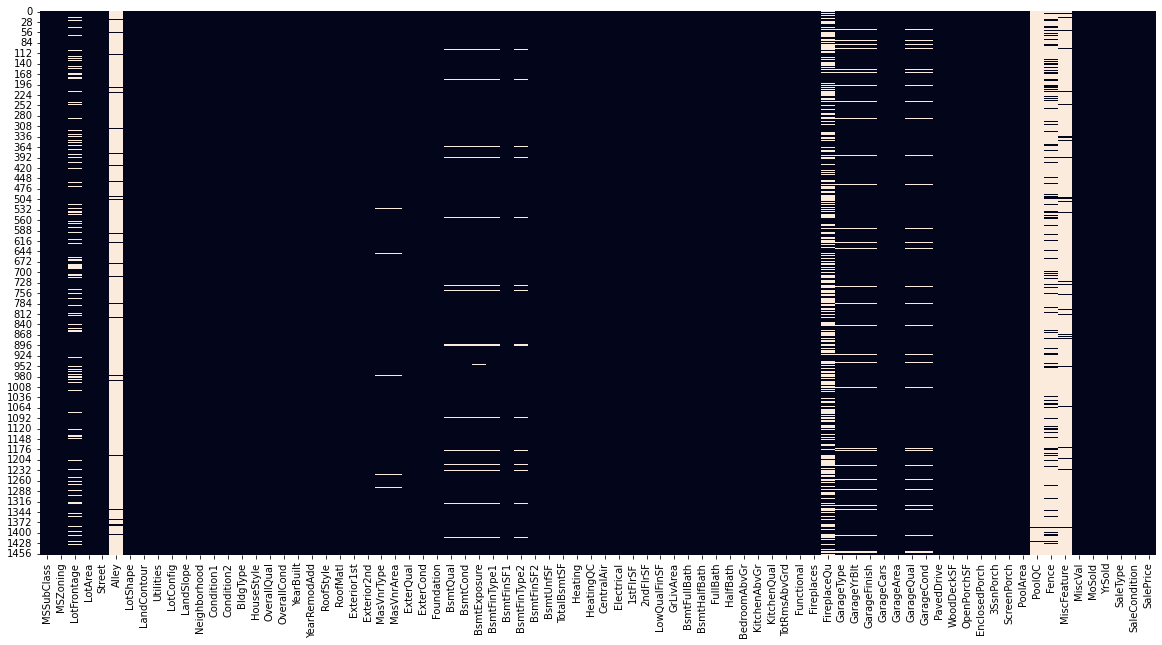

In [9]:
plt.figure(figsize=(20,10))
sns.heatmap(data.isna(), cbar= False)

Belge : Valeure manquante 

Noir: Valeure présente

In [10]:
#Pourcentages de valeurs manquantes
(data.isna().sum()/data.shape[0]).sort_values(ascending = False) 

PoolQC         0.995205
MiscFeature    0.963014
Alley          0.937671
Fence          0.807534
FireplaceQu    0.472603
                 ...   
Heating        0.000000
HeatingQC      0.000000
MSZoning       0.000000
1stFlrSF       0.000000
SalePrice      0.000000
Length: 80, dtype: float64

In [11]:
#Sélection des variables avec moins de 80% de valeurs manquantes
data.columns[data.isna().sum()/data.shape[0] < 0.8] 

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [12]:
new_data = data[data.columns[data.isna().sum()/data.shape[0] < 0.8]]
new_data

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL         65.0     8450   Pave      Reg         Lvl   
1             20       RL         80.0     9600   Pave      Reg         Lvl   
2             60       RL         68.0    11250   Pave      IR1         Lvl   
3             70       RL         60.0     9550   Pave      IR1         Lvl   
4             60       RL         84.0    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1455          60       RL         62.0     7917   Pave      Reg         Lvl   
1456          20       RL         85.0    13175   Pave      Reg         Lvl   
1457          70       RL         66.0     9042   Pave      Reg         Lvl   
1458          20       RL         68.0     9717   Pave      Reg         Lvl   
1459          20       RL         75.0     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0       AllPub    Inside       Gtl  ...             0         0           0   
1       AllPub       FR2       Gtl  ...             0         0           0   
2       AllPub    Inside       Gtl  ...             0         0           0   
3       AllPub    Corner       Gtl  ...           272         0           0   
4       AllPub       FR2       Gtl  ...             0         0           0   
...        ...       ...       ...  ...           ...       ...         ...   
1455    AllPub    Inside       Gtl  ...             0         0           0   
1456    AllPub    Inside       Gtl  ...             0         0           0   
1457    AllPub    Inside       Gtl  ...             0         0           0   
1458    AllPub    Inside       Gtl  ...           112         0           0   
1459    AllPub    Inside       Gtl  ...             0         0           0   

     PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0           0       0       2    2008        WD         Normal    208500  
1           0       0       5    2007        WD         Normal    181500  
2           0       0       9    2008        WD         Normal    223500  
3           0       0       2    2006        WD        Abnorml    140000  
4           0       0      12    2008        WD         Normal    250000  
...       ...     ...     ...     ...       ...            ...       ...  
1455        0       0       8    2007        WD         Normal    175000  
1456        0       0       2    2010        WD         Normal    210000  
1457        0    2500       5    2010        WD         Normal    266500  
1458        0       0       4    2010        WD         Normal    142125  
1459        0       0       6    2008        WD         Normal    147500  

[1460 rows x 76 columns]

In [13]:
#Pourcentages de valeurs manquantes
(new_data.isna().sum()/new_data.shape[0]).sort_values(ascending = False) 

FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
                  ...   
TotalBsmtSF     0.000000
Heating         0.000000
MSZoning        0.000000
CentralAir      0.000000
SalePrice       0.000000
Length: 76, dtype: float64

La variable "fireplaQu" va être supprimée, elle contient beaucoup de valeur manquante comparé aux autres variables.

In [14]:
new_data = new_data.drop("FireplaceQu", axis=1)
new_data 

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0             60       RL         65.0     8450   Pave      Reg         Lvl   
1             20       RL         80.0     9600   Pave      Reg         Lvl   
2             60       RL         68.0    11250   Pave      IR1         Lvl   
3             70       RL         60.0     9550   Pave      IR1         Lvl   
4             60       RL         84.0    14260   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1455          60       RL         62.0     7917   Pave      Reg         Lvl   
1456          20       RL         85.0    13175   Pave      Reg         Lvl   
1457          70       RL         66.0     9042   Pave      Reg         Lvl   
1458          20       RL         68.0     9717   Pave      Reg         Lvl   
1459          20       RL         75.0     9937   Pave      Reg         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0       AllPub    Inside       Gtl  ...             0         0           0   
1       AllPub       FR2       Gtl  ...             0         0           0   
2       AllPub    Inside       Gtl  ...             0         0           0   
3       AllPub    Corner       Gtl  ...           272         0           0   
4       AllPub       FR2       Gtl  ...             0         0           0   
...        ...       ...       ...  ...           ...       ...         ...   
1455    AllPub    Inside       Gtl  ...             0         0           0   
1456    AllPub    Inside       Gtl  ...             0         0           0   
1457    AllPub    Inside       Gtl  ...             0         0           0   
1458    AllPub    Inside       Gtl  ...           112         0           0   
1459    AllPub    Inside       Gtl  ...             0         0           0   

     PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0           0       0       2    2008        WD         Normal    208500  
1           0       0       5    2007        WD         Normal    181500  
2           0       0       9    2008        WD         Normal    223500  
3           0       0       2    2006        WD        Abnorml    140000  
4           0       0      12    2008        WD         Normal    250000  
...       ...     ...     ...     ...       ...            ...       ...  
1455        0       0       8    2007        WD         Normal    175000  
1456        0       0       2    2010        WD         Normal    210000  
1457        0    2500       5    2010        WD         Normal    266500  
1458        0       0       4    2010        WD         Normal    142125  
1459        0       0       6    2008        WD         Normal    147500  

[1460 rows x 75 columns]

# 3] Séparation numérique et non numérique

4.1] Tableau non numérique

In [15]:
list_nonnum = []
for col in new_data.columns:
    if new_data[col].dtype == object: 
        list_nonnum.append(col)
new_data_nonnumerique = new_data[list_nonnum]
new_data_nonnumerique #Données des variables catégorielles

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave      Reg         Lvl    AllPub       FR2       Gtl   
2          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
4          RL   Pave      IR1         Lvl    AllPub       FR2       Gtl   
...       ...    ...      ...         ...       ...       ...       ...   
1455       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1459       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   

     Neighborhood Condition1 Condition2  ... Electrical KitchenQual  \
0         CollgCr       Norm       Norm  ...      SBrkr          Gd   
1         Veenker      Feedr       Norm  ...      SBrkr          TA   
2         CollgCr       Norm       Norm  ...      SBrkr          Gd   
3         Crawfor       Norm       Norm  ...      SBrkr          Gd   
4         NoRidge       Norm       Norm  ...      SBrkr          Gd   
...           ...        ...        ...  ...        ...         ...   
1455      Gilbert       Norm       Norm  ...      SBrkr          TA   
1456       NWAmes       Norm       Norm  ...      SBrkr          TA   
1457      Crawfor       Norm       Norm  ...      SBrkr          Gd   
1458        NAmes       Norm       Norm  ...      FuseA          Gd   
1459      Edwards       Norm       Norm  ...      SBrkr          TA   

     Functional GarageType GarageFinish GarageQual GarageCond PavedDrive  \
0           Typ     Attchd          RFn         TA         TA          Y   
1           Typ     Attchd          RFn         TA         TA          Y   
2           Typ     Attchd          RFn         TA         TA          Y   
3           Typ     Detchd          Unf         TA         TA          Y   
4           Typ     Attchd          RFn         TA         TA          Y   
...         ...        ...          ...        ...        ...        ...   
1455        Typ     Attchd          RFn         TA         TA          Y   
1456       Min1     Attchd          Unf         TA         TA          Y   
1457        Typ     Attchd          RFn         TA         TA          Y   
1458        Typ     Attchd          Unf         TA         TA          Y   
1459        Typ     Attchd          Fin         TA         TA          Y   

     SaleType SaleCondition  
0          WD        Normal  
1          WD        Normal  
2          WD        Normal  
3          WD       Abnorml  
4          WD        Normal  
...       ...           ...  
1455       WD        Normal  
1456       WD        Normal  
1457       WD        Normal  
1458       WD        Normal  
1459       WD        Normal  

[1460 rows x 38 columns]

In [16]:
new_data_nonnumerique.isna().sum()

MSZoning          0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
KitchenQual       0
Functional        0
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
PavedDrive        0
SaleType          0
SaleCondition     0
dtype: int64

On a très peu de données manquante pour les variables non numérique, les valeurs manquantes seront imputées avec label encoder.

4.2] Tableau numérique

In [17]:
new_data_numerique = new_data.drop(new_data_nonnumerique, axis = 1)
new_data_numerique #Données des variables numériques

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
3             70         60.0     9550            7            5       1915   
4             60         84.0    14260            8            5       2000   
...          ...          ...      ...          ...          ...        ...   
1455          60         62.0     7917            6            5       1999   
1456          20         85.0    13175            6            6       1978   
1457          70         66.0     9042            7            9       1941   
1458          20         68.0     9717            5            6       1950   
1459          20         75.0     9937            5            6       1965   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0             2003       196.0         706           0  ...           0   
1             1976         0.0         978           0  ...         298   
2             2002       162.0         486           0  ...           0   
3             1970         0.0         216           0  ...           0   
4             2000       350.0         655           0  ...         192   
...            ...         ...         ...         ...  ...         ...   
1455          2000         0.0           0           0  ...           0   
1456          1988       119.0         790         163  ...         349   
1457          2006         0.0         275           0  ...           0   
1458          1996         0.0          49        1029  ...         366   
1459          1965         0.0         830         290  ...         736   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0              61              0          0            0         0        0   
1               0              0          0            0         0        0   
2              42              0          0            0         0        0   
3              35            272          0            0         0        0   
4              84              0          0            0         0        0   
...           ...            ...        ...          ...       ...      ...   
1455           40              0          0            0         0        0   
1456            0              0          0            0         0        0   
1457           60              0          0            0         0     2500   
1458            0            112          0            0         0        0   
1459           68              0          0            0         0        0   

      MoSold  YrSold  SalePrice  
0          2    2008     208500  
1          5    2007     181500  
2          9    2008     223500  
3          2    2006     140000  
4         12    2008     250000  
...      ...     ...        ...  
1455       8    2007     175000  
1456       2    2010     210000  
1457       5    2010     266500  
1458       4    2010     142125  
1459       6    2008     147500  

[1460 rows x 37 columns]

In [18]:
new_data_numerique.isna().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

Les valeurs manquantes sont remplacées par la médiane

In [19]:
#Remplacer les valeurs manquantes par la mediane
for col in new_data_numerique.columns:
    if new_data_numerique[col].dtype == np.number: #valeur quantitative
        new_data_numerique[col] = new_data_numerique[col].fillna(new_data_numerique[col].median())

C:\Users\na_to\AppData\Local\Temp\ipykernel_16612\3444447283.py:3: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.



# 4] Data numérique : Selection de variables et analyse de données

In [20]:
new_data_numerique_2 = new_data_numerique

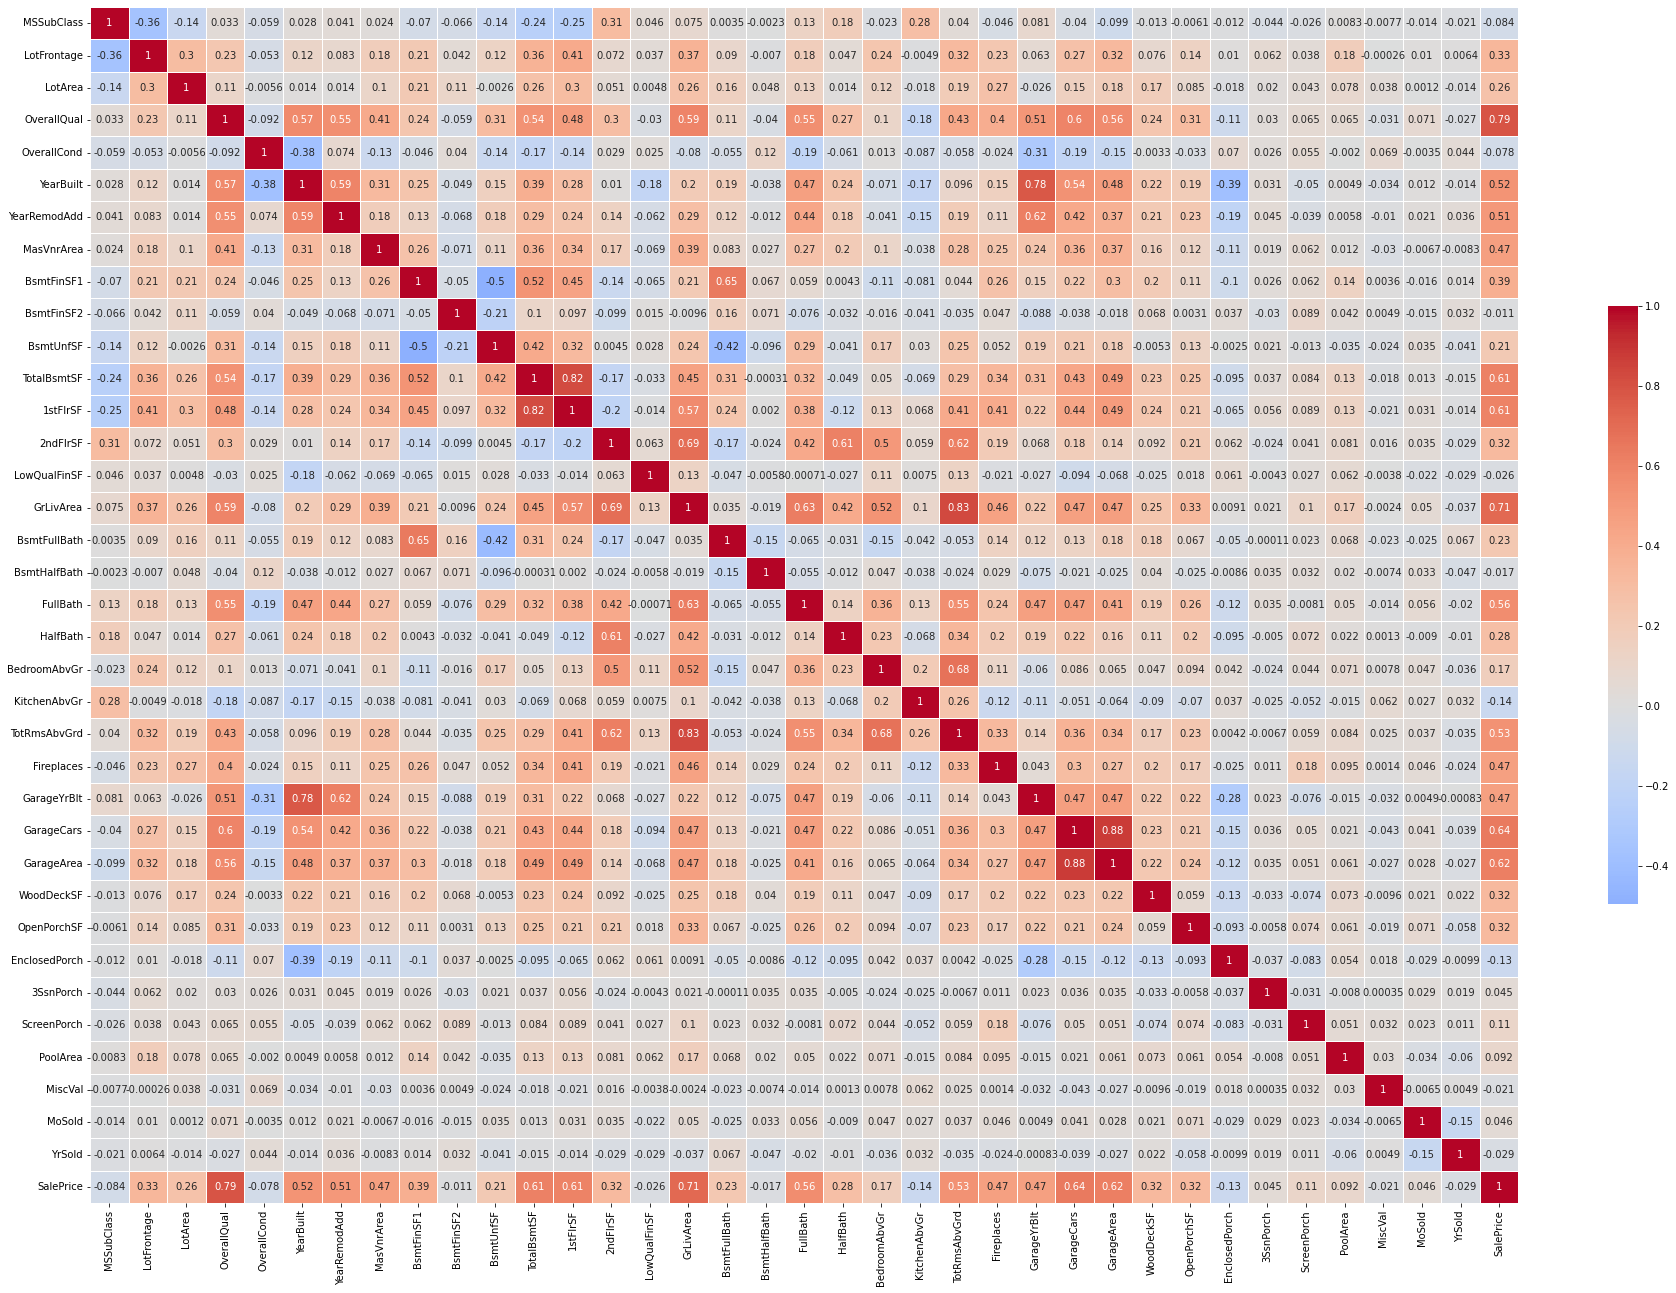

In [21]:
plt.figure(figsize = (30,10))
h = sns.heatmap(new_data_numerique_2.corr(), linewidths=0.8, center = 0, cbar_kws={"shrink": .5}, cmap = 'coolwarm', annot = True)
h.figure.set_size_inches(32,22)
plt.show()

## 4.1] Visualisation des corrélations sous forme de graphe

In [22]:
df = new_data_numerique_2.copy()
correlation_matrix = new_data_numerique_2.corr()

In [23]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import seaborn as sns
from plotly.offline import init_notebook_mode

# plotly offline mode
init_notebook_mode(connected=True)

# notebook formatting
from IPython.core.display import HTML, display

C:\Users\na_to\AppData\Local\Temp\ipykernel_16612\1045674523.py:13: DeprecationWarning:

Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display



In [24]:
# obtenir le nombre de lignes et de colonnes de l'ensemble de données
df_shape = new_data_numerique_2.corr().shape
print(f"There are {df_shape[0]} rows and {df_shape[1]} columns in the dataset")

There are 37 rows and 37 columns in the dataset


In [25]:
# convertir la matrice en liste d'arêtes et renommer les colonnes
edges = correlation_matrix.stack().reset_index()
edges.columns = ["asset_1", "asset_2", "correlation"]

# supprimer les auto-corrélations
edges = edges.loc[edges["asset_1"] != edges["asset_2"]].copy()

# montrer les 5 premières lignes de la liste des bords du cadre de données.
edges.head()

asset_1      asset_2  correlation
1  MSSubClass  LotFrontage    -0.356718
2  MSSubClass      LotArea    -0.139781
3  MSSubClass  OverallQual     0.032628
4  MSSubClass  OverallCond    -0.059316
5  MSSubClass    YearBuilt     0.027850

In [26]:
# créer un graphe non orienté avec des poids correspondant à la magnitude de la corrélation
G0 = nx.from_pandas_edgelist(edges, "asset_1", "asset_2", edge_attr=["correlation"])

# print out the graph info
print(nx.info(G0))

Graph with 37 nodes and 666 edges


C:\Users\na_to\AppData\Local\Temp\ipykernel_16612\1696616018.py:5: DeprecationWarning:

info is deprecated and will be removed in version 3.0.




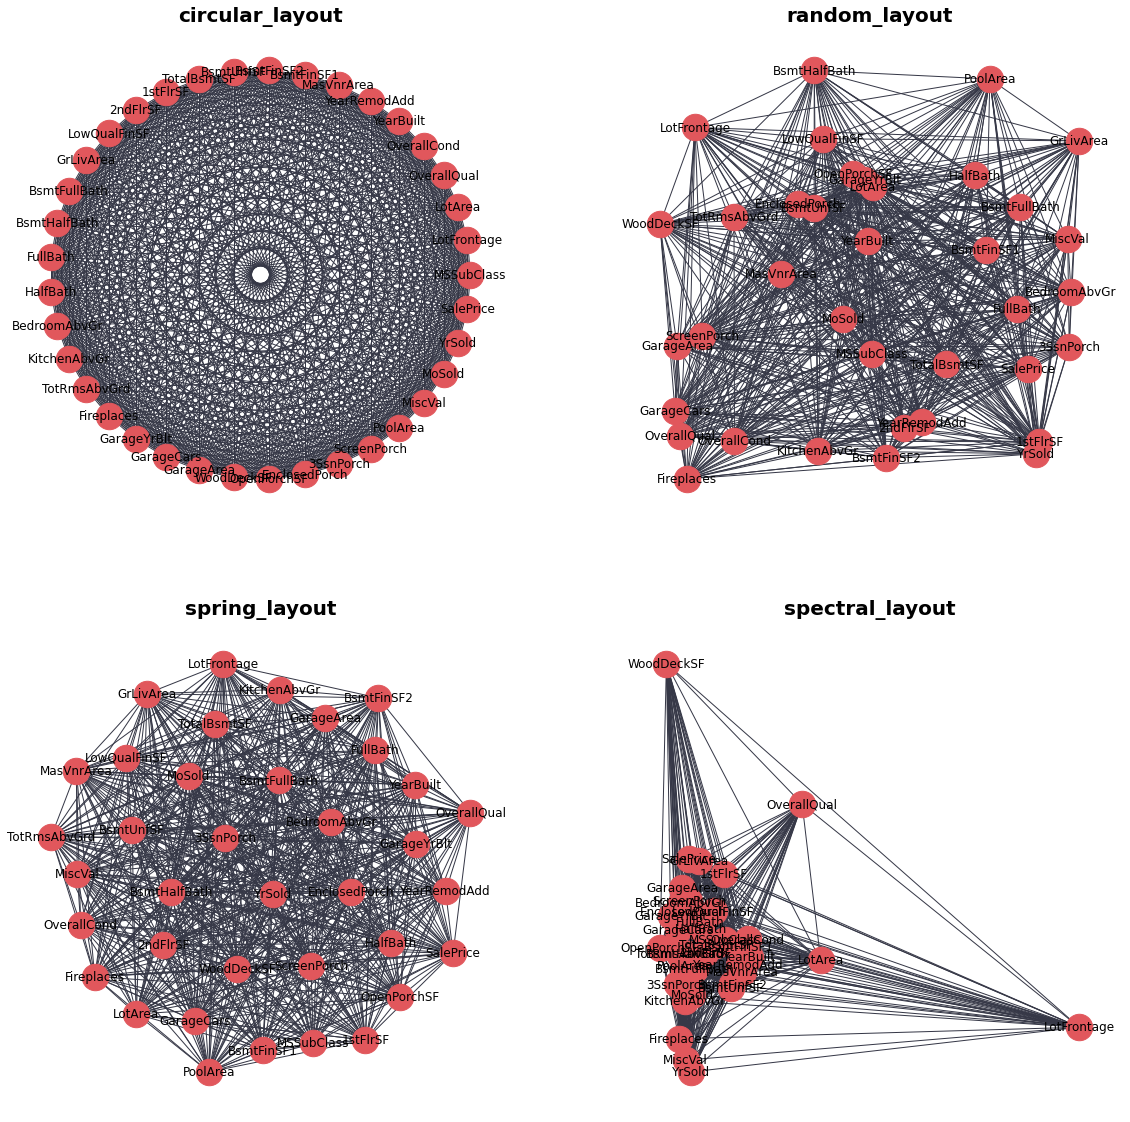

In [27]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 20))

# enregistrer les différentes fonctions de mise en page dans une liste
layouts = [nx.circular_layout, nx.random_layout, nx.spring_layout, nx.spectral_layout]

# Affichage 
for layout, ax in zip(layouts, axs.ravel()):
    nx.draw(
        G0,
        with_labels=True,
        node_size=700,
        node_color="#e1575c",
        edge_color="#363847",
        pos=layout(G0),
        ax=ax,
    )
    ax.set_title(layout.__name__, fontsize=20, fontweight="bold")

plt.show()

In [28]:
# Méthode du "gagnant prend tout" - fixer un seuil de corrélation minimal pour éliminer certaines personnes.
# poids from the diagram
threshold = 0.5

# créer un nouveau graphe à partir de la liste d'arêtes
Gx = nx.from_pandas_edgelist(edges, "asset_1", "asset_2", edge_attr=["correlation"])

#  liste pour stocker les arêtes à supprimer
remove = []
# Boucle à travers les arêtes de Gx et recherche des corrélations qui sont en dessous du seuil.
for asset_1, asset_2 in Gx.edges():
    corr = Gx[asset_1][asset_2]["correlation"]
    # ajouter à la liste des noeuds à supprimer si abs(corr) < seuil
    if abs(corr) < threshold:
        remove.append((asset_1, asset_2))

# supprimer les arêtes contenus dans la liste de suppression
Gx.remove_edges_from(remove)

print(str(len(remove)) + " edges removed")

630 edges removed


In [29]:
def assign_colour(correlation):
    if correlation <= -0.75:
        return "blue"
    elif -0.75 < correlation <= -0.5:
        return 'green'
    elif 0.75 > correlation >= 0.5:
        return 'orange'
    else:
        return "red"  


def assign_thickness(correlation, benchmark_thickness=2, scaling_factor=3):
    return benchmark_thickness * abs(correlation) ** scaling_factor


def assign_node_size(degree, scaling_factor=50):
    return degree * scaling_factor


# attribuer des couleurs aux bords en fonction de la corrélation 
# Attribuer l'épaisseur des bords en fonction de l'ampleur de la corrélation.
edge_colours = []
edge_width = []
for key, value in nx.get_edge_attributes(Gx, "correlation").items():
    edge_colours.append(assign_colour(value))
    edge_width.append(assign_thickness(value))

# assign node size depending on number of connections (degree)
node_size = []
for key, value in dict(Gx.degree).items():
    node_size.append(assign_node_size(value))



C:\Users\na_to\AppData\Local\Temp\ipykernel_16612\217405383.py:35: MatplotlibDeprecationWarning:

Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.



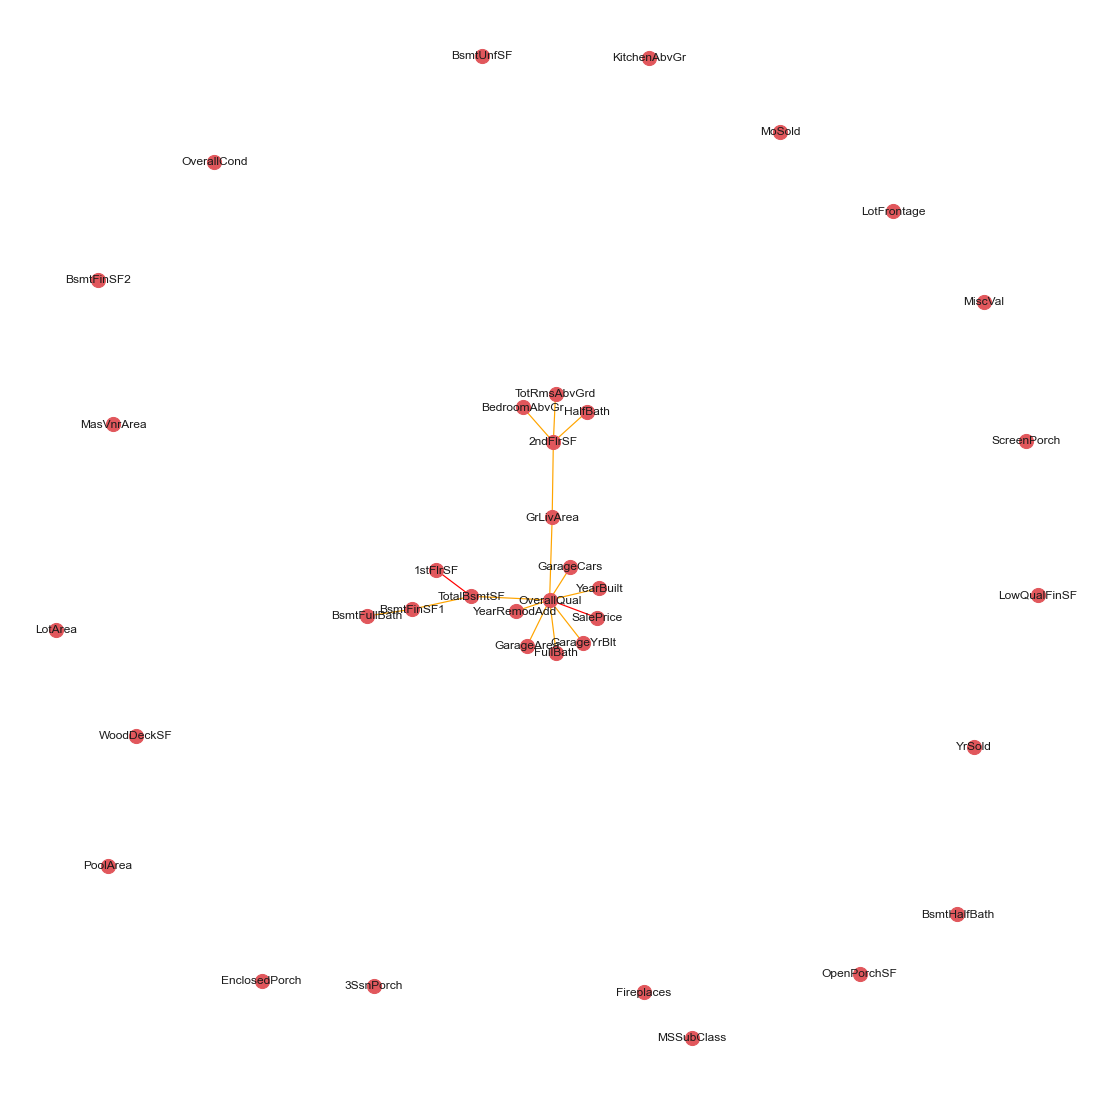

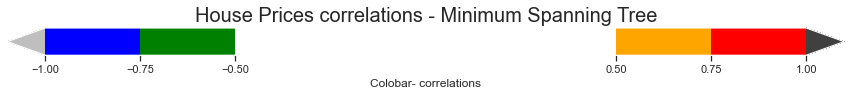

In [30]:
sns.set(rc={"figure.figsize": (15, 15)})
font_dict = {"fontsize": 20}

# créer une disposition d'arbre de portée minimale à partir de Gx
# (après avoir supprimé les petites corrélations)
mst = nx.minimum_spanning_tree(Gx)

edge_colours = []

# assign edge colours
for key, value in nx.get_edge_attributes(mst, "correlation").items():
    edge_colours.append(assign_colour(value))


# Dessinez l'arbre de portée minimale. Définir la taille et la largeur des nœuds à une valeur constante
nx.draw(
    mst,
    with_labels=True,
    pos=nx.fruchterman_reingold_layout(mst),
    node_size=200,
    node_color="#e1575c",
    edge_color=edge_colours,
    width=1.2,
)

import matplotlib as mpl
fig, ax = plt.subplots(figsize=(15, 1))
fig.subplots_adjust(bottom=0.5)

cmap = (mpl.colors.ListedColormap(['blue', 'green', 'white', 'orange', 'red'])
        .with_extremes(over='0.25', under='0.75'))

bounds = [-1, -0.75, -0.5, 0.5, 0.75,1]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
fig.colorbar(
    mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
    cax=ax,
    boundaries=[0] + bounds + [13],  
    extend='both',
    ticks=bounds,
    spacing='proportional',
    orientation='horizontal',
    label='Colobar- correlations',
)
# set title
plt.title("House Prices correlations - Minimum Spanning Tree", fontdict=font_dict)
plt.show()

## 4.2] Selection : variable en fonction de la variable cible

In [31]:
data_corrnum= new_data_numerique_2.corr()['SalePrice']
data_corrnum #valeurs corrélations entre valeurs numériques et label

MSSubClass      -0.084284
LotFrontage      0.334771
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.466754
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePrice, dtype: float64

In [32]:
list2 = []
for i in data_corrnum.index:
    if abs(data_corrnum[i]) < 0.5:
        list2.append(i)
len(list2)

26

In [33]:
#supprimer les variables avec une corrélation en valeur absolue < 5 par rapport à Saleprice.
new_data_numerique_3 = new_data_numerique_2.drop(list2, axis=1) 
new_data_numerique_3 = new_data_numerique_3.reset_index() #renommer les index dans l'ordre croissant
new_data_numerique_3 = new_data_numerique_3.drop("index", axis=1) #supprimer la variable index
new_data_numerique_3

OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  GrLivArea  \
0               7       2003          2003          856       856       1710   
1               6       1976          1976         1262      1262       1262   
2               7       2001          2002          920       920       1786   
3               7       1915          1970          756       961       1717   
4               8       2000          2000         1145      1145       2198   
...           ...        ...           ...          ...       ...        ...   
1455            6       1999          2000          953       953       1647   
1456            6       1978          1988         1542      2073       2073   
1457            7       1941          2006         1152      1188       2340   
1458            5       1950          1996         1078      1078       1078   
1459            5       1965          1965         1256      1256       1256   

      FullBath  TotRmsAbvGrd  GarageCars  GarageArea  SalePrice  
0            2             8           2         548     208500  
1            2             6           2         460     181500  
2            2             6           2         608     223500  
3            1             7           3         642     140000  
4            2             9           3         836     250000  
...        ...           ...         ...         ...        ...  
1455         2             7           2         460     175000  
1456         2             7           2         500     210000  
1457         2             9           1         252     266500  
1458         1             5           1         240     142125  
1459         1             6           1         276     147500  

[1460 rows x 11 columns]

## 4.3 ] Data non numérique : V de cramer

In [34]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
data_encoded = pd.DataFrame() 

for i in new_data_nonnumerique.columns :
    data_encoded[i]=label.fit_transform(new_data_nonnumerique[i])
data_encoded.head()

MSZoning  Street  LotShape  LandContour  Utilities  LotConfig  LandSlope  \
0         3       1         3            3          0          4          0   
1         3       1         3            3          0          2          0   
2         3       1         0            3          0          4          0   
3         3       1         0            3          0          0          0   
4         3       1         0            3          0          2          0   

   Neighborhood  Condition1  Condition2  ...  Electrical  KitchenQual  \
0             5           2           2  ...           4            2   
1            24           1           2  ...           4            3   
2             5           2           2  ...           4            2   
3             6           2           2  ...           4            2   
4            15           2           2  ...           4            2   

   Functional  GarageType  GarageFinish  GarageQual  GarageCond  PavedDrive  \
0           6           1             1           4           4           2   
1           6           1             1           4           4           2   
2           6           1             1           4           4           2   
3           6           5             2           4           4           2   
4           6           1             1           4           4           2   

   SaleType  SaleCondition  
0         8              4  
1         8              4  
2         8              4  
3         8              0  
4         8              4  

[5 rows x 38 columns]

In [35]:
#Construction de la fonction de cramer V

from scipy.stats import chi2_contingency
import numpy as np

def cramers_V(var1,var2) :
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
    return (stat/(obs*mini))

In [275]:
#Construction de la matrice

rows= []

for var1 in data_encoded:
    col = []
    for var2 in data_encoded :
        cramers =cramers_V(data_encoded[var1], data_encoded[var2]) # Cramer's V test
        col.append(round(cramers,2)) # Keeping of the rounded value of the Cramer's V  
    rows.append(col)
cramers_results = np.array(rows)

corr_cramer = pd.DataFrame(cramers_results, columns = data_encoded.columns, index =data_encoded.columns)



corr_cramer

MSZoning  Street  LotShape  LandContour  Utilities  LotConfig  \
MSZoning           1.00    0.06      0.03         0.01       0.00       0.01   
Street             0.06    0.84      0.00         0.02       0.00       0.00   
LotShape           0.03    0.00      1.00         0.02       0.00       0.05   
LandContour        0.01    0.02      0.02         1.00       0.00       0.01   
Utilities          0.00    0.00      0.00         0.00       0.25       0.01   
LotConfig          0.01    0.00      0.05         0.01       0.01       1.00   
LandSlope          0.01    0.03      0.02         0.21       0.00       0.01   
Neighborhood       0.43    0.06      0.08         0.15       0.03       0.04   
Condition1         0.01    0.03      0.02         0.00       0.00       0.03   
Condition2         0.01    0.00      0.00         0.01       0.00       0.01   
BldgType           0.04    0.02      0.01         0.01       0.00       0.01   
HouseStyle         0.04    0.01      0.01         0.02       0.01       0.00   
RoofStyle          0.01    0.00      0.00         0.02       0.00       0.01   
RoofMatl           0.00    0.00      0.04         0.04       0.00       0.01   
Exterior1st        0.04    0.00      0.02         0.02       0.00       0.01   
Exterior2nd        0.04    0.00      0.02         0.02       0.00       0.02   
MasVnrType         0.01    0.00      0.01         0.01       0.00       0.00   
ExterQual          0.06    0.11      0.01         0.02       0.00       0.00   
ExterCond          0.01    0.00      0.00         0.00       0.00       0.00   
Foundation         0.05    0.01      0.02         0.01       0.00       0.01   
BsmtQual           0.03    0.00      0.02         0.01       0.00       0.01   
BsmtCond           0.01    0.00      0.01         0.01       0.00       0.00   
BsmtExposure       0.01    0.01      0.01         0.04       0.00       0.01   
BsmtFinType1       0.02    0.00      0.01         0.01       0.00       0.01   
BsmtFinType2       0.01    0.02      0.01         0.00       0.02       0.00   
Heating            0.01    0.00      0.00         0.00       0.00       0.00   
HeatingQC          0.02    0.00      0.01         0.01       0.00       0.00   
CentralAir         0.09    0.00      0.01         0.02       0.00       0.01   
Electrical         0.01    0.00      0.02         0.01       0.01       0.00   
KitchenQual        0.03    0.01      0.01         0.01       0.00       0.00   
Functional         0.00    0.00      0.00         0.00       0.00       0.00   
GarageType         0.05    0.05      0.02         0.02       0.05       0.01   
GarageFinish       0.04    0.00      0.02         0.01       0.00       0.00   
GarageQual         0.02    0.00      0.01         0.00       0.00       0.00   
GarageCond         0.01    0.00      0.01         0.00       0.00       0.01   
PavedDrive         0.05    0.00      0.01         0.02       0.00       0.00   
SaleType           0.03    0.02      0.00         0.01       0.02       0.00   
SaleCondition      0.02    0.01      0.00         0.01       0.01       0.00   

               LandSlope  Neighborhood  Condition1  Condition2  ...  \
MSZoning            0.01          0.43        0.01        0.01  ...   
Street              0.03          0.06        0.03        0.00  ...   
LotShape            0.02          0.08        0.02        0.00  ...   
LandContour         0.21          0.15        0.00        0.01  ...   
Utilities           0.00          0.03        0.00        0.00  ...   
LotConfig           0.01          0.04        0.03        0.01  ...   
LandSlope           1.00          0.12        0.00        0.00  ...   
Neighborhood        0.12          1.00        0.05        0.02  ...   
Condition1          0.00          0.05        1.00        0.05  ...   
Condition2          0.00          0.02        0.05        1.00  ...   
BldgType            0.00          0.19        0.01        0.03  ...   
HouseStyle          0.00          0.10    

C:\Users\na_to\AppData\Local\Temp\ipykernel_14540\3846287437.py:7: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



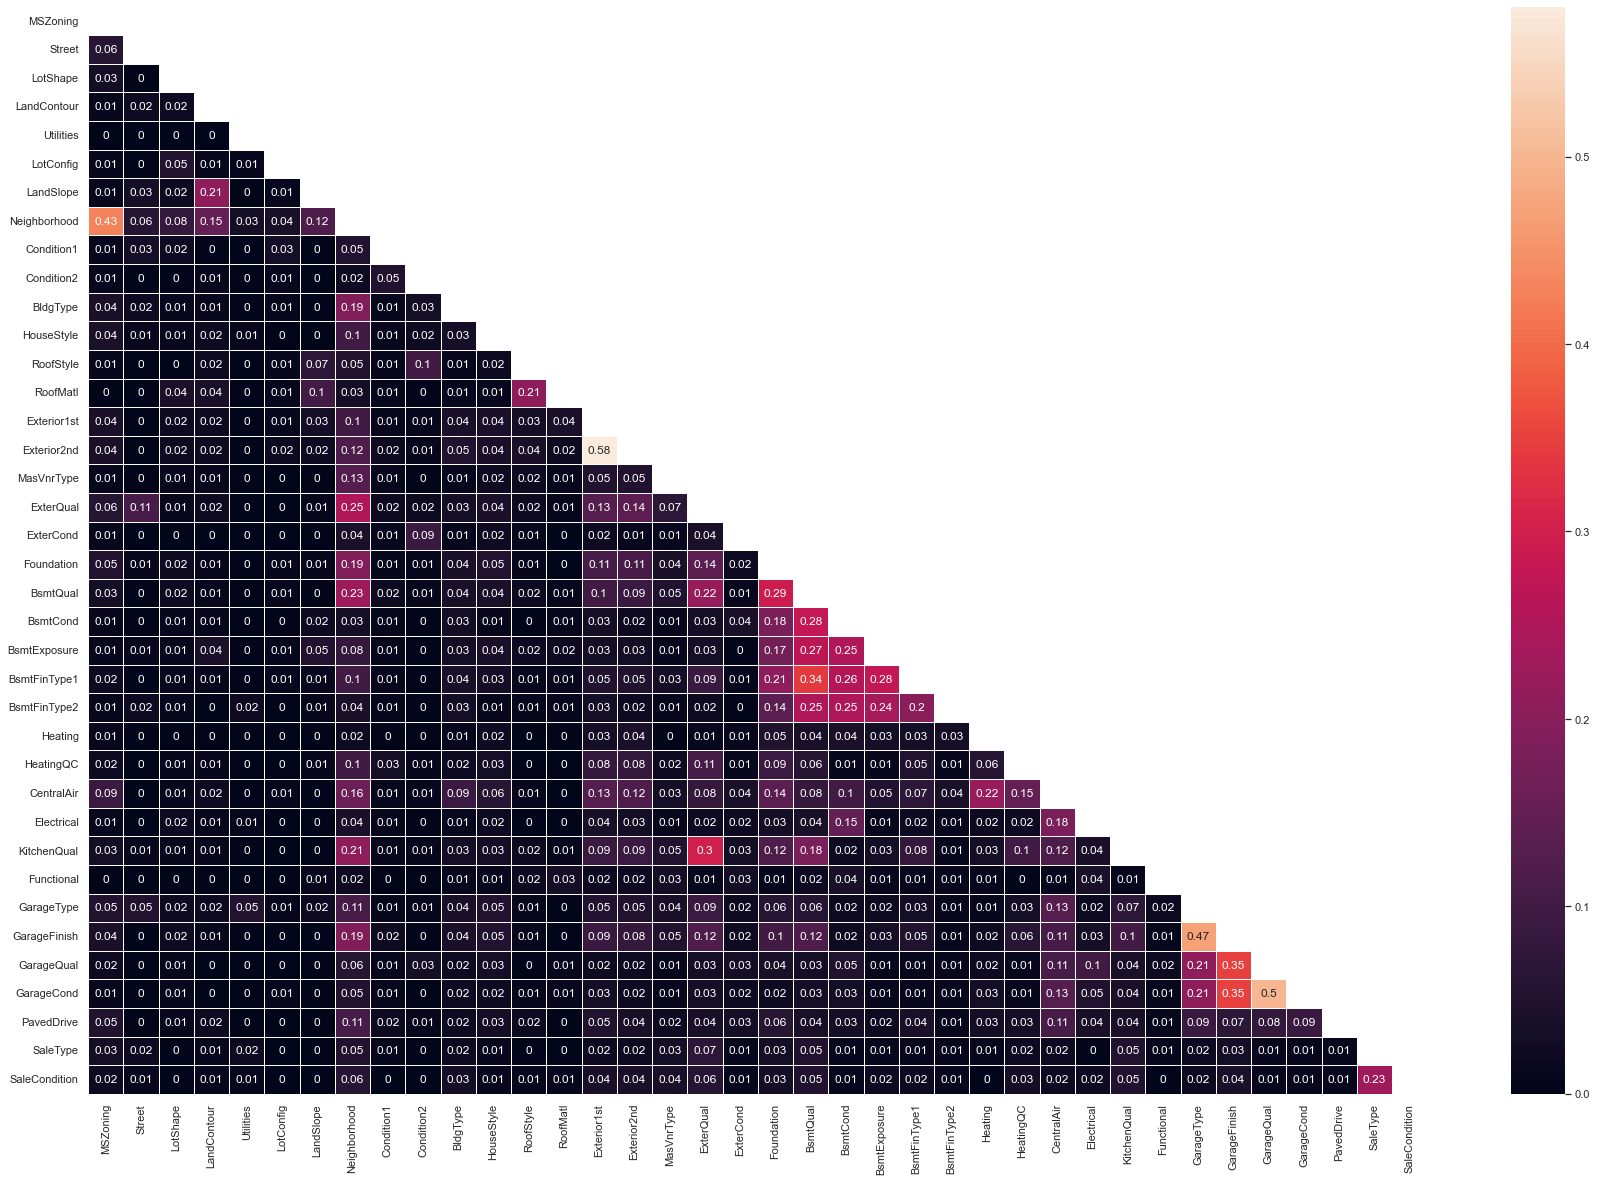

In [276]:
plt.figure(figsize=(30,20))
import seaborn as sns
import matplotlib.pyplot as plt



mask = np.zeros_like(corr_cramer, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True




with sns.axes_style("white"):
    ax = sns.heatmap(corr_cramer, mask=mask, linewidths= 0.8, annot = True)

plt.show()

# 5] Rassemblement des variables / StandardScaler

<AxesSubplot:>

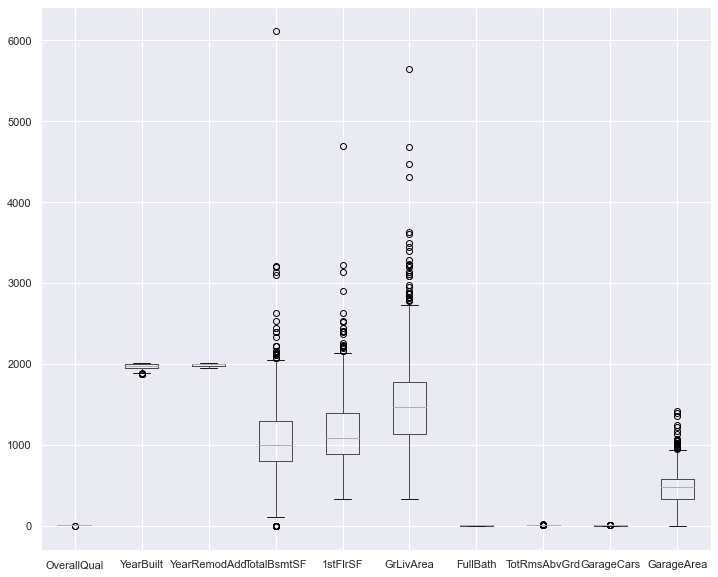

In [277]:
test = new_data_numerique_3.drop("SalePrice", axis = 1)
test.boxplot(figsize= (12,10))#Distributions des variables avec les boites à moustaches

In [278]:
#Vérification des valeurs manquantes
new_data_numerique_3.isna().sum()

OverallQual     0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
GarageCars      0
GarageArea      0
SalePrice       0
dtype: int64

In [279]:
test

OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  GrLivArea  \
0               7       2003          2003          856       856       1710   
1               6       1976          1976         1262      1262       1262   
2               7       2001          2002          920       920       1786   
3               7       1915          1970          756       961       1717   
4               8       2000          2000         1145      1145       2198   
...           ...        ...           ...          ...       ...        ...   
1455            6       1999          2000          953       953       1647   
1456            6       1978          1988         1542      2073       2073   
1457            7       1941          2006         1152      1188       2340   
1458            5       1950          1996         1078      1078       1078   
1459            5       1965          1965         1256      1256       1256   

      FullBath  TotRmsAbvGrd  GarageCars  GarageArea  
0            2             8           2         548  
1            2             6           2         460  
2            2             6           2         608  
3            1             7           3         642  
4            2             9           3         836  
...        ...           ...         ...         ...  
1455         2             7           2         460  
1456         2             7           2         500  
1457         2             9           1         252  
1458         1             5           1         240  
1459         1             6           1         276  

[1460 rows x 10 columns]

In [280]:
data_encoded

MSZoning  Street  LotShape  LandContour  Utilities  LotConfig  \
0            3       1         3            3          0          4   
1            3       1         3            3          0          2   
2            3       1         0            3          0          4   
3            3       1         0            3          0          0   
4            3       1         0            3          0          2   
...        ...     ...       ...          ...        ...        ...   
1455         3       1         3            3          0          4   
1456         3       1         3            3          0          4   
1457         3       1         3            3          0          4   
1458         3       1         3            3          0          4   
1459         3       1         3            3          0          4   

      LandSlope  Neighborhood  Condition1  Condition2  ...  Electrical  \
0             0             5           2           2  ...           4   
1             0            24           1           2  ...           4   
2             0             5           2           2  ...           4   
3             0             6           2           2  ...           4   
4             0            15           2           2  ...           4   
...         ...           ...         ...         ...  ...         ...   
1455          0             8           2           2  ...           4   
1456          0            14           2           2  ...           4   
1457          0             6           2           2  ...           4   
1458          0            12           2           2  ...           0   
1459          0             7           2           2  ...           4   

      KitchenQual  Functional  GarageType  GarageFinish  GarageQual  \
0               2           6           1             1           4   
1               3           6           1             1           4   
2               2           6           1             1           4   
3               2           6           5             2           4   
4               2           6           1             1           4   
...           ...         ...         ...           ...         ...   
1455            3           6           1             1           4   
1456            3           2           1             2           4   
1457            2           6           1             1           4   
1458            2           6           1             2           4   
1459            3           6           1             0           4   

      GarageCond  PavedDrive  SaleType  SaleCondition  
0              4           2         8              4  
1              4           2         8              4  
2              4           2         8              4  
3              4           2         8              0  
4              4           2         8              4  
...          ...         ...       ...            ...  
1455           4           2         8              4  
1456           4           2         8              4  
1457           4           2         8              4  
1458           4           2         8              4  
1459           4           2         8              4  

[1460 rows x 38 columns]

In [281]:
#Rassemblement des données
Data_final_sans_target = test.join(data_encoded)
Data_final_sans_target

OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  GrLivArea  \
0               7       2003          2003          856       856       1710   
1               6       1976          1976         1262      1262       1262   
2               7       2001          2002          920       920       1786   
3               7       1915          1970          756       961       1717   
4               8       2000          2000         1145      1145       2198   
...           ...        ...           ...          ...       ...        ...   
1455            6       1999          2000          953       953       1647   
1456            6       1978          1988         1542      2073       2073   
1457            7       1941          2006         1152      1188       2340   
1458            5       1950          1996         1078      1078       1078   
1459            5       1965          1965         1256      1256       1256   

      FullBath  TotRmsAbvGrd  GarageCars  GarageArea  ...  Electrical  \
0            2             8           2         548  ...           4   
1            2             6           2         460  ...           4   
2            2             6           2         608  ...           4   
3            1             7           3         642  ...           4   
4            2             9           3         836  ...           4   
...        ...           ...         ...         ...  ...         ...   
1455         2             7           2         460  ...           4   
1456         2             7           2         500  ...           4   
1457         2             9           1         252  ...           4   
1458         1             5           1         240  ...           0   
1459         1             6           1         276  ...           4   

      KitchenQual  Functional  GarageType  GarageFinish  GarageQual  \
0               2           6           1             1           4   
1               3           6           1             1           4   
2               2           6           1             1           4   
3               2           6           5             2           4   
4               2           6           1             1           4   
...           ...         ...         ...           ...         ...   
1455            3           6           1             1           4   
1456            3           2           1             2           4   
1457            2           6           1             1           4   
1458            2           6           1             2           4   
1459            3           6           1             0           4   

      GarageCond  PavedDrive  SaleType  SaleCondition  
0              4           2         8              4  
1              4           2         8              4  
2              4           2         8              4  
3              4           2         8              0  
4              4           2         8              4  
...          ...         ...       ...            ...  
1455           4           2         8              4  
1456           4           2         8              4  
1457           4           2         8              4  
1458           4           2         8              4  
1459           4           2         8              4  

[1460 rows x 48 columns]

In [282]:
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler = StandardScaler()
# transform data
scaler.fit(Data_final_sans_target)
scaled = scaler.transform(Data_final_sans_target)

In [283]:
scaled_dataframe= pd.DataFrame(scaled)
scaled_dataframe

0         1         2         3         4         5         6   \
0     0.651479  1.050994  0.878668 -0.459303 -0.793434  0.370333  0.789741   
1    -0.071836  0.156734 -0.429577  0.466465  0.257140 -0.482512  0.789741   
2     0.651479  0.984752  0.830215 -0.313369 -0.627826  0.515013  0.789741   
3     0.651479 -1.863632 -0.720298 -0.687324 -0.521734  0.383659 -1.026041   
4     1.374795  0.951632  0.733308  0.199680 -0.045611  1.299326  0.789741   
...        ...       ...       ...       ...       ...       ...       ...   
1455 -0.071836  0.918511  0.733308 -0.238122 -0.542435  0.250402  0.789741   
1456 -0.071836  0.222975  0.151865  1.104925  2.355701  1.061367  0.789741   
1457  0.651479 -1.002492  1.024029  0.215641  0.065656  1.569647  0.789741   
1458 -0.795151 -0.704406  0.539493  0.046905 -0.218982 -0.832788 -1.026041   
1459 -0.795151 -0.207594 -0.962566  0.452784  0.241615 -0.493934 -1.026041   

            7         8         9   ...        38        39        40  \
0     0.912210  0.311725  0.351000  ...  0.301599 -0.409369  0.255978   
1    -0.318683  0.311725 -0.060731  ...  0.301599  0.795629  0.255978   
2    -0.318683  0.311725  0.631726  ...  0.301599 -0.409369  0.255978   
3     0.296763  1.650307  0.790804  ...  0.301599 -0.409369  0.255978   
4     1.527656  1.650307  1.698485  ...  0.301599 -0.409369  0.255978   
...        ...       ...       ...  ...       ...       ...       ...   
1455  0.296763  0.311725 -0.060731  ...  0.301599  0.795629  0.255978   
1456  0.296763  0.311725  0.126420  ...  0.301599  0.795629 -3.828474   
1457  1.527656 -1.026858 -1.033914  ...  0.301599 -0.409369  0.255978   
1458 -0.934130 -1.026858 -1.090059  ... -3.502585 -0.409369  0.255978   
1459 -0.318683 -1.026858 -0.921624  ...  0.301599  0.795629  0.255978   

            41        42       43      44        45        46        47  
0    -0.768736 -0.318475  0.11211  0.0689  0.289745  0.313867  0.208502  
1    -0.768736 -0.318475  0.11211  0.0689  0.289745  0.313867  0.208502  
2    -0.768736 -0.318475  0.11211  0.0689  0.289745  0.313867  0.208502  
3     1.301075  0.801942  0.11211  0.0689  0.289745  0.313867 -3.426284  
4    -0.768736 -0.318475  0.11211  0.0689  0.289745  0.313867  0.208502  
...        ...       ...      ...     ...       ...       ...       ...  
1455 -0.768736 -0.318475  0.11211  0.0689  0.289745  0.313867  0.208502  
1456 -0.768736  0.801942  0.11211  0.0689  0.289745  0.313867  0.208502  
1457 -0.768736 -0.318475  0.11211  0.0689  0.289745  0.313867  0.208502  
1458 -0.768736  0.801942  0.11211  0.0689  0.289745  0.313867  0.208502  
1459 -0.768736 -1.438891  0.11211  0.0689  0.289745  0.313867  0.208502  

[1460 rows x 48 columns]

In [284]:
scaled_dataframe.columns = Data_final_sans_target.columns
scaled_dataframe

OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  GrLivArea  \
0        0.651479   1.050994      0.878668    -0.459303 -0.793434   0.370333   
1       -0.071836   0.156734     -0.429577     0.466465  0.257140  -0.482512   
2        0.651479   0.984752      0.830215    -0.313369 -0.627826   0.515013   
3        0.651479  -1.863632     -0.720298    -0.687324 -0.521734   0.383659   
4        1.374795   0.951632      0.733308     0.199680 -0.045611   1.299326   
...           ...        ...           ...          ...       ...        ...   
1455    -0.071836   0.918511      0.733308    -0.238122 -0.542435   0.250402   
1456    -0.071836   0.222975      0.151865     1.104925  2.355701   1.061367   
1457     0.651479  -1.002492      1.024029     0.215641  0.065656   1.569647   
1458    -0.795151  -0.704406      0.539493     0.046905 -0.218982  -0.832788   
1459    -0.795151  -0.207594     -0.962566     0.452784  0.241615  -0.493934   

      FullBath  TotRmsAbvGrd  GarageCars  GarageArea  ...  Electrical  \
0     0.789741      0.912210    0.311725    0.351000  ...    0.301599   
1     0.789741     -0.318683    0.311725   -0.060731  ...    0.301599   
2     0.789741     -0.318683    0.311725    0.631726  ...    0.301599   
3    -1.026041      0.296763    1.650307    0.790804  ...    0.301599   
4     0.789741      1.527656    1.650307    1.698485  ...    0.301599   
...        ...           ...         ...         ...  ...         ...   
1455  0.789741      0.296763    0.311725   -0.060731  ...    0.301599   
1456  0.789741      0.296763    0.311725    0.126420  ...    0.301599   
1457  0.789741      1.527656   -1.026858   -1.033914  ...    0.301599   
1458 -1.026041     -0.934130   -1.026858   -1.090059  ...   -3.502585   
1459 -1.026041     -0.318683   -1.026858   -0.921624  ...    0.301599   

      KitchenQual  Functional  GarageType  GarageFinish  GarageQual  \
0       -0.409369    0.255978   -0.768736     -0.318475     0.11211   
1        0.795629    0.255978   -0.768736     -0.318475     0.11211   
2       -0.409369    0.255978   -0.768736     -0.318475     0.11211   
3       -0.409369    0.255978    1.301075      0.801942     0.11211   
4       -0.409369    0.255978   -0.768736     -0.318475     0.11211   
...           ...         ...         ...           ...         ...   
1455     0.795629    0.255978   -0.768736     -0.318475     0.11211   
1456     0.795629   -3.828474   -0.768736      0.801942     0.11211   
1457    -0.409369    0.255978   -0.768736     -0.318475     0.11211   
1458    -0.409369    0.255978   -0.768736      0.801942     0.11211   
1459     0.795629    0.255978   -0.768736     -1.438891     0.11211   

      GarageCond  PavedDrive  SaleType  SaleCondition  
0         0.0689    0.289745  0.313867       0.208502  
1         0.0689    0.289745  0.313867       0.208502  
2         0.0689    0.289745  0.313867       0.208502  
3         0.0689    0.289745  0.313867      -3.426284  
4         0.0689    0.289745  0.313867       0.208502  
...          ...         ...       ...            ...  
1455      0.0689    0.289745  0.313867       0.208502  
1456      0.0689    0.289745  0.313867       0.208502  
1457      0.0689    0.289745  0.313867       0.208502  
1458      0.0689    0.289745  0.313867       0.208502  
1459      0.0689    0.289745  0.313867       0.208502  

[1460 rows x 48 columns]

<AxesSubplot:>

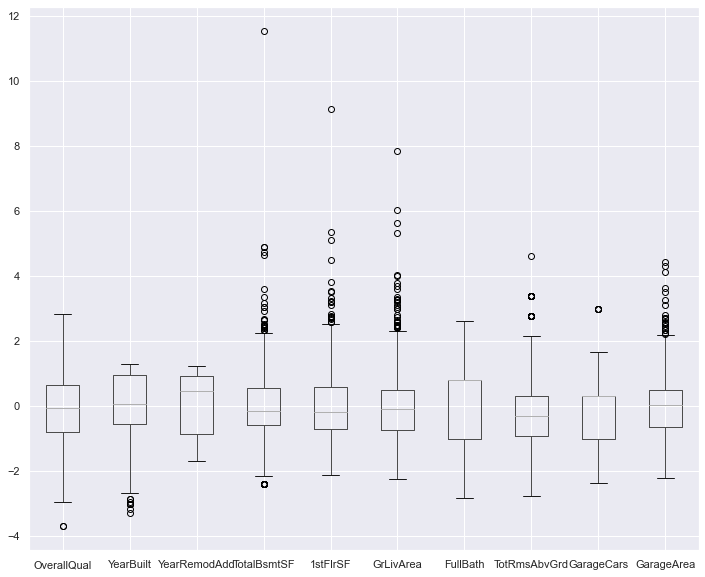

In [285]:
scaled_dataframe[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']].boxplot(figsize= (12,10))

Affichage des variables numériques : On observe que pour les variables numériques sont tous centrées et à la même échelle.

# 6] La variable cible

On peut observer les nuages de points. Regarder les corrélations linéaires fortes, moyennes et faibles entre chaque variable.

In [54]:
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

data['SalePrice'].iplot(
kind='hist',
bins=100,
xTitle='price',
linecolor='black',
yTitle='count',
title='Histogram of Sale Price')

Pour notre label : Nous examinons notre distribution avec un biais (coefficient symétrie) et un kurtosis (le coefficient d'aplatissement)  élevés, qui peuvent fausser les résultats de notre modèle de prédiction si le biais n'est pas pris en charge de manière appropriée.

In [25]:
data['SalePrice'].iplot(kind='box', title='Box plot of SalePrice')#Boite à moustache de SalePrice

Avant Transformation Skew:  1.8828757597682129
Après transformation Skew:  0.12134661989685333


C:\Users\na_to\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\na_to\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



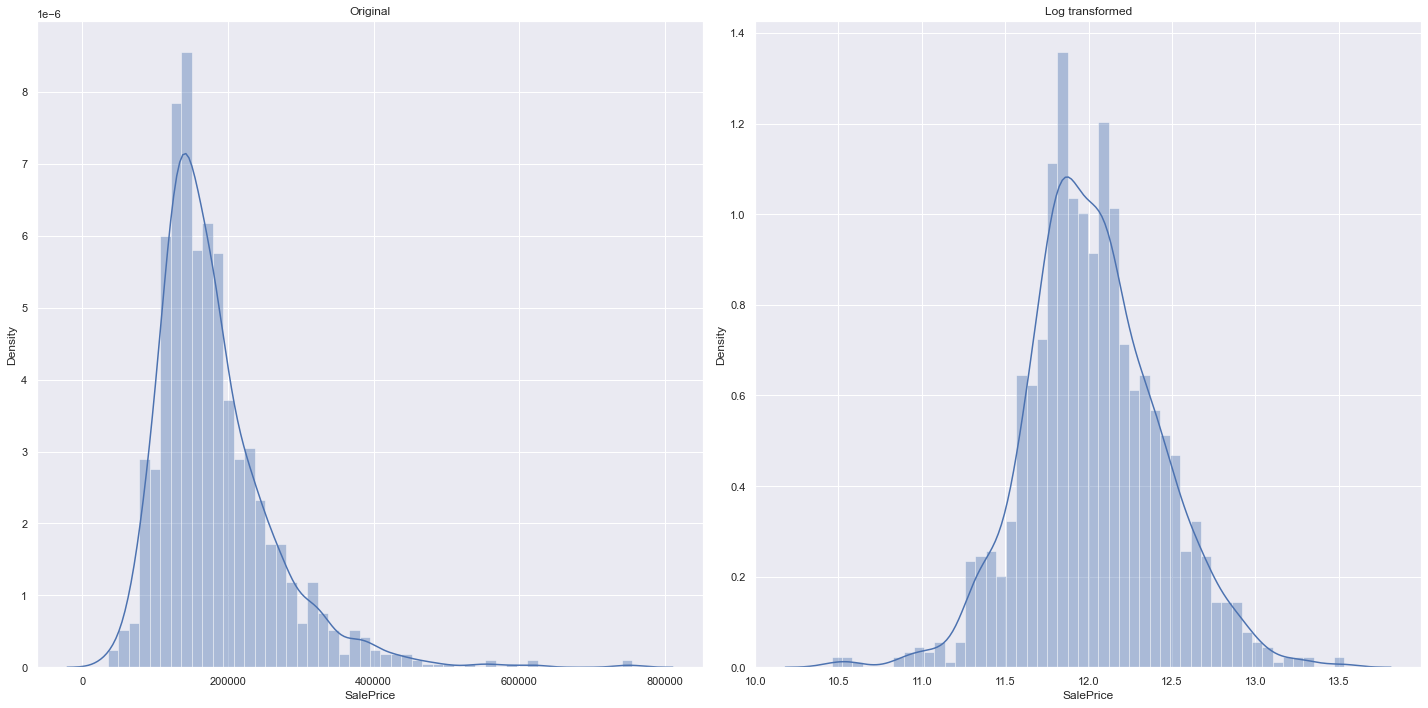

In [58]:
target_log_tran = np.log1p(data.SalePrice)#Transformation logarithmique
print('Avant Transformation Skew: ', data['SalePrice'].skew())
print('Après transformation Skew: ', target_log_tran.skew())

plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.distplot(data.SalePrice, bins=50)
plt.title('Original')

plt.subplot(1,2,2)
sns.distplot(target_log_tran, bins=50)
plt.title('Log transformed')

plt.tight_layout()

On a une distribution biaisé à droite. On a du mal a obervé les valeurs aberrantes à droite pour cela on applique une transformation de variable en log pour ce que soit plus facilement observable

Pour les données normalement distribuées, l'asymétrie doit être d'environ zéro. Pour les distributions continues unimodales, une valeur d'asymétrie supérieure à zéro signifie qu'il y a plus de poids dans la queue droite de la distribution. La fonction skewtest peut être utilisée pour déterminer si la valeur d'asymétrie est suffisamment proche de zéro, statistiquement parlant.

Skew évalue le défaut de symétrie d'une distribution

skewness = 0 : normallement distribué

skewness > 0 : Plus de poids dans la queue gauche de la distribution.

skewness < 0 : Plus de poids dans la queue droite de la distribution. 

In [69]:
data.SalePrice.skew()

1.8828757597682129

Le coefficient d'aplatissement (K, kurtosis en anglais) évalue la dispersion des valeurs "extrêmes" par référence à la loi normale. Il est nul pour une distribution normale, négatif pour une distribution moins "aplatie" qu'une distribution normale et positif sur une distribution plus aplatie qu'une distribution normale. A l'usage, cette notion d'aplatissement n'est pas si simple. Ainsi K est négatif pour une distribution uniforme, donc considérée comme moins aplatie qu'une distribution normale. Par exemple, on obtient K = -2 pour la distribution de Bernouilli de paramètre p=0,5. Mais, K est positif sur les distributions T de Student, par exemple. En utilisant un générateur de nombres aléatoires selon une distribution donnée, on obtient par exemple 

In [70]:
data.SalePrice.kurt()

6.536281860064529

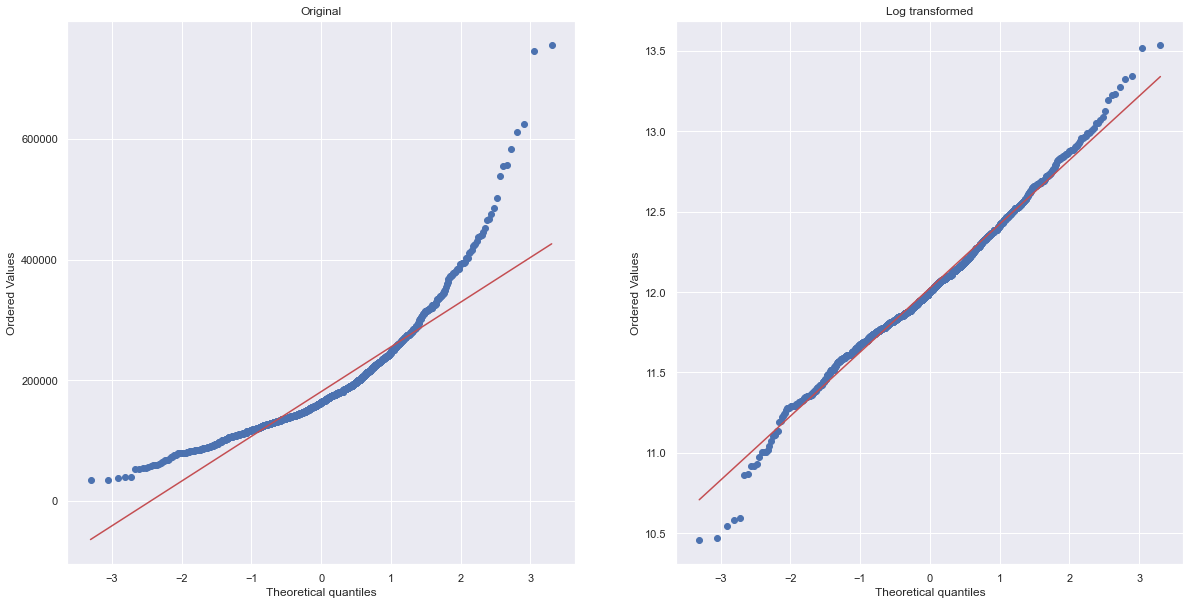

In [68]:
#QQplot 
import numpy as np 
import pylab 
import scipy.stats as stats



plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
stats.probplot(data.SalePrice, dist="norm", plot=pylab)
plt.title('Original')
#pylab.show()

plt.subplot(1,2,2)
stats.probplot(target_log_tran, dist="norm", plot=pylab)
plt.title('Log transformed')
#pylab.show()

plt.show()

# 7] Modélisation

In [ ]:
import sklearn.metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
kfold  = KFold(n_splits=5, shuffle=True)

In [ ]:
!pip install --quiet optuna

In [ ]:
import optuna

### 7.1] LGBM : Modélisation avec les données centrées et réduites 

In [330]:
scaled_dataframe["SalePrice"] = new_data_numerique_3["SalePrice"]
Data_final = scaled_dataframe

In [331]:
X = Data_final.drop("SalePrice", axis = 1)
y = Data_final["SalePrice"]

In [412]:
import lightgbm as lgbm

In [418]:
def objective(trial):
    
    n_estimators= trial.suggest_int("n_estimators", 100,2000)
    #lambda_l1 = trial.suggest_float("lambda_l1", 1e-8, 10.0)
    #lambda_l2 = trial.suggest_float("lambda_l2", 1e-8, 10.0)
    num_leaves = trial.suggest_int("num_leaves", 2, 256)
    max_depth = trial.suggest_int("nax_depth", 2, 100)
    #feature_fraction = trial.suggest_float("feature_fraction", 0.4, 1.0),
    min_child_samples = trial.suggest_int("min_child_samples", 5, 100)
    
    model = lgbm.LGBMRegressor(
                       n_estimators=n_estimators, max_depth=max_depth, num_leaves=num_leaves, min_child_samples=min_child_samples)
    Prediction = cross_val_predict(model, X,y, cv = kfold)
    rmse = np.sqrt(((Prediction - y) ** 2).mean()) #valeur RMSE
    r2 = 1 - np.sum((y-Prediction)**2) / np.sum((y-np.mean(y))**2)
    print ("la valeur de r2 : " + str(r2))
    print("la valeur de rmse : " + str(rmse))
    return rmse

In [419]:
study_lgbm = optuna.create_study(direction = "minimize",study_name="Lgbm")
study_lgbm.optimize(objective, n_trials=50)

[I 2022-07-10 16:06:01,097] A new study created in memory with name: Lgbm
[I 2022-07-10 16:06:40,062] Trial 0 finished with value: 29606.074567412754 and parameters: {'n_estimators': 1974, 'num_leaves': 197, 'nax_depth': 51, 'min_child_samples': 17}. Best is trial 0 with value: 29606.074567412754.


la valeur de r2 : 0.8610196553397458
la valeur de rmse : 29606.074567412754


[I 2022-07-10 16:06:47,523] Trial 1 finished with value: 31084.49670178297 and parameters: {'n_estimators': 1227, 'num_leaves': 39, 'nax_depth': 38, 'min_child_samples': 72}. Best is trial 0 with value: 29606.074567412754.


la valeur de r2 : 0.8467927183340581
la valeur de rmse : 31084.49670178297


[I 2022-07-10 16:06:54,520] Trial 2 finished with value: 30921.649049436877 and parameters: {'n_estimators': 1095, 'num_leaves': 231, 'nax_depth': 85, 'min_child_samples': 74}. Best is trial 0 with value: 29606.074567412754.


la valeur de r2 : 0.8483937796555162
la valeur de rmse : 30921.649049436877


[I 2022-07-10 16:07:00,039] Trial 3 finished with value: 28844.294348596213 and parameters: {'n_estimators': 596, 'num_leaves': 63, 'nax_depth': 39, 'min_child_samples': 46}. Best is trial 3 with value: 28844.294348596213.


la valeur de r2 : 0.8680797199384194
la valeur de rmse : 28844.294348596213


[I 2022-07-10 16:07:09,968] Trial 4 finished with value: 32184.73335254804 and parameters: {'n_estimators': 1818, 'num_leaves': 75, 'nax_depth': 43, 'min_child_samples': 82}. Best is trial 3 with value: 28844.294348596213.


la valeur de r2 : 0.8357552267756496
la valeur de rmse : 32184.73335254804


[I 2022-07-10 16:07:12,143] Trial 5 finished with value: 30908.501050761206 and parameters: {'n_estimators': 277, 'num_leaves': 93, 'nax_depth': 80, 'min_child_samples': 55}. Best is trial 3 with value: 28844.294348596213.


la valeur de r2 : 0.8485226792881316
la valeur de rmse : 30908.501050761206


[I 2022-07-10 16:07:24,005] Trial 6 finished with value: 31530.325636313824 and parameters: {'n_estimators': 481, 'num_leaves': 153, 'nax_depth': 78, 'min_child_samples': 17}. Best is trial 3 with value: 28844.294348596213.


la valeur de r2 : 0.842366456195879
la valeur de rmse : 31530.325636313824


[I 2022-07-10 16:08:41,091] Trial 7 finished with value: 32033.79637103621 and parameters: {'n_estimators': 1577, 'num_leaves': 200, 'nax_depth': 62, 'min_child_samples': 10}. Best is trial 3 with value: 28844.294348596213.


la valeur de r2 : 0.8372921343320756
la valeur de rmse : 32033.79637103621


[I 2022-07-10 16:09:21,089] Trial 8 finished with value: 30734.97674803529 and parameters: {'n_estimators': 1015, 'num_leaves': 87, 'nax_depth': 29, 'min_child_samples': 6}. Best is trial 3 with value: 28844.294348596213.


la valeur de r2 : 0.8502187313053953
la valeur de rmse : 30734.97674803529


[I 2022-07-10 16:09:25,055] Trial 9 finished with value: 30859.801329118814 and parameters: {'n_estimators': 848, 'num_leaves': 10, 'nax_depth': 59, 'min_child_samples': 10}. Best is trial 3 with value: 28844.294348596213.


la valeur de r2 : 0.8489996413888132
la valeur de rmse : 30859.801329118814


[I 2022-07-10 16:09:27,585] Trial 10 finished with value: 30924.881894597696 and parameters: {'n_estimators': 583, 'num_leaves': 135, 'nax_depth': 6, 'min_child_samples': 99}. Best is trial 3 with value: 28844.294348596213.


la valeur de r2 : 0.8483620772675939
la valeur de rmse : 30924.881894597696


[I 2022-07-10 16:10:00,036] Trial 11 finished with value: 29464.796543332053 and parameters: {'n_estimators': 1976, 'num_leaves': 176, 'nax_depth': 18, 'min_child_samples': 31}. Best is trial 3 with value: 28844.294348596213.


la valeur de r2 : 0.8623428986732287
la valeur de rmse : 29464.796543332053


[I 2022-07-10 16:10:14,330] Trial 12 finished with value: 28940.77181636263 and parameters: {'n_estimators': 1445, 'num_leaves': 164, 'nax_depth': 15, 'min_child_samples': 36}. Best is trial 3 with value: 28844.294348596213.


la valeur de r2 : 0.8671957586667095
la valeur de rmse : 28940.77181636263


[I 2022-07-10 16:10:17,154] Trial 13 finished with value: 28607.421465521962 and parameters: {'n_estimators': 1435, 'num_leaves': 118, 'nax_depth': 2, 'min_child_samples': 41}. Best is trial 13 with value: 28607.421465521962.


la valeur de r2 : 0.8702375144131012
la valeur de rmse : 28607.421465521962


[I 2022-07-10 16:10:18,020] Trial 14 finished with value: 29396.67192179224 and parameters: {'n_estimators': 130, 'num_leaves': 114, 'nax_depth': 6, 'min_child_samples': 47}. Best is trial 13 with value: 28607.421465521962.


la valeur de r2 : 0.8629787080408963
la valeur de rmse : 29396.67192179224


[I 2022-07-10 16:10:23,445] Trial 15 finished with value: 29765.799933276077 and parameters: {'n_estimators': 735, 'num_leaves': 39, 'nax_depth': 28, 'min_child_samples': 56}. Best is trial 13 with value: 28607.421465521962.


la valeur de r2 : 0.8595160066525763
la valeur de rmse : 29765.799933276077


[I 2022-07-10 16:10:36,764] Trial 16 finished with value: 29390.087427560018 and parameters: {'n_estimators': 1419, 'num_leaves': 56, 'nax_depth': 95, 'min_child_samples': 41}. Best is trial 13 with value: 28607.421465521962.


la valeur de r2 : 0.8630400833466685
la valeur de rmse : 29390.087427560018


[I 2022-07-10 16:10:37,717] Trial 17 finished with value: 28585.04790362812 and parameters: {'n_estimators': 449, 'num_leaves': 118, 'nax_depth': 2, 'min_child_samples': 27}. Best is trial 17 with value: 28585.04790362812.


la valeur de r2 : 0.8704404067783635
la valeur de rmse : 28585.04790362812


[I 2022-07-10 16:10:44,081] Trial 18 finished with value: 29321.310488105497 and parameters: {'n_estimators': 1725, 'num_leaves': 115, 'nax_depth': 4, 'min_child_samples': 27}. Best is trial 17 with value: 28585.04790362812.


la valeur de r2 : 0.8636803442663255
la valeur de rmse : 29321.310488105497


[I 2022-07-10 16:11:01,001] Trial 19 finished with value: 30246.17341896898 and parameters: {'n_estimators': 1316, 'num_leaves': 139, 'nax_depth': 19, 'min_child_samples': 23}. Best is trial 17 with value: 28585.04790362812.


la valeur de r2 : 0.854945033576121
la valeur de rmse : 30246.17341896898


[I 2022-07-10 16:11:06,958] Trial 20 finished with value: 31984.01508112538 and parameters: {'n_estimators': 912, 'num_leaves': 254, 'nax_depth': 28, 'min_child_samples': 65}. Best is trial 17 with value: 28585.04790362812.


la valeur de r2 : 0.837797445266195
la valeur de rmse : 31984.01508112538


[I 2022-07-10 16:11:10,151] Trial 21 finished with value: 28731.154345317962 and parameters: {'n_estimators': 393, 'num_leaves': 106, 'nax_depth': 14, 'min_child_samples': 45}. Best is trial 17 with value: 28585.04790362812.


la valeur de r2 : 0.8691125889439077
la valeur de rmse : 28731.154345317962


[I 2022-07-10 16:11:13,700] Trial 22 finished with value: 30631.584137520695 and parameters: {'n_estimators': 395, 'num_leaves': 106, 'nax_depth': 14, 'min_child_samples': 37}. Best is trial 17 with value: 28585.04790362812.


la valeur de r2 : 0.8512247661268257
la valeur de rmse : 30631.584137520695


[I 2022-07-10 16:11:14,126] Trial 23 finished with value: 30509.161821639384 and parameters: {'n_estimators': 166, 'num_leaves': 127, 'nax_depth': 2, 'min_child_samples': 49}. Best is trial 17 with value: 28585.04790362812.


la valeur de r2 : 0.8524115811934377
la valeur de rmse : 30509.161821639384


[I 2022-07-10 16:11:16,469] Trial 24 finished with value: 29091.33250219834 and parameters: {'n_estimators': 356, 'num_leaves': 95, 'nax_depth': 14, 'min_child_samples': 60}. Best is trial 17 with value: 28585.04790362812.


la valeur de r2 : 0.8658103700004416
la valeur de rmse : 29091.33250219834


[I 2022-07-10 16:11:24,580] Trial 25 finished with value: 29782.35157141452 and parameters: {'n_estimators': 690, 'num_leaves': 184, 'nax_depth': 24, 'min_child_samples': 32}. Best is trial 17 with value: 28585.04790362812.


la valeur de r2 : 0.8593597275190396
la valeur de rmse : 29782.35157141452


[I 2022-07-10 16:11:32,373] Trial 26 finished with value: 28326.118663559937 and parameters: {'n_estimators': 1197, 'num_leaves': 150, 'nax_depth': 10, 'min_child_samples': 43}. Best is trial 26 with value: 28326.118663559937.


la valeur de r2 : 0.8727769311300546
la valeur de rmse : 28326.118663559937


[I 2022-07-10 16:11:39,382] Trial 27 finished with value: 30140.92469991023 and parameters: {'n_estimators': 1183, 'num_leaves': 154, 'nax_depth': 8, 'min_child_samples': 26}. Best is trial 26 with value: 28326.118663559937.


la valeur de r2 : 0.8559527833426904
la valeur de rmse : 30140.92469991023


[I 2022-07-10 16:11:52,797] Trial 28 finished with value: 29496.12364624103 and parameters: {'n_estimators': 1439, 'num_leaves': 143, 'nax_depth': 22, 'min_child_samples': 38}. Best is trial 26 with value: 28326.118663559937.


la valeur de r2 : 0.8620500277787332
la valeur de rmse : 29496.12364624103


[I 2022-07-10 16:11:56,037] Trial 29 finished with value: 30683.49653117803 and parameters: {'n_estimators': 1654, 'num_leaves': 200, 'nax_depth': 2, 'min_child_samples': 18}. Best is trial 26 with value: 28326.118663559937.


la valeur de r2 : 0.8507200698679088
la valeur de rmse : 30683.49653117803


[I 2022-07-10 16:12:18,388] Trial 30 finished with value: 30753.2956533842 and parameters: {'n_estimators': 1084, 'num_leaves': 215, 'nax_depth': 47, 'min_child_samples': 19}. Best is trial 26 with value: 28326.118663559937.


la valeur de r2 : 0.8500401304490406
la valeur de rmse : 30753.2956533842


[I 2022-07-10 16:12:25,861] Trial 31 finished with value: 31923.917427848042 and parameters: {'n_estimators': 912, 'num_leaves': 122, 'nax_depth': 13, 'min_child_samples': 42}. Best is trial 26 with value: 28326.118663559937.


la valeur de r2 : 0.8384064266388255
la valeur de rmse : 31923.917427848042


[I 2022-07-10 16:12:34,296] Trial 32 finished with value: 30121.98803664664 and parameters: {'n_estimators': 1269, 'num_leaves': 103, 'nax_depth': 11, 'min_child_samples': 51}. Best is trial 26 with value: 28326.118663559937.


la valeur de r2 : 0.8561337278075842
la valeur de rmse : 30121.98803664664


[I 2022-07-10 16:12:39,614] Trial 33 finished with value: 29214.443487487624 and parameters: {'n_estimators': 486, 'num_leaves': 74, 'nax_depth': 23, 'min_child_samples': 33}. Best is trial 26 with value: 28326.118663559937.


la valeur de r2 : 0.864672218398718
la valeur de rmse : 29214.443487487624


[I 2022-07-10 16:12:41,297] Trial 34 finished with value: 28781.301800848047 and parameters: {'n_estimators': 265, 'num_leaves': 171, 'nax_depth': 33, 'min_child_samples': 62}. Best is trial 26 with value: 28326.118663559937.


la valeur de r2 : 0.868655287530045
la valeur de rmse : 28781.301800848047


[I 2022-07-10 16:12:48,802] Trial 35 finished with value: 29504.87403052886 and parameters: {'n_estimators': 1166, 'num_leaves': 147, 'nax_depth': 9, 'min_child_samples': 44}. Best is trial 26 with value: 28326.118663559937.


la valeur de r2 : 0.8619681665595008
la valeur de rmse : 29504.87403052886


[I 2022-07-10 16:12:56,373] Trial 36 finished with value: 30271.865975428012 and parameters: {'n_estimators': 1343, 'num_leaves': 78, 'nax_depth': 38, 'min_child_samples': 74}. Best is trial 26 with value: 28326.118663559937.


la valeur de r2 : 0.8546984955603165
la valeur de rmse : 30271.865975428012


[I 2022-07-10 16:13:07,088] Trial 37 finished with value: 32792.19076244446 and parameters: {'n_estimators': 1549, 'num_leaves': 56, 'nax_depth': 54, 'min_child_samples': 53}. Best is trial 26 with value: 28326.118663559937.


la valeur de r2 : 0.8294967778849383
la valeur de rmse : 32792.19076244446


[I 2022-07-10 16:13:19,504] Trial 38 finished with value: 29862.660332186882 and parameters: {'n_estimators': 1788, 'num_leaves': 129, 'nax_depth': 10, 'min_child_samples': 69}. Best is trial 26 with value: 28326.118663559937.


la valeur de r2 : 0.8586002257651109
la valeur de rmse : 29862.660332186882


[I 2022-07-10 16:13:32,871] Trial 39 finished with value: 29238.188546446832 and parameters: {'n_estimators': 787, 'num_leaves': 163, 'nax_depth': 69, 'min_child_samples': 43}. Best is trial 26 with value: 28326.118663559937.


la valeur de r2 : 0.8644521442397092
la valeur de rmse : 29238.188546446832


[I 2022-07-10 16:13:52,250] Trial 40 finished with value: 34092.91902468901 and parameters: {'n_estimators': 536, 'num_leaves': 102, 'nax_depth': 36, 'min_child_samples': 27}. Best is trial 26 with value: 28326.118663559937.


la valeur de r2 : 0.8157022212027063
la valeur de rmse : 34092.91902468901


[I 2022-07-10 16:13:57,561] Trial 41 finished with value: 30295.298559028994 and parameters: {'n_estimators': 364, 'num_leaves': 182, 'nax_depth': 33, 'min_child_samples': 60}. Best is trial 26 with value: 28326.118663559937.


la valeur de r2 : 0.854473461039622
la valeur de rmse : 30295.298559028994


[I 2022-07-10 16:14:00,306] Trial 42 finished with value: 29609.338257414398 and parameters: {'n_estimators': 248, 'num_leaves': 166, 'nax_depth': 19, 'min_child_samples': 57}. Best is trial 26 with value: 28326.118663559937.


la valeur de r2 : 0.8609890120498739
la valeur de rmse : 29609.338257414398


[I 2022-07-10 16:14:00,909] Trial 43 finished with value: 29925.928311761076 and parameters: {'n_estimators': 223, 'num_leaves': 115, 'nax_depth': 2, 'min_child_samples': 65}. Best is trial 26 with value: 28326.118663559937.


la valeur de r2 : 0.8580004429828114
la valeur de rmse : 29925.928311761076


[I 2022-07-10 16:14:06,841] Trial 44 finished with value: 28937.472998140634 and parameters: {'n_estimators': 673, 'num_leaves': 87, 'nax_depth': 42, 'min_child_samples': 47}. Best is trial 26 with value: 28326.118663559937.


la valeur de r2 : 0.8672260323640228
la valeur de rmse : 28937.472998140634


[I 2022-07-10 16:14:11,457] Trial 45 finished with value: 31709.53878348858 and parameters: {'n_estimators': 986, 'num_leaves': 132, 'nax_depth': 17, 'min_child_samples': 93}. Best is trial 26 with value: 28326.118663559937.


la valeur de r2 : 0.8405694377963873
la valeur de rmse : 31709.53878348858


[I 2022-07-10 16:14:14,097] Trial 46 finished with value: 29955.412141345863 and parameters: {'n_estimators': 429, 'num_leaves': 153, 'nax_depth': 33, 'min_child_samples': 78}. Best is trial 26 with value: 28326.118663559937.


la valeur de r2 : 0.8577205015810448
la valeur de rmse : 29955.412141345863


[I 2022-07-10 16:14:16,836] Trial 47 finished with value: 31144.769274475166 and parameters: {'n_estimators': 304, 'num_leaves': 222, 'nax_depth': 8, 'min_child_samples': 12}. Best is trial 26 with value: 28326.118663559937.


la valeur de r2 : 0.8461980071103701
la valeur de rmse : 31144.769274475166


[I 2022-07-10 16:14:20,405] Trial 48 finished with value: 32107.78786111616 and parameters: {'n_estimators': 631, 'num_leaves': 173, 'nax_depth': 26, 'min_child_samples': 85}. Best is trial 26 with value: 28326.118663559937.


la valeur de r2 : 0.8365396227599498
la valeur de rmse : 32107.78786111616


[I 2022-07-10 16:14:28,129] Trial 49 finished with value: 28563.894819958245 and parameters: {'n_estimators': 1540, 'num_leaves': 188, 'nax_depth': 6, 'min_child_samples': 39}. Best is trial 26 with value: 28326.118663559937.


la valeur de r2 : 0.870632085372107
la valeur de rmse : 28563.894819958245


In [420]:
print("Best Params : {}".format(study_lgbm.best_params))
print("Best RMSE : {}".format(study_lgbm.best_value))

Best Params : {'n_estimators': 1197, 'num_leaves': 150, 'nax_depth': 10, 'min_child_samples': 43}
Best RMSE : 28326.118663559937


In [421]:
#meilleur modèle LGBM
model_best_lgbm = lgbm.LGBMRegressor(
                       n_estimators=1197,num_leaves= 150, max_depth=10, min_child_samples = 43)
model_best_lgbm.fit(X,y)

LGBMRegressor(max_depth=10, min_child_samples=43, n_estimators=1197,
              num_leaves=150)

### 7.2 ] Modélisation avec les données sans centrées et sans réduire (Regression linéaire, lasso, ridge, elastic-net)

In [369]:
#Préparation de la données
Data_final_sans_target_non_std = Data_final_sans_target
Data_final_sans_target_non_std["SalePrice"]= new_data_numerique_3["SalePrice"]
Data_final_non_std = Data_final_sans_target_non_std 
X_non_std = Data_final_non_std.drop("SalePrice", axis = 1)
y_non_std = Data_final_non_std["SalePrice"]

### Régression linéaire

In [372]:
#Modélisation
from sklearn.linear_model import LinearRegression
kfold  = KFold(n_splits=5, shuffle=True) 
model_linear  = LinearRegression()
Prediction = cross_val_predict(model_linear, X_non_std ,y_non_std, cv = kfold)

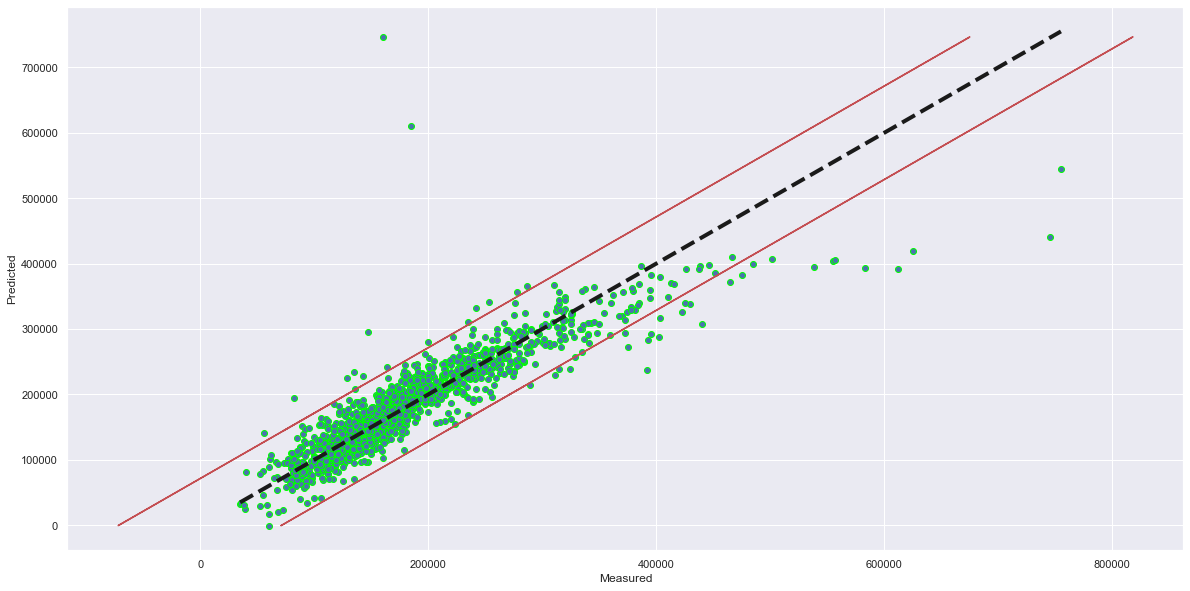

la valeur de RMSE : 36461.95710391519
La valeur de R2 :0.7891994795994706


In [379]:
stdev = np.sqrt(sum((Prediction - y)**2) / (len(y)))
IH, IB =(Prediction - 1.96*stdev, Prediction + 1.96*stdev) #Intervalle de confiance de 96%

fig, ax = plt.subplots()
ax.scatter(y, Prediction, edgecolors = (0,1,0))
ax.plot([y.min(),y.max()], [y.min(),y.max()], 'k--', lw=4)
ax.set_xlabel("Measured")
ax.set_ylabel("Predicted")
ax.plot(IH, Prediction, c='r')
ax.plot(IB, Prediction, c='r')
fig.set_size_inches(20, 10)
plt.show()
print("la valeur de RMSE : " + str(np.sqrt(((Prediction - y) ** 2).mean())))
print("La valeur de R2 :" + str(1 - np.sum((y-Prediction)**2) / np.sum((y-np.mean(y))**2)))  

### Lasso 

In [380]:
from sklearn.linear_model import Lasso

In [394]:
def objective_lasso(trial):
    
    alpha= trial.suggest_float("alpha", 1e-8, 10.0)
    Lasso_model = Lasso(alpha=alpha)
    Prediction = cross_val_predict(Lasso_model,  X_non_std,y_non_std, cv = kfold)
    rmse = np.sqrt(((Prediction - y) ** 2).mean()) #valeur RMSE
    return rmse

In [395]:
study_lasso = optuna.create_study(direction = "minimize",study_name="Lasso")
study_lasso.optimize(objective_lasso, n_trials=1000)

[I 2022-07-10 15:27:05,102] A new study created in memory with name: Lasso
[I 2022-07-10 15:27:05,177] Trial 0 finished with value: 35336.142801977854 and parameters: {'alpha': 8.781016785081727}. Best is trial 0 with value: 35336.142801977854.
[I 2022-07-10 15:27:05,257] Trial 1 finished with value: 35784.31414176347 and parameters: {'alpha': 4.7059051769815445}. Best is trial 0 with value: 35336.142801977854.
[I 2022-07-10 15:27:05,336] Trial 2 finished with value: 36046.40645642939 and parameters: {'alpha': 3.02791888603275}. Best is trial 0 with value: 35336.142801977854.
[I 2022-07-10 15:27:05,398] Trial 3 finished with value: 35350.8121892959 and parameters: {'alpha': 5.318855323760682}. Best is trial 0 with value: 35336.142801977854.
[I 2022-07-10 15:27:05,455] Trial 4 finished with value: 34956.4481890523 and parameters: {'alpha': 1.9049377340743319}. Best is trial 4 with value: 34956.4481890523.
[I 2022-07-10 15:27:05,526] Trial 5 finished with value: 35592.49590352332 and par

[I 2022-07-10 15:27:08,801] Trial 45 finished with value: 35122.762673105244 and parameters: {'alpha': 3.2222223931414637}. Best is trial 23 with value: 34953.49735448667.
[I 2022-07-10 15:27:08,864] Trial 46 finished with value: 35168.033573356886 and parameters: {'alpha': 0.511624068002525}. Best is trial 23 with value: 34953.49735448667.
[I 2022-07-10 15:27:08,947] Trial 47 finished with value: 35798.36134412535 and parameters: {'alpha': 1.4348950526098962}. Best is trial 23 with value: 34953.49735448667.
[I 2022-07-10 15:27:09,028] Trial 48 finished with value: 35772.14027697257 and parameters: {'alpha': 2.7274510813664925}. Best is trial 23 with value: 34953.49735448667.
[I 2022-07-10 15:27:09,101] Trial 49 finished with value: 35785.77051217405 and parameters: {'alpha': 1.9404033605440922}. Best is trial 23 with value: 34953.49735448667.
[I 2022-07-10 15:27:09,190] Trial 50 finished with value: 35875.9442509882 and parameters: {'alpha': 3.294802157141289}. Best is trial 23 with v

[I 2022-07-10 15:27:12,516] Trial 90 finished with value: 35232.34212285791 and parameters: {'alpha': 5.733229451548511}. Best is trial 23 with value: 34953.49735448667.
[I 2022-07-10 15:27:12,629] Trial 91 finished with value: 35601.947173209366 and parameters: {'alpha': 2.9972763120420485}. Best is trial 23 with value: 34953.49735448667.
[I 2022-07-10 15:27:12,735] Trial 92 finished with value: 36627.404269223414 and parameters: {'alpha': 1.4433993149925506}. Best is trial 23 with value: 34953.49735448667.
[I 2022-07-10 15:27:12,812] Trial 93 finished with value: 35377.07218558731 and parameters: {'alpha': 2.5722190926086843}. Best is trial 23 with value: 34953.49735448667.
[I 2022-07-10 15:27:12,884] Trial 94 finished with value: 35866.375508072095 and parameters: {'alpha': 3.8526630642557964}. Best is trial 23 with value: 34953.49735448667.
[I 2022-07-10 15:27:12,953] Trial 95 finished with value: 35483.06206332216 and parameters: {'alpha': 1.8102539513914717}. Best is trial 23 wit

[I 2022-07-10 15:27:16,501] Trial 135 finished with value: 35673.4168787643 and parameters: {'alpha': 1.0004221371442248}. Best is trial 124 with value: 34924.2219578154.
[I 2022-07-10 15:27:16,566] Trial 136 finished with value: 35923.04945159355 and parameters: {'alpha': 8.825580377977994}. Best is trial 124 with value: 34924.2219578154.
[I 2022-07-10 15:27:16,655] Trial 137 finished with value: 35729.43629974827 and parameters: {'alpha': 1.656555788700278}. Best is trial 124 with value: 34924.2219578154.
[I 2022-07-10 15:27:16,730] Trial 138 finished with value: 35345.71924824455 and parameters: {'alpha': 5.482203243130571}. Best is trial 124 with value: 34924.2219578154.
[I 2022-07-10 15:27:16,821] Trial 139 finished with value: 36331.87583337193 and parameters: {'alpha': 4.63136570605159}. Best is trial 124 with value: 34924.2219578154.
[I 2022-07-10 15:27:16,908] Trial 140 finished with value: 36080.877470918735 and parameters: {'alpha': 1.3443192793624503}. Best is trial 124 wit

[I 2022-07-10 15:27:20,690] Trial 180 finished with value: 35672.96981982489 and parameters: {'alpha': 1.54872132255128}. Best is trial 167 with value: 34702.36343258499.
[I 2022-07-10 15:27:20,772] Trial 181 finished with value: 35263.816055618794 and parameters: {'alpha': 1.0509942971265294}. Best is trial 167 with value: 34702.36343258499.
[I 2022-07-10 15:27:20,846] Trial 182 finished with value: 35443.660190869305 and parameters: {'alpha': 4.433938308389234}. Best is trial 167 with value: 34702.36343258499.
[I 2022-07-10 15:27:20,936] Trial 183 finished with value: 36898.1926369371 and parameters: {'alpha': 5.740107784338198}. Best is trial 167 with value: 34702.36343258499.
[I 2022-07-10 15:27:21,022] Trial 184 finished with value: 35345.59811952473 and parameters: {'alpha': 6.6650272075717085}. Best is trial 167 with value: 34702.36343258499.
[I 2022-07-10 15:27:21,110] Trial 185 finished with value: 37139.0153175 and parameters: {'alpha': 1.399132032169695}. Best is trial 167 w

[I 2022-07-10 15:27:24,685] Trial 225 finished with value: 35072.04733275743 and parameters: {'alpha': 4.597848019492608}. Best is trial 167 with value: 34702.36343258499.
[I 2022-07-10 15:27:24,767] Trial 226 finished with value: 35624.06458004894 and parameters: {'alpha': 4.300053178483111}. Best is trial 167 with value: 34702.36343258499.
[I 2022-07-10 15:27:24,851] Trial 227 finished with value: 34838.60959456793 and parameters: {'alpha': 4.604116827653892}. Best is trial 167 with value: 34702.36343258499.
[I 2022-07-10 15:27:24,932] Trial 228 finished with value: 36694.10388617648 and parameters: {'alpha': 4.5836607433292444}. Best is trial 167 with value: 34702.36343258499.
[I 2022-07-10 15:27:25,006] Trial 229 finished with value: 35620.36143246229 and parameters: {'alpha': 5.104708300211724}. Best is trial 167 with value: 34702.36343258499.
[I 2022-07-10 15:27:25,080] Trial 230 finished with value: 35285.179051020656 and parameters: {'alpha': 4.715469101457714}. Best is trial 1

[I 2022-07-10 15:27:28,856] Trial 270 finished with value: 35779.52275199448 and parameters: {'alpha': 5.084365419721922}. Best is trial 167 with value: 34702.36343258499.
[I 2022-07-10 15:27:28,948] Trial 271 finished with value: 35050.85795565865 and parameters: {'alpha': 4.796833862831845}. Best is trial 167 with value: 34702.36343258499.
[I 2022-07-10 15:27:29,088] Trial 272 finished with value: 36012.914040359494 and parameters: {'alpha': 4.817739047721427}. Best is trial 167 with value: 34702.36343258499.
[I 2022-07-10 15:27:29,171] Trial 273 finished with value: 35337.624253665876 and parameters: {'alpha': 1.598005697236842}. Best is trial 167 with value: 34702.36343258499.
[I 2022-07-10 15:27:29,246] Trial 274 finished with value: 36589.361064636105 and parameters: {'alpha': 4.72874951437553}. Best is trial 167 with value: 34702.36343258499.
[I 2022-07-10 15:27:29,348] Trial 275 finished with value: 36133.22025679915 and parameters: {'alpha': 1.2226597183864107}. Best is trial 

[I 2022-07-10 15:27:33,000] Trial 315 finished with value: 35227.92100123562 and parameters: {'alpha': 4.656766436206727}. Best is trial 167 with value: 34702.36343258499.
[I 2022-07-10 15:27:33,085] Trial 316 finished with value: 35269.60993384372 and parameters: {'alpha': 5.3777460887749715}. Best is trial 167 with value: 34702.36343258499.
[I 2022-07-10 15:27:33,160] Trial 317 finished with value: 36980.3077137711 and parameters: {'alpha': 4.85518203733729}. Best is trial 167 with value: 34702.36343258499.
[I 2022-07-10 15:27:33,248] Trial 318 finished with value: 35555.43582409702 and parameters: {'alpha': 1.1675664155571854}. Best is trial 167 with value: 34702.36343258499.
[I 2022-07-10 15:27:33,347] Trial 319 finished with value: 35482.94228048579 and parameters: {'alpha': 5.171306551586257}. Best is trial 167 with value: 34702.36343258499.
[I 2022-07-10 15:27:33,435] Trial 320 finished with value: 35184.678416075614 and parameters: {'alpha': 4.120981607885284}. Best is trial 16

[I 2022-07-10 15:27:37,102] Trial 360 finished with value: 35751.69344003438 and parameters: {'alpha': 3.2384451710120015}. Best is trial 167 with value: 34702.36343258499.
[I 2022-07-10 15:27:37,183] Trial 361 finished with value: 35031.48918415979 and parameters: {'alpha': 4.519064515284353}. Best is trial 167 with value: 34702.36343258499.
[I 2022-07-10 15:27:37,268] Trial 362 finished with value: 36132.94865383325 and parameters: {'alpha': 4.20245963047239}. Best is trial 167 with value: 34702.36343258499.
[I 2022-07-10 15:27:37,339] Trial 363 finished with value: 35543.30919710234 and parameters: {'alpha': 3.9376084217809177}. Best is trial 167 with value: 34702.36343258499.
[I 2022-07-10 15:27:37,421] Trial 364 finished with value: 35256.77908070727 and parameters: {'alpha': 4.443363153560758}. Best is trial 167 with value: 34702.36343258499.
[I 2022-07-10 15:27:37,498] Trial 365 finished with value: 35729.86868725656 and parameters: {'alpha': 4.514389208820275}. Best is trial 16

[I 2022-07-10 15:27:41,213] Trial 405 finished with value: 35366.50071803987 and parameters: {'alpha': 3.6427209193919223}. Best is trial 167 with value: 34702.36343258499.
[I 2022-07-10 15:27:41,283] Trial 406 finished with value: 35939.97519544613 and parameters: {'alpha': 4.100405404881798}. Best is trial 167 with value: 34702.36343258499.
[I 2022-07-10 15:27:41,354] Trial 407 finished with value: 35444.44819043282 and parameters: {'alpha': 4.90137320108799}. Best is trial 167 with value: 34702.36343258499.
[I 2022-07-10 15:27:41,431] Trial 408 finished with value: 35447.495341966474 and parameters: {'alpha': 4.695252664525184}. Best is trial 167 with value: 34702.36343258499.
[I 2022-07-10 15:27:41,532] Trial 409 finished with value: 35189.24134242357 and parameters: {'alpha': 5.955995778189991}. Best is trial 167 with value: 34702.36343258499.
[I 2022-07-10 15:27:41,641] Trial 410 finished with value: 35875.06635745911 and parameters: {'alpha': 4.405075945984901}. Best is trial 16

[I 2022-07-10 15:27:45,592] Trial 450 finished with value: 35984.67425078082 and parameters: {'alpha': 1.641643375754049}. Best is trial 167 with value: 34702.36343258499.
[I 2022-07-10 15:27:45,677] Trial 451 finished with value: 35861.42598377574 and parameters: {'alpha': 5.754059794149377}. Best is trial 167 with value: 34702.36343258499.
[I 2022-07-10 15:27:45,761] Trial 452 finished with value: 35167.98446723814 and parameters: {'alpha': 0.7975102647525646}. Best is trial 167 with value: 34702.36343258499.
[I 2022-07-10 15:27:45,850] Trial 453 finished with value: 36005.85489487018 and parameters: {'alpha': 2.349837951849387}. Best is trial 167 with value: 34702.36343258499.
[I 2022-07-10 15:27:45,999] Trial 454 finished with value: 34939.44855284352 and parameters: {'alpha': 5.302834201334914}. Best is trial 167 with value: 34702.36343258499.
[I 2022-07-10 15:27:46,079] Trial 455 finished with value: 35891.741155044416 and parameters: {'alpha': 5.543088484385046}. Best is trial 1

[I 2022-07-10 15:27:50,066] Trial 495 finished with value: 34728.93475771327 and parameters: {'alpha': 3.5645266961374324}. Best is trial 167 with value: 34702.36343258499.
[I 2022-07-10 15:27:50,158] Trial 496 finished with value: 35356.79809418241 and parameters: {'alpha': 3.5212926401775007}. Best is trial 167 with value: 34702.36343258499.
[I 2022-07-10 15:27:50,263] Trial 497 finished with value: 35421.963884713354 and parameters: {'alpha': 3.962001285024698}. Best is trial 167 with value: 34702.36343258499.
[I 2022-07-10 15:27:50,346] Trial 498 finished with value: 36202.3241137253 and parameters: {'alpha': 3.977770763207328}. Best is trial 167 with value: 34702.36343258499.
[I 2022-07-10 15:27:50,435] Trial 499 finished with value: 35825.92463268042 and parameters: {'alpha': 3.027243003670039}. Best is trial 167 with value: 34702.36343258499.
[I 2022-07-10 15:27:50,521] Trial 500 finished with value: 37002.59594125002 and parameters: {'alpha': 3.579729437196541}. Best is trial 1

[I 2022-07-10 15:27:54,316] Trial 540 finished with value: 35121.827892317655 and parameters: {'alpha': 0.9363678954390254}. Best is trial 501 with value: 34702.30521539443.
[I 2022-07-10 15:27:54,393] Trial 541 finished with value: 35801.78513599804 and parameters: {'alpha': 4.750418084564034}. Best is trial 501 with value: 34702.30521539443.
[I 2022-07-10 15:27:54,473] Trial 542 finished with value: 35323.13330510596 and parameters: {'alpha': 4.090296527658091}. Best is trial 501 with value: 34702.30521539443.
[I 2022-07-10 15:27:54,546] Trial 543 finished with value: 35869.453104581924 and parameters: {'alpha': 6.466521610915947}. Best is trial 501 with value: 34702.30521539443.
[I 2022-07-10 15:27:54,633] Trial 544 finished with value: 35367.09030344441 and parameters: {'alpha': 3.752029408051159}. Best is trial 501 with value: 34702.30521539443.
[I 2022-07-10 15:27:54,723] Trial 545 finished with value: 35222.601963876914 and parameters: {'alpha': 4.3802693145727405}. Best is tria

[I 2022-07-10 15:27:58,427] Trial 585 finished with value: 36192.648961108935 and parameters: {'alpha': 5.560684461068396}. Best is trial 501 with value: 34702.30521539443.
[I 2022-07-10 15:27:58,519] Trial 586 finished with value: 35302.55897290644 and parameters: {'alpha': 4.7449522567167906}. Best is trial 501 with value: 34702.30521539443.
[I 2022-07-10 15:27:58,605] Trial 587 finished with value: 35526.87600714134 and parameters: {'alpha': 4.363807419366811}. Best is trial 501 with value: 34702.30521539443.
[I 2022-07-10 15:27:58,692] Trial 588 finished with value: 37153.40339982112 and parameters: {'alpha': 1.1902247630876932}. Best is trial 501 with value: 34702.30521539443.
[I 2022-07-10 15:27:58,774] Trial 589 finished with value: 35393.73853172435 and parameters: {'alpha': 0.9748757262847784}. Best is trial 501 with value: 34702.30521539443.
[I 2022-07-10 15:27:58,857] Trial 590 finished with value: 35266.327484123554 and parameters: {'alpha': 5.269361406511594}. Best is tria

[I 2022-07-10 15:28:02,601] Trial 630 finished with value: 36743.044618718275 and parameters: {'alpha': 4.211385951641905}. Best is trial 501 with value: 34702.30521539443.
[I 2022-07-10 15:28:02,705] Trial 631 finished with value: 35175.56719637059 and parameters: {'alpha': 3.6801869538181253}. Best is trial 501 with value: 34702.30521539443.
[I 2022-07-10 15:28:02,790] Trial 632 finished with value: 35847.810879454526 and parameters: {'alpha': 6.81097987527419}. Best is trial 501 with value: 34702.30521539443.
[I 2022-07-10 15:28:02,871] Trial 633 finished with value: 37338.47977214289 and parameters: {'alpha': 1.2357148227877737}. Best is trial 501 with value: 34702.30521539443.
[I 2022-07-10 15:28:02,950] Trial 634 finished with value: 35973.15287136378 and parameters: {'alpha': 6.290109181511694}. Best is trial 501 with value: 34702.30521539443.
[I 2022-07-10 15:28:03,026] Trial 635 finished with value: 35355.49130380214 and parameters: {'alpha': 5.156034852375217}. Best is trial 

[I 2022-07-10 15:28:06,778] Trial 675 finished with value: 35770.89272333246 and parameters: {'alpha': 1.9242504670290534}. Best is trial 501 with value: 34702.30521539443.
[I 2022-07-10 15:28:06,852] Trial 676 finished with value: 36216.45312475817 and parameters: {'alpha': 1.5356240257918636}. Best is trial 501 with value: 34702.30521539443.
[I 2022-07-10 15:28:06,945] Trial 677 finished with value: 35350.46902481647 and parameters: {'alpha': 4.474803627185502}. Best is trial 501 with value: 34702.30521539443.
[I 2022-07-10 15:28:07,023] Trial 678 finished with value: 35380.90085515437 and parameters: {'alpha': 4.779665468159536}. Best is trial 501 with value: 34702.30521539443.
[I 2022-07-10 15:28:07,113] Trial 679 finished with value: 35177.15725047018 and parameters: {'alpha': 0.738428695843069}. Best is trial 501 with value: 34702.30521539443.
[I 2022-07-10 15:28:07,189] Trial 680 finished with value: 35021.83267868027 and parameters: {'alpha': 5.821744654014398}. Best is trial 5

[I 2022-07-10 15:28:10,916] Trial 720 finished with value: 36935.12157938395 and parameters: {'alpha': 4.553217252107903}. Best is trial 501 with value: 34702.30521539443.
[I 2022-07-10 15:28:11,000] Trial 721 finished with value: 36718.70892738675 and parameters: {'alpha': 5.322271232856489}. Best is trial 501 with value: 34702.30521539443.
[I 2022-07-10 15:28:11,108] Trial 722 finished with value: 35859.27888514859 and parameters: {'alpha': 1.000131749704945}. Best is trial 501 with value: 34702.30521539443.
[I 2022-07-10 15:28:11,200] Trial 723 finished with value: 35270.499693313606 and parameters: {'alpha': 3.947324556393837}. Best is trial 501 with value: 34702.30521539443.
[I 2022-07-10 15:28:11,297] Trial 724 finished with value: 36838.74759192375 and parameters: {'alpha': 4.773499395045127}. Best is trial 501 with value: 34702.30521539443.
[I 2022-07-10 15:28:11,394] Trial 725 finished with value: 35410.54465820899 and parameters: {'alpha': 2.088684465959037}. Best is trial 50

[I 2022-07-10 15:28:15,656] Trial 765 finished with value: 35268.02442365053 and parameters: {'alpha': 5.0680256639235255}. Best is trial 501 with value: 34702.30521539443.
[I 2022-07-10 15:28:15,762] Trial 766 finished with value: 35606.37477781422 and parameters: {'alpha': 0.011755031662718629}. Best is trial 501 with value: 34702.30521539443.
[I 2022-07-10 15:28:15,885] Trial 767 finished with value: 35456.20643113532 and parameters: {'alpha': 4.570206006948726}. Best is trial 501 with value: 34702.30521539443.
[I 2022-07-10 15:28:15,987] Trial 768 finished with value: 35764.25057244578 and parameters: {'alpha': 4.758099433842002}. Best is trial 501 with value: 34702.30521539443.
[I 2022-07-10 15:28:16,099] Trial 769 finished with value: 35894.23830141325 and parameters: {'alpha': 1.9229060570136627}. Best is trial 501 with value: 34702.30521539443.
[I 2022-07-10 15:28:16,202] Trial 770 finished with value: 35227.86168936807 and parameters: {'alpha': 4.1068533764337}. Best is trial 

[I 2022-07-10 15:28:20,379] Trial 810 finished with value: 35193.557549549885 and parameters: {'alpha': 4.4614549654228846}. Best is trial 805 with value: 34625.28308856508.
[I 2022-07-10 15:28:20,480] Trial 811 finished with value: 35680.735416065305 and parameters: {'alpha': 3.9864280637928773}. Best is trial 805 with value: 34625.28308856508.
[I 2022-07-10 15:28:20,573] Trial 812 finished with value: 35150.36207224347 and parameters: {'alpha': 4.60563970605665}. Best is trial 805 with value: 34625.28308856508.
[I 2022-07-10 15:28:20,663] Trial 813 finished with value: 35893.533444836736 and parameters: {'alpha': 4.1974336325285835}. Best is trial 805 with value: 34625.28308856508.
[I 2022-07-10 15:28:20,767] Trial 814 finished with value: 35638.66493209614 and parameters: {'alpha': 4.492592349322969}. Best is trial 805 with value: 34625.28308856508.
[I 2022-07-10 15:28:20,873] Trial 815 finished with value: 35295.66355166963 and parameters: {'alpha': 4.688221919226259}. Best is tria

[I 2022-07-10 15:28:25,012] Trial 855 finished with value: 35268.29125297505 and parameters: {'alpha': 3.8761850647095035}. Best is trial 805 with value: 34625.28308856508.
[I 2022-07-10 15:28:25,096] Trial 856 finished with value: 37541.219690416205 and parameters: {'alpha': 4.266810113214285}. Best is trial 805 with value: 34625.28308856508.
[I 2022-07-10 15:28:25,232] Trial 857 finished with value: 36615.99247007009 and parameters: {'alpha': 3.540168020263578}. Best is trial 805 with value: 34625.28308856508.
[I 2022-07-10 15:28:25,372] Trial 858 finished with value: 36232.35914063464 and parameters: {'alpha': 3.7162937823679556}. Best is trial 805 with value: 34625.28308856508.
[I 2022-07-10 15:28:25,498] Trial 859 finished with value: 37288.5187998395 and parameters: {'alpha': 3.23870013755032}. Best is trial 805 with value: 34625.28308856508.
[I 2022-07-10 15:28:25,599] Trial 860 finished with value: 35941.6553058245 and parameters: {'alpha': 4.1543867961558725}. Best is trial 80

[I 2022-07-10 15:28:29,499] Trial 900 finished with value: 35474.77709381237 and parameters: {'alpha': 9.758517569276943}. Best is trial 805 with value: 34625.28308856508.
[I 2022-07-10 15:28:29,570] Trial 901 finished with value: 36171.57605031901 and parameters: {'alpha': 4.4457719921874626}. Best is trial 805 with value: 34625.28308856508.
[I 2022-07-10 15:28:29,662] Trial 902 finished with value: 34876.916850881855 and parameters: {'alpha': 9.406976816729177}. Best is trial 805 with value: 34625.28308856508.
[I 2022-07-10 15:28:29,742] Trial 903 finished with value: 36743.983884948044 and parameters: {'alpha': 9.49501228940387}. Best is trial 805 with value: 34625.28308856508.
[I 2022-07-10 15:28:29,815] Trial 904 finished with value: 35817.56003759319 and parameters: {'alpha': 9.43554813122277}. Best is trial 805 with value: 34625.28308856508.
[I 2022-07-10 15:28:29,910] Trial 905 finished with value: 35331.12448391291 and parameters: {'alpha': 9.607901373252806}. Best is trial 80

[I 2022-07-10 15:28:33,517] Trial 945 finished with value: 35564.04383531719 and parameters: {'alpha': 4.619548537194049}. Best is trial 805 with value: 34625.28308856508.
[I 2022-07-10 15:28:33,597] Trial 946 finished with value: 35376.72136799842 and parameters: {'alpha': 5.229695954010672}. Best is trial 805 with value: 34625.28308856508.
[I 2022-07-10 15:28:33,689] Trial 947 finished with value: 36084.31656461404 and parameters: {'alpha': 4.900536980019806}. Best is trial 805 with value: 34625.28308856508.
[I 2022-07-10 15:28:33,793] Trial 948 finished with value: 35227.146338124934 and parameters: {'alpha': 4.316039160761455}. Best is trial 805 with value: 34625.28308856508.
[I 2022-07-10 15:28:33,886] Trial 949 finished with value: 35676.122766419816 and parameters: {'alpha': 5.08801337309554}. Best is trial 805 with value: 34625.28308856508.
[I 2022-07-10 15:28:33,974] Trial 950 finished with value: 35575.75547082746 and parameters: {'alpha': 4.5756868067500385}. Best is trial 8

[I 2022-07-10 15:28:37,733] Trial 990 finished with value: 35081.022394522966 and parameters: {'alpha': 5.913027830198255}. Best is trial 805 with value: 34625.28308856508.
[I 2022-07-10 15:28:37,835] Trial 991 finished with value: 35289.82459576869 and parameters: {'alpha': 4.611210036168488}. Best is trial 805 with value: 34625.28308856508.
[I 2022-07-10 15:28:37,916] Trial 992 finished with value: 37288.32197082259 and parameters: {'alpha': 3.566613055914325}. Best is trial 805 with value: 34625.28308856508.
[I 2022-07-10 15:28:37,997] Trial 993 finished with value: 35112.05061916764 and parameters: {'alpha': 5.383678690795778}. Best is trial 805 with value: 34625.28308856508.
[I 2022-07-10 15:28:38,069] Trial 994 finished with value: 36072.670023254184 and parameters: {'alpha': 3.0785581271218607}. Best is trial 805 with value: 34625.28308856508.
[I 2022-07-10 15:28:38,153] Trial 995 finished with value: 35401.45797867551 and parameters: {'alpha': 5.171849278380179}. Best is trial 

In [396]:
print("Best Params : {}".format(study_lasso.best_params))
print("Best RMSE : {}".format(study_lasso.best_value))

Best Params : {'alpha': 4.304280525175573}
Best RMSE : 34625.28308856508


### Ridge

In [397]:
from sklearn.linear_model import Ridge

In [398]:
def objective_ridge(trial):
    
    alpha = trial.suggest_float("alpha", 1e-8, 10.0)
    solver = trial.suggest_categorical("solver",['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'])
    Ridge_model = Ridge(alpha=alpha)
    Prediction = cross_val_predict(Ridge_model,  X_non_std,y_non_std, cv = kfold)
    rmse = np.sqrt(((Prediction - y) ** 2).mean()) #valeur RMSE
    return rmse

In [399]:
study_ridge = optuna.create_study(direction = "minimize",study_name="Ridge")
study_ridge.optimize(objective_ridge, n_trials=1000)

[I 2022-07-10 15:29:54,785] A new study created in memory with name: Ridge
[I 2022-07-10 15:29:54,838] Trial 0 finished with value: 36431.98271763623 and parameters: {'alpha': 8.828338567513505, 'solver': 'svd'}. Best is trial 0 with value: 36431.98271763623.
[I 2022-07-10 15:29:54,904] Trial 1 finished with value: 35564.54603029486 and parameters: {'alpha': 5.886873920670776, 'solver': 'lsqr'}. Best is trial 1 with value: 35564.54603029486.
[I 2022-07-10 15:29:54,957] Trial 2 finished with value: 35368.091993317 and parameters: {'alpha': 6.762880246227492, 'solver': 'saga'}. Best is trial 2 with value: 35368.091993317.
[I 2022-07-10 15:29:55,001] Trial 3 finished with value: 35687.84363850889 and parameters: {'alpha': 3.86910963266591, 'solver': 'saga'}. Best is trial 2 with value: 35368.091993317.
[I 2022-07-10 15:29:55,046] Trial 4 finished with value: 36826.03108949763 and parameters: {'alpha': 3.38782613028431, 'solver': 'svd'}. Best is trial 2 with value: 35368.091993317.
[I 2022

[I 2022-07-10 15:29:57,216] Trial 41 finished with value: 36233.76080075553 and parameters: {'alpha': 3.744246161949296, 'solver': 'auto'}. Best is trial 30 with value: 34959.57137355692.
[I 2022-07-10 15:29:57,283] Trial 42 finished with value: 36430.90791180976 and parameters: {'alpha': 2.210659352523528, 'solver': 'auto'}. Best is trial 30 with value: 34959.57137355692.
[I 2022-07-10 15:29:57,334] Trial 43 finished with value: 35626.06991463987 and parameters: {'alpha': 2.6674106152000387, 'solver': 'lbfgs'}. Best is trial 30 with value: 34959.57137355692.
[I 2022-07-10 15:29:57,388] Trial 44 finished with value: 37118.744609046626 and parameters: {'alpha': 1.3367103467535084, 'solver': 'auto'}. Best is trial 30 with value: 34959.57137355692.
[I 2022-07-10 15:29:57,444] Trial 45 finished with value: 35126.21135180825 and parameters: {'alpha': 3.5203059543875295, 'solver': 'lsqr'}. Best is trial 30 with value: 34959.57137355692.
[I 2022-07-10 15:29:57,509] Trial 46 finished with valu

[I 2022-07-10 15:29:59,746] Trial 82 finished with value: 35279.46438809118 and parameters: {'alpha': 3.4593001995757255, 'solver': 'sparse_cg'}. Best is trial 30 with value: 34959.57137355692.
[I 2022-07-10 15:29:59,789] Trial 83 finished with value: 35446.91963649544 and parameters: {'alpha': 4.382599637665936, 'solver': 'sparse_cg'}. Best is trial 30 with value: 34959.57137355692.
[I 2022-07-10 15:29:59,838] Trial 84 finished with value: 36210.80309922066 and parameters: {'alpha': 3.9006650622198347, 'solver': 'sparse_cg'}. Best is trial 30 with value: 34959.57137355692.
[I 2022-07-10 15:29:59,955] Trial 85 finished with value: 35852.473426055476 and parameters: {'alpha': 5.086404357966324, 'solver': 'sparse_cg'}. Best is trial 30 with value: 34959.57137355692.
[I 2022-07-10 15:30:00,031] Trial 86 finished with value: 35138.88523985987 and parameters: {'alpha': 5.763725396758611, 'solver': 'sparse_cg'}. Best is trial 30 with value: 34959.57137355692.
[I 2022-07-10 15:30:00,124] Tria

[I 2022-07-10 15:30:02,534] Trial 123 finished with value: 37056.92136261667 and parameters: {'alpha': 6.836218545627993, 'solver': 'svd'}. Best is trial 30 with value: 34959.57137355692.
[I 2022-07-10 15:30:02,585] Trial 124 finished with value: 35164.570940434285 and parameters: {'alpha': 9.595546636564999, 'solver': 'saga'}. Best is trial 30 with value: 34959.57137355692.
[I 2022-07-10 15:30:02,644] Trial 125 finished with value: 35154.15070074743 and parameters: {'alpha': 8.05580290861615, 'solver': 'sparse_cg'}. Best is trial 30 with value: 34959.57137355692.
[I 2022-07-10 15:30:02,697] Trial 126 finished with value: 35068.751931345476 and parameters: {'alpha': 1.1337005961749134, 'solver': 'sparse_cg'}. Best is trial 30 with value: 34959.57137355692.
[I 2022-07-10 15:30:02,752] Trial 127 finished with value: 36833.4422743729 and parameters: {'alpha': 0.06861596910429268, 'solver': 'sparse_cg'}. Best is trial 30 with value: 34959.57137355692.
[I 2022-07-10 15:30:02,810] Trial 128 

[I 2022-07-10 15:30:04,982] Trial 163 finished with value: 36630.664167692055 and parameters: {'alpha': 5.48613880243752, 'solver': 'cholesky'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:05,037] Trial 164 finished with value: 34894.86921843964 and parameters: {'alpha': 6.195876633557105, 'solver': 'sparse_cg'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:05,095] Trial 165 finished with value: 37167.20003582965 and parameters: {'alpha': 6.148911231718063, 'solver': 'saga'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:05,154] Trial 166 finished with value: 35878.213818010474 and parameters: {'alpha': 5.66176997629058, 'solver': 'sparse_cg'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:05,231] Trial 167 finished with value: 37037.80697930519 and parameters: {'alpha': 6.539916795998989, 'solver': 'auto'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:05,320] Trial 16

[I 2022-07-10 15:30:07,623] Trial 203 finished with value: 35917.885016946275 and parameters: {'alpha': 4.936029310947067, 'solver': 'sparse_cg'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:07,681] Trial 204 finished with value: 35491.8897890277 and parameters: {'alpha': 5.609406275678904, 'solver': 'sparse_cg'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:07,738] Trial 205 finished with value: 35413.630578802746 and parameters: {'alpha': 1.6207439367754748, 'solver': 'cholesky'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:07,795] Trial 206 finished with value: 35140.32735592089 and parameters: {'alpha': 5.138124755784496, 'solver': 'sparse_cg'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:07,859] Trial 207 finished with value: 35755.994084604084 and parameters: {'alpha': 7.756533628752286, 'solver': 'sparse_cg'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:07,

[I 2022-07-10 15:30:10,159] Trial 243 finished with value: 37089.93796025623 and parameters: {'alpha': 7.852540970943443, 'solver': 'sparse_cg'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:10,213] Trial 244 finished with value: 35706.086943074224 and parameters: {'alpha': 8.445302921436122, 'solver': 'sparse_cg'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:10,260] Trial 245 finished with value: 35646.79644574898 and parameters: {'alpha': 7.993625969608804, 'solver': 'sparse_cg'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:10,312] Trial 246 finished with value: 35892.52832983262 and parameters: {'alpha': 7.7244003890153845, 'solver': 'sparse_cg'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:10,367] Trial 247 finished with value: 35764.62262005259 and parameters: {'alpha': 9.339327813343422, 'solver': 'cholesky'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:10,4

[I 2022-07-10 15:30:12,923] Trial 283 finished with value: 36720.305036721715 and parameters: {'alpha': 6.9456866998488955, 'solver': 'svd'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:12,986] Trial 284 finished with value: 35465.50386249016 and parameters: {'alpha': 8.261937616761344, 'solver': 'auto'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:13,051] Trial 285 finished with value: 35722.02149716707 and parameters: {'alpha': 8.841149933350055, 'solver': 'svd'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:13,113] Trial 286 finished with value: 35489.40503070868 and parameters: {'alpha': 2.3404752332779934, 'solver': 'sparse_cg'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:13,238] Trial 287 finished with value: 35345.180084689215 and parameters: {'alpha': 8.375095738362367, 'solver': 'saga'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:13,289] Trial 288 finis

[I 2022-07-10 15:30:15,897] Trial 323 finished with value: 35666.55806498889 and parameters: {'alpha': 0.542354989549061, 'solver': 'lsqr'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:15,962] Trial 324 finished with value: 36791.13029079044 and parameters: {'alpha': 7.9821741694942885, 'solver': 'sparse_cg'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:16,023] Trial 325 finished with value: 35468.054545513776 and parameters: {'alpha': 5.748840844540508, 'solver': 'auto'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:16,089] Trial 326 finished with value: 36318.22144454429 and parameters: {'alpha': 5.36797283449226, 'solver': 'sparse_cg'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:16,144] Trial 327 finished with value: 35527.84318163763 and parameters: {'alpha': 8.716337057070346, 'solver': 'svd'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:16,214] Trial 328 fi

[I 2022-07-10 15:30:18,461] Trial 363 finished with value: 35817.53107164063 and parameters: {'alpha': 5.619900955806416, 'solver': 'auto'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:18,533] Trial 364 finished with value: 35037.11046670066 and parameters: {'alpha': 8.91907639422977, 'solver': 'lsqr'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:18,611] Trial 365 finished with value: 36656.45561688551 and parameters: {'alpha': 8.913059371167583, 'solver': 'lsqr'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:18,683] Trial 366 finished with value: 35271.08476755842 and parameters: {'alpha': 9.178399644144221, 'solver': 'lsqr'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:18,816] Trial 367 finished with value: 35295.373220821755 and parameters: {'alpha': 8.785429694501568, 'solver': 'lsqr'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:18,873] Trial 368 finished wit

[I 2022-07-10 15:30:21,513] Trial 404 finished with value: 35314.014840440745 and parameters: {'alpha': 9.722423029607576, 'solver': 'sag'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:21,582] Trial 405 finished with value: 35180.974820235555 and parameters: {'alpha': 9.51081570881973, 'solver': 'sag'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:21,635] Trial 406 finished with value: 36064.43837245051 and parameters: {'alpha': 9.296742116258828, 'solver': 'sparse_cg'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:21,699] Trial 407 finished with value: 36653.86061825028 and parameters: {'alpha': 2.6471215830958394, 'solver': 'sag'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:21,766] Trial 408 finished with value: 35797.00943448917 and parameters: {'alpha': 4.478662485990406, 'solver': 'saga'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:21,840] Trial 409 finished

[I 2022-07-10 15:30:24,177] Trial 444 finished with value: 35330.32941549679 and parameters: {'alpha': 0.02477239076160592, 'solver': 'sparse_cg'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:24,233] Trial 445 finished with value: 35415.817838042865 and parameters: {'alpha': 5.950894497037784, 'solver': 'sparse_cg'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:24,297] Trial 446 finished with value: 35602.03997692783 and parameters: {'alpha': 8.723058440255077, 'solver': 'sparse_cg'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:24,403] Trial 447 finished with value: 35928.20399471311 and parameters: {'alpha': 0.30610885315731157, 'solver': 'sparse_cg'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:24,473] Trial 448 finished with value: 35504.21148212758 and parameters: {'alpha': 1.4780950584758834, 'solver': 'sparse_cg'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30

[I 2022-07-10 15:30:27,124] Trial 484 finished with value: 35558.813830157065 and parameters: {'alpha': 9.441182701845964, 'solver': 'lbfgs'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:27,203] Trial 485 finished with value: 35225.2230691765 and parameters: {'alpha': 5.821873913083337, 'solver': 'lbfgs'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:27,270] Trial 486 finished with value: 35233.181454429505 and parameters: {'alpha': 9.655685840798723, 'solver': 'lsqr'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:27,350] Trial 487 finished with value: 35473.269262693706 and parameters: {'alpha': 9.237757040579853, 'solver': 'lsqr'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:27,428] Trial 488 finished with value: 35502.60532458503 and parameters: {'alpha': 8.972070936499232, 'solver': 'lbfgs'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:27,495] Trial 489 finishe

[I 2022-07-10 15:30:29,820] Trial 524 finished with value: 35577.21010877173 and parameters: {'alpha': 9.237792178471476, 'solver': 'sparse_cg'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:29,884] Trial 525 finished with value: 34923.86742626593 and parameters: {'alpha': 5.356761748059659, 'solver': 'sparse_cg'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:29,942] Trial 526 finished with value: 35900.66300981161 and parameters: {'alpha': 5.655748568814179, 'solver': 'sparse_cg'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:30,060] Trial 527 finished with value: 35264.271190924024 and parameters: {'alpha': 5.196731855076534, 'solver': 'lbfgs'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:30,126] Trial 528 finished with value: 35381.072764295044 and parameters: {'alpha': 5.380258828953012, 'solver': 'lsqr'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:30,186] Tria

[I 2022-07-10 15:30:32,552] Trial 564 finished with value: 34787.8176516473 and parameters: {'alpha': 7.750212208873208, 'solver': 'sparse_cg'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:32,615] Trial 565 finished with value: 34988.47030907312 and parameters: {'alpha': 7.6393196988630825, 'solver': 'sparse_cg'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:32,677] Trial 566 finished with value: 36287.41630950573 and parameters: {'alpha': 7.659009862658028, 'solver': 'sparse_cg'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:32,735] Trial 567 finished with value: 36630.254631003794 and parameters: {'alpha': 7.784151773068661, 'solver': 'sparse_cg'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:32,790] Trial 568 finished with value: 36205.08881145003 and parameters: {'alpha': 7.271289937010403, 'solver': 'sparse_cg'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:32,8

[I 2022-07-10 15:30:35,190] Trial 604 finished with value: 36213.96145925829 and parameters: {'alpha': 8.084456923278703, 'solver': 'auto'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:35,253] Trial 605 finished with value: 36088.700204376946 and parameters: {'alpha': 7.939208304571839, 'solver': 'auto'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:35,321] Trial 606 finished with value: 35114.857536401156 and parameters: {'alpha': 8.715022110453374, 'solver': 'auto'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:35,392] Trial 607 finished with value: 36092.416087351536 and parameters: {'alpha': 8.501156836159376, 'solver': 'auto'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:35,453] Trial 608 finished with value: 34997.33598040277 and parameters: {'alpha': 8.293921866930393, 'solver': 'auto'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:35,515] Trial 609 finished 

[I 2022-07-10 15:30:37,977] Trial 644 finished with value: 36028.034554913975 and parameters: {'alpha': 7.936097174190827, 'solver': 'auto'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:38,036] Trial 645 finished with value: 36120.25546994831 and parameters: {'alpha': 7.776310786530485, 'solver': 'auto'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:38,101] Trial 646 finished with value: 35208.3982306369 and parameters: {'alpha': 7.94066587985948, 'solver': 'auto'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:38,164] Trial 647 finished with value: 35224.84772264225 and parameters: {'alpha': 7.7133677444411495, 'solver': 'auto'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:38,228] Trial 648 finished with value: 35040.07161663497 and parameters: {'alpha': 8.062495754614762, 'solver': 'auto'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:38,291] Trial 649 finished wit

[I 2022-07-10 15:30:40,665] Trial 684 finished with value: 35246.59350264176 and parameters: {'alpha': 1.0157293702485306, 'solver': 'sparse_cg'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:40,727] Trial 685 finished with value: 35131.64180829724 and parameters: {'alpha': 8.134937811591959, 'solver': 'svd'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:40,792] Trial 686 finished with value: 35702.39389069363 and parameters: {'alpha': 7.0673272140028205, 'solver': 'sparse_cg'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:40,866] Trial 687 finished with value: 36075.72683564426 and parameters: {'alpha': 5.794346043267425, 'solver': 'auto'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:40,934] Trial 688 finished with value: 35321.04775806716 and parameters: {'alpha': 5.31085724572287, 'solver': 'lbfgs'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:41,004] Trial 689 f

[I 2022-07-10 15:30:43,435] Trial 724 finished with value: 35851.2413016469 and parameters: {'alpha': 9.605113940788733, 'solver': 'auto'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:43,494] Trial 725 finished with value: 37089.790409333 and parameters: {'alpha': 6.254553021352253, 'solver': 'lbfgs'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:43,550] Trial 726 finished with value: 34906.74646176381 and parameters: {'alpha': 5.795422733688643, 'solver': 'sparse_cg'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:43,608] Trial 727 finished with value: 35571.725434151434 and parameters: {'alpha': 5.949739894244098, 'solver': 'sparse_cg'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:43,672] Trial 728 finished with value: 35038.409155464185 and parameters: {'alpha': 5.882568563619207, 'solver': 'sparse_cg'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:43,744] Trial 7

[I 2022-07-10 15:30:46,143] Trial 764 finished with value: 35498.45916810522 and parameters: {'alpha': 5.041120546856551, 'solver': 'sparse_cg'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:46,202] Trial 765 finished with value: 35617.54287216692 and parameters: {'alpha': 5.722252325973461, 'solver': 'lbfgs'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:46,265] Trial 766 finished with value: 35821.89118901616 and parameters: {'alpha': 5.425501054632579, 'solver': 'sparse_cg'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:46,338] Trial 767 finished with value: 35305.0821005601 and parameters: {'alpha': 5.498615248412529, 'solver': 'sparse_cg'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:46,398] Trial 768 finished with value: 35573.184668216956 and parameters: {'alpha': 6.087512508891748, 'solver': 'sparse_cg'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:46,459] T

[I 2022-07-10 15:30:48,989] Trial 804 finished with value: 35997.12449503558 and parameters: {'alpha': 4.045016190453296, 'solver': 'lbfgs'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:49,047] Trial 805 finished with value: 35341.85930320907 and parameters: {'alpha': 4.884572862606244, 'solver': 'sparse_cg'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:49,102] Trial 806 finished with value: 35152.794463341415 and parameters: {'alpha': 5.5122240172610075, 'solver': 'sparse_cg'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:49,161] Trial 807 finished with value: 35450.5736367581 and parameters: {'alpha': 9.640579303719619, 'solver': 'sparse_cg'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:49,222] Trial 808 finished with value: 35511.012428189584 and parameters: {'alpha': 6.5614283262574125, 'solver': 'sparse_cg'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:49,287

[I 2022-07-10 15:30:51,656] Trial 844 finished with value: 36490.65688739527 and parameters: {'alpha': 4.373819381931516, 'solver': 'svd'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:51,714] Trial 845 finished with value: 35472.19639312558 and parameters: {'alpha': 4.998079253139218, 'solver': 'svd'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:51,784] Trial 846 finished with value: 36398.40081072068 and parameters: {'alpha': 4.729332646198046, 'solver': 'svd'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:51,859] Trial 847 finished with value: 35076.47360537138 and parameters: {'alpha': 4.8847918504949455, 'solver': 'svd'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:51,923] Trial 848 finished with value: 35048.5774282239 and parameters: {'alpha': 4.4996373513634955, 'solver': 'svd'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:51,995] Trial 849 finished with va

[I 2022-07-10 15:30:54,556] Trial 884 finished with value: 35617.438695922014 and parameters: {'alpha': 5.949464607471245, 'solver': 'lbfgs'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:54,632] Trial 885 finished with value: 35538.59242652702 and parameters: {'alpha': 5.599465974226663, 'solver': 'saga'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:54,693] Trial 886 finished with value: 35330.86291412137 and parameters: {'alpha': 6.073534449760261, 'solver': 'sparse_cg'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:54,765] Trial 887 finished with value: 36416.18995361434 and parameters: {'alpha': 9.143702792007266, 'solver': 'sparse_cg'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:54,838] Trial 888 finished with value: 36067.755733779246 and parameters: {'alpha': 5.248682957270571, 'solver': 'sparse_cg'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:54,902] Tria

[I 2022-07-10 15:30:57,483] Trial 924 finished with value: 35482.355489526104 and parameters: {'alpha': 9.575825752645969, 'solver': 'lbfgs'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:57,540] Trial 925 finished with value: 34692.55482511767 and parameters: {'alpha': 5.14767010885035, 'solver': 'lsqr'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:57,602] Trial 926 finished with value: 35046.56059632102 and parameters: {'alpha': 4.845761486520174, 'solver': 'lsqr'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:57,663] Trial 927 finished with value: 35606.968530905 and parameters: {'alpha': 5.112075110886948, 'solver': 'lsqr'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:57,717] Trial 928 finished with value: 35936.3052465467 and parameters: {'alpha': 5.123960946678019, 'solver': 'lsqr'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:30:57,786] Trial 929 finished with 

[I 2022-07-10 15:31:00,440] Trial 965 finished with value: 35808.25148807682 and parameters: {'alpha': 8.968779673427253, 'solver': 'lbfgs'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:31:00,519] Trial 966 finished with value: 36643.20324404254 and parameters: {'alpha': 5.302662108404489, 'solver': 'sparse_cg'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:31:00,593] Trial 967 finished with value: 35005.0484448289 and parameters: {'alpha': 5.5823236308008966, 'solver': 'lsqr'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:31:00,650] Trial 968 finished with value: 35807.45923793544 and parameters: {'alpha': 7.666998371336479, 'solver': 'sparse_cg'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:31:00,706] Trial 969 finished with value: 35491.39921132854 and parameters: {'alpha': 4.929590679278018, 'solver': 'sparse_cg'}. Best is trial 134 with value: 34500.62556089589.
[I 2022-07-10 15:31:00,769] Trial 

In [400]:
print("Best Params : {}".format(study_ridge.best_params))
print("Best RMSE : {}".format(study_ridge.best_value))

Best Params : {'alpha': 5.524465075534003, 'solver': 'sparse_cg'}
Best RMSE : 34500.62556089589


### Elastic net

In [403]:
from sklearn.linear_model import ElasticNet

In [409]:
def objective_elasticnet(trial):
    
    alpha = trial.suggest_float("alpha", 1e-8, 10.0)
    l1_ratio = trial.suggest_float("l1_ratio", 1e-8, 1)
    selection = trial.suggest_categorical("selection", ['cyclic', 'random'])
    Elastic_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, selection=selection)
    Prediction = cross_val_predict(Elastic_model,  X_non_std,y_non_std, cv = kfold) #Valeur de prédictions
    rmse = np.sqrt(((Prediction - y) ** 2).mean()) #valeur RMSE
    return rmse

In [410]:
study_elastic= optuna.create_study(direction = "minimize",study_name="ElasticModel")
study_elastic.optimize(objective_elasticnet, n_trials=1000)

[I 2022-07-10 15:40:17,103] A new study created in memory with name: ElasticModel
[I 2022-07-10 15:40:17,168] Trial 0 finished with value: 36376.24108732407 and parameters: {'alpha': 1.4714222180610468, 'l1_ratio': 0.40794290399108674, 'selection': 'random'}. Best is trial 0 with value: 36376.24108732407.
[I 2022-07-10 15:40:17,244] Trial 1 finished with value: 39955.85074023018 and parameters: {'alpha': 3.9911024020872636, 'l1_ratio': 0.014735197999885739, 'selection': 'random'}. Best is trial 0 with value: 36376.24108732407.
[I 2022-07-10 15:40:17,303] Trial 2 finished with value: 35628.13851190369 and parameters: {'alpha': 0.7393537181326977, 'l1_ratio': 0.6441459332528471, 'selection': 'cyclic'}. Best is trial 2 with value: 35628.13851190369.
[I 2022-07-10 15:40:17,360] Trial 3 finished with value: 41336.34172750563 and parameters: {'alpha': 5.974728187997962, 'l1_ratio': 0.260877892893363, 'selection': 'cyclic'}. Best is trial 2 with value: 35628.13851190369.
[I 2022-07-10 15:40:1

[I 2022-07-10 15:40:19,724] Trial 34 finished with value: 35253.49733092764 and parameters: {'alpha': 0.7205576497655444, 'l1_ratio': 0.8415720926959974, 'selection': 'cyclic'}. Best is trial 16 with value: 34752.91217870236.
[I 2022-07-10 15:40:19,796] Trial 35 finished with value: 36354.328100137005 and parameters: {'alpha': 1.8408332342538158, 'l1_ratio': 0.5827347544711434, 'selection': 'random'}. Best is trial 16 with value: 34752.91217870236.
[I 2022-07-10 15:40:19,868] Trial 36 finished with value: 35782.88246599817 and parameters: {'alpha': 1.2534783069320428, 'l1_ratio': 0.7693182257936919, 'selection': 'cyclic'}. Best is trial 16 with value: 34752.91217870236.
[I 2022-07-10 15:40:19,929] Trial 37 finished with value: 35404.21685949497 and parameters: {'alpha': 5.461121249594345, 'l1_ratio': 0.9573929357396259, 'selection': 'cyclic'}. Best is trial 16 with value: 34752.91217870236.
[I 2022-07-10 15:40:20,011] Trial 38 finished with value: 35112.17114446658 and parameters: {'al

[I 2022-07-10 15:40:22,854] Trial 69 finished with value: 37010.55543835917 and parameters: {'alpha': 1.6942520927352858, 'l1_ratio': 0.8532272453088834, 'selection': 'cyclic'}. Best is trial 16 with value: 34752.91217870236.
[I 2022-07-10 15:40:22,930] Trial 70 finished with value: 39021.81243237284 and parameters: {'alpha': 3.005808220080561, 'l1_ratio': 0.20758728297262685, 'selection': 'cyclic'}. Best is trial 16 with value: 34752.91217870236.
[I 2022-07-10 15:40:23,017] Trial 71 finished with value: 35957.88886831068 and parameters: {'alpha': 0.6871991176918215, 'l1_ratio': 0.9287406166817869, 'selection': 'cyclic'}. Best is trial 16 with value: 34752.91217870236.
[I 2022-07-10 15:40:23,108] Trial 72 finished with value: 35254.146991861264 and parameters: {'alpha': 0.2258203176190836, 'l1_ratio': 0.9726483676275313, 'selection': 'cyclic'}. Best is trial 16 with value: 34752.91217870236.
[I 2022-07-10 15:40:23,196] Trial 73 finished with value: 35495.34447122067 and parameters: {'a

[I 2022-07-10 15:40:26,065] Trial 104 finished with value: 34819.124422899564 and parameters: {'alpha': 1.1707048438357859, 'l1_ratio': 0.9760979559986142, 'selection': 'cyclic'}. Best is trial 16 with value: 34752.91217870236.
[I 2022-07-10 15:40:26,207] Trial 105 finished with value: 35595.25786738341 and parameters: {'alpha': 1.2321743154249618, 'l1_ratio': 0.9814228577560321, 'selection': 'cyclic'}. Best is trial 16 with value: 34752.91217870236.
[I 2022-07-10 15:40:26,283] Trial 106 finished with value: 36838.54545511831 and parameters: {'alpha': 0.630890554301279, 'l1_ratio': 0.3835647239496369, 'selection': 'cyclic'}. Best is trial 16 with value: 34752.91217870236.
[I 2022-07-10 15:40:26,365] Trial 107 finished with value: 35845.08978703194 and parameters: {'alpha': 1.4453858094946301, 'l1_ratio': 0.959793178949907, 'selection': 'cyclic'}. Best is trial 16 with value: 34752.91217870236.
[I 2022-07-10 15:40:26,437] Trial 108 finished with value: 35279.20834518171 and parameters: 

[I 2022-07-10 15:40:29,079] Trial 138 finished with value: 36973.8367055241 and parameters: {'alpha': 1.426234904553075, 'l1_ratio': 0.9335552060256458, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:40:29,155] Trial 139 finished with value: 35173.040379919985 and parameters: {'alpha': 1.1016504681328767, 'l1_ratio': 0.9045626041766478, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:40:29,229] Trial 140 finished with value: 35351.568159955474 and parameters: {'alpha': 1.576772708138651, 'l1_ratio': 0.9542922392751698, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:40:29,315] Trial 141 finished with value: 37237.963999880565 and parameters: {'alpha': 0.9087791088962784, 'l1_ratio': 0.9614483483191385, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:40:29,393] Trial 142 finished with value: 36778.58949690631 and paramet

[I 2022-07-10 15:40:32,314] Trial 172 finished with value: 36404.47464747872 and parameters: {'alpha': 0.9376996354386574, 'l1_ratio': 0.9781373964869979, 'selection': 'random'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:40:32,393] Trial 173 finished with value: 35337.44660311878 and parameters: {'alpha': 1.159138300979961, 'l1_ratio': 0.9387307225394705, 'selection': 'random'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:40:32,497] Trial 174 finished with value: 35627.140793814506 and parameters: {'alpha': 0.895093363980488, 'l1_ratio': 0.966127543830071, 'selection': 'random'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:40:32,580] Trial 175 finished with value: 35098.79450945827 and parameters: {'alpha': 1.4112024014755264, 'l1_ratio': 0.9813102236509605, 'selection': 'random'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:40:32,647] Trial 176 finished with value: 34868.03118662495 and parameter

[I 2022-07-10 15:40:35,543] Trial 206 finished with value: 36033.26583215834 and parameters: {'alpha': 4.060356267580931, 'l1_ratio': 0.9018028897794269, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:40:35,633] Trial 207 finished with value: 36716.006976946446 and parameters: {'alpha': 0.8609360545801023, 'l1_ratio': 0.609614404140254, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:40:35,725] Trial 208 finished with value: 35288.317033266285 and parameters: {'alpha': 1.161463631089089, 'l1_ratio': 0.998877633205854, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:40:35,841] Trial 209 finished with value: 35826.837637733945 and parameters: {'alpha': 0.3150352795608725, 'l1_ratio': 0.9654368259258223, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:40:35,947] Trial 210 finished with value: 36153.285457465725 and paramet

[I 2022-07-10 15:40:38,936] Trial 240 finished with value: 34843.70482716951 and parameters: {'alpha': 0.6214228246446958, 'l1_ratio': 0.7414445506029305, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:40:39,027] Trial 241 finished with value: 35330.30893575032 and parameters: {'alpha': 0.5899443357600799, 'l1_ratio': 0.761694639884247, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:40:39,124] Trial 242 finished with value: 35237.69876661484 and parameters: {'alpha': 0.4193040054269471, 'l1_ratio': 0.9734292654909082, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:40:39,283] Trial 243 finished with value: 36294.98907934167 and parameters: {'alpha': 0.6936511773318664, 'l1_ratio': 0.9048502907977479, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:40:39,388] Trial 244 finished with value: 35696.39300228315 and paramete

[I 2022-07-10 15:40:42,217] Trial 274 finished with value: 34906.35617575488 and parameters: {'alpha': 2.0490904482547814, 'l1_ratio': 0.9505896716639908, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:40:42,299] Trial 275 finished with value: 34987.200859551725 and parameters: {'alpha': 2.6311524870238743, 'l1_ratio': 0.9585995932737783, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:40:42,392] Trial 276 finished with value: 35445.9665409437 and parameters: {'alpha': 2.901291299852494, 'l1_ratio': 0.9576235678262497, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:40:42,488] Trial 277 finished with value: 35365.72555883338 and parameters: {'alpha': 2.0975823541558065, 'l1_ratio': 0.9093675410425526, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:40:42,592] Trial 278 finished with value: 36493.13090496108 and paramete

[I 2022-07-10 15:40:45,429] Trial 309 finished with value: 36611.20979915151 and parameters: {'alpha': 0.2816453225105537, 'l1_ratio': 0.8876550854064572, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:40:45,502] Trial 310 finished with value: 38798.53231183742 and parameters: {'alpha': 2.5635390835131546, 'l1_ratio': 0.43300716685332574, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:40:45,588] Trial 311 finished with value: 35824.37559522405 and parameters: {'alpha': 1.2400838413966955, 'l1_ratio': 0.9813301874208149, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:40:45,670] Trial 312 finished with value: 37305.514556099675 and parameters: {'alpha': 1.0411504995196479, 'l1_ratio': 0.9540571021529203, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:40:45,797] Trial 313 finished with value: 35181.84077128421 and param

[I 2022-07-10 15:40:48,821] Trial 343 finished with value: 35159.0903288547 and parameters: {'alpha': 0.09680096523222748, 'l1_ratio': 0.7714945537751431, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:40:48,922] Trial 344 finished with value: 35620.63163338118 and parameters: {'alpha': 1.251683064323771, 'l1_ratio': 0.7998359804353986, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:40:49,021] Trial 345 finished with value: 35051.584772622446 and parameters: {'alpha': 0.7696818601024521, 'l1_ratio': 0.8459311797014928, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:40:49,109] Trial 346 finished with value: 36202.4527323658 and parameters: {'alpha': 0.9481931059095529, 'l1_ratio': 0.6696397859476413, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:40:49,198] Trial 347 finished with value: 35207.38923265151 and paramete

[I 2022-07-10 15:40:52,371] Trial 377 finished with value: 35271.985023096204 and parameters: {'alpha': 0.6310885020286378, 'l1_ratio': 0.8872548937420043, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:40:52,468] Trial 378 finished with value: 35441.07768570989 and parameters: {'alpha': 0.46597074351201, 'l1_ratio': 0.9067100713042479, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:40:52,558] Trial 379 finished with value: 35445.408459128754 and parameters: {'alpha': 0.7927763983640215, 'l1_ratio': 0.7728008206710941, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:40:52,652] Trial 380 finished with value: 35258.747685038266 and parameters: {'alpha': 0.2817726966884505, 'l1_ratio': 0.8145911783518218, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:40:52,748] Trial 381 finished with value: 36906.80010028211 and parame

[I 2022-07-10 15:40:55,445] Trial 411 finished with value: 35706.62764871207 and parameters: {'alpha': 0.17200751302347533, 'l1_ratio': 0.889190337628868, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:40:55,530] Trial 412 finished with value: 35595.23936989443 and parameters: {'alpha': 0.6495087270269855, 'l1_ratio': 0.8700439307676112, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:40:55,611] Trial 413 finished with value: 35753.421670154974 and parameters: {'alpha': 0.44376392123014596, 'l1_ratio': 0.5906071105129976, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:40:55,697] Trial 414 finished with value: 35991.89630957739 and parameters: {'alpha': 0.7538150841623602, 'l1_ratio': 0.8977563625685155, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:40:55,793] Trial 415 finished with value: 35700.728529559754 and para

[I 2022-07-10 15:40:58,462] Trial 445 finished with value: 35072.44452145191 and parameters: {'alpha': 1.1673015599997012, 'l1_ratio': 0.8635576032137375, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:40:58,535] Trial 446 finished with value: 35537.05488792757 and parameters: {'alpha': 0.6903911608480664, 'l1_ratio': 0.9291199405017193, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:40:58,634] Trial 447 finished with value: 35487.185308903994 and parameters: {'alpha': 0.8400456449596412, 'l1_ratio': 0.9408191658264814, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:40:58,733] Trial 448 finished with value: 35680.54240272008 and parameters: {'alpha': 0.3723339551192017, 'l1_ratio': 0.5440336097846452, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:40:58,804] Trial 449 finished with value: 36007.5826700366 and paramet

[I 2022-07-10 15:41:01,556] Trial 480 finished with value: 36917.315766707114 and parameters: {'alpha': 0.8134761735557987, 'l1_ratio': 0.8790175981433296, 'selection': 'random'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:41:01,667] Trial 481 finished with value: 35177.829957254595 and parameters: {'alpha': 0.6339232998308965, 'l1_ratio': 0.9065196656266379, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:41:01,757] Trial 482 finished with value: 35565.55446342836 and parameters: {'alpha': 0.26503543673927366, 'l1_ratio': 0.9245316206423335, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:41:01,851] Trial 483 finished with value: 35715.927676723164 and parameters: {'alpha': 1.393414539349458, 'l1_ratio': 0.9574200450733038, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:41:01,927] Trial 484 finished with value: 36105.90189891813 and para

[I 2022-07-10 15:41:04,663] Trial 514 finished with value: 36013.14097640804 and parameters: {'alpha': 1.6876763570488955, 'l1_ratio': 0.6814476936079931, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:41:04,749] Trial 515 finished with value: 35012.21281647707 and parameters: {'alpha': 0.33429508694460475, 'l1_ratio': 0.6026444571206153, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:41:04,841] Trial 516 finished with value: 35466.664209155504 and parameters: {'alpha': 1.0323242541231417, 'l1_ratio': 0.8969646431473839, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:41:04,928] Trial 517 finished with value: 35487.2123871865 and parameters: {'alpha': 0.6846817229562797, 'l1_ratio': 0.9856296200727109, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:41:05,026] Trial 518 finished with value: 35947.45891365207 and parame

[I 2022-07-10 15:41:07,954] Trial 548 finished with value: 35201.07935841488 and parameters: {'alpha': 1.1329820643473663, 'l1_ratio': 0.9463062565063508, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:41:08,040] Trial 549 finished with value: 35361.62069377679 and parameters: {'alpha': 0.8394925240572789, 'l1_ratio': 0.9260079703300894, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:41:08,131] Trial 550 finished with value: 34998.831064571605 and parameters: {'alpha': 0.5667561444244724, 'l1_ratio': 0.9001448717080388, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:41:08,230] Trial 551 finished with value: 35127.22841737993 and parameters: {'alpha': 0.3593463756033281, 'l1_ratio': 0.9657393499681676, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:41:08,333] Trial 552 finished with value: 34753.39971595159 and parame

[I 2022-07-10 15:41:11,225] Trial 583 finished with value: 35655.93052182442 and parameters: {'alpha': 0.36223119596143977, 'l1_ratio': 0.8215560578612823, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:41:11,328] Trial 584 finished with value: 35076.36148294625 and parameters: {'alpha': 0.9481640070677557, 'l1_ratio': 0.866050006652791, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:41:11,408] Trial 585 finished with value: 37282.34002373385 and parameters: {'alpha': 3.5577772823275584, 'l1_ratio': 0.6607507972693897, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:41:11,497] Trial 586 finished with value: 35921.91522186088 and parameters: {'alpha': 1.3667726424899496, 'l1_ratio': 0.841429296878503, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:41:11,585] Trial 587 finished with value: 36017.52599720313 and paramete

[I 2022-07-10 15:41:14,368] Trial 618 finished with value: 35506.4984521878 and parameters: {'alpha': 0.697660353754617, 'l1_ratio': 0.9490335935380112, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:41:14,460] Trial 619 finished with value: 35302.83854744367 and parameters: {'alpha': 0.47515662076293896, 'l1_ratio': 0.7199229223110146, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:41:14,632] Trial 620 finished with value: 35251.34028058146 and parameters: {'alpha': 0.18350310083334076, 'l1_ratio': 0.9676645857181788, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:41:14,735] Trial 621 finished with value: 35249.35243073374 and parameters: {'alpha': 1.1118544531972219, 'l1_ratio': 0.8987990121688523, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:41:14,826] Trial 622 finished with value: 35222.876154520905 and parame

[I 2022-07-10 15:41:17,710] Trial 652 finished with value: 35094.54485119619 and parameters: {'alpha': 0.4118930296131965, 'l1_ratio': 0.931835284923516, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:41:17,801] Trial 653 finished with value: 37086.225526713744 and parameters: {'alpha': 4.225395572320649, 'l1_ratio': 0.7287887990539422, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:41:17,896] Trial 654 finished with value: 36357.565731596915 and parameters: {'alpha': 0.6252184568291731, 'l1_ratio': 0.9542180396569738, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:41:18,003] Trial 655 finished with value: 34847.252142218334 and parameters: {'alpha': 0.26231875970516627, 'l1_ratio': 0.6521619908118822, 'selection': 'random'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:41:18,090] Trial 656 finished with value: 37425.21951338268 and param

[I 2022-07-10 15:41:21,123] Trial 686 finished with value: 35140.99444833055 and parameters: {'alpha': 0.559333559462117, 'l1_ratio': 0.7819796190255667, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:41:21,217] Trial 687 finished with value: 37022.16674729031 and parameters: {'alpha': 0.825013529690541, 'l1_ratio': 0.721240103570278, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:41:21,303] Trial 688 finished with value: 35892.95141699109 and parameters: {'alpha': 0.40055656375169335, 'l1_ratio': 0.9354859700513362, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:41:21,402] Trial 689 finished with value: 34860.27406197513 and parameters: {'alpha': 0.18438089825951193, 'l1_ratio': 0.9105512273330949, 'selection': 'cyclic'}. Best is trial 137 with value: 34521.03294664959.
[I 2022-07-10 15:41:21,494] Trial 690 finished with value: 35503.11713564755 and paramete

[I 2022-07-10 15:41:24,339] Trial 720 finished with value: 35338.51127308544 and parameters: {'alpha': 1.242118715274144, 'l1_ratio': 0.9065750923096717, 'selection': 'cyclic'}. Best is trial 692 with value: 34325.149042246725.
[I 2022-07-10 15:41:24,438] Trial 721 finished with value: 36462.6676711672 and parameters: {'alpha': 0.9404704483560964, 'l1_ratio': 0.4795297545164361, 'selection': 'cyclic'}. Best is trial 692 with value: 34325.149042246725.
[I 2022-07-10 15:41:24,537] Trial 722 finished with value: 35538.850099828895 and parameters: {'alpha': 0.24882560870172693, 'l1_ratio': 0.944531534499059, 'selection': 'cyclic'}. Best is trial 692 with value: 34325.149042246725.
[I 2022-07-10 15:41:24,617] Trial 723 finished with value: 35783.530174610925 and parameters: {'alpha': 0.620999064951701, 'l1_ratio': 0.9190868612362723, 'selection': 'cyclic'}. Best is trial 692 with value: 34325.149042246725.
[I 2022-07-10 15:41:24,687] Trial 724 finished with value: 35002.320598631064 and par

[I 2022-07-10 15:41:27,582] Trial 754 finished with value: 35097.197720057986 and parameters: {'alpha': 0.9239978535197872, 'l1_ratio': 0.8971898636249214, 'selection': 'cyclic'}. Best is trial 692 with value: 34325.149042246725.
[I 2022-07-10 15:41:27,668] Trial 755 finished with value: 35180.593076974415 and parameters: {'alpha': 1.4224412538498894, 'l1_ratio': 0.984206021268462, 'selection': 'cyclic'}. Best is trial 692 with value: 34325.149042246725.
[I 2022-07-10 15:41:27,771] Trial 756 finished with value: 35133.825762095454 and parameters: {'alpha': 0.005960192724279778, 'l1_ratio': 0.9381246999000951, 'selection': 'cyclic'}. Best is trial 692 with value: 34325.149042246725.
[I 2022-07-10 15:41:27,857] Trial 757 finished with value: 35101.6626245795 and parameters: {'alpha': 0.8276405115151606, 'l1_ratio': 0.9128984112254545, 'selection': 'cyclic'}. Best is trial 692 with value: 34325.149042246725.
[I 2022-07-10 15:41:27,940] Trial 758 finished with value: 36670.73182083037 and 

[I 2022-07-10 15:41:31,088] Trial 788 finished with value: 35498.9203235242 and parameters: {'alpha': 0.44393978171531534, 'l1_ratio': 0.8678620259795865, 'selection': 'random'}. Best is trial 692 with value: 34325.149042246725.
[I 2022-07-10 15:41:31,180] Trial 789 finished with value: 35811.0024679662 and parameters: {'alpha': 0.2949358094932191, 'l1_ratio': 0.9431463421656409, 'selection': 'cyclic'}. Best is trial 692 with value: 34325.149042246725.
[I 2022-07-10 15:41:31,317] Trial 790 finished with value: 37239.33027931345 and parameters: {'alpha': 9.587160786046603, 'l1_ratio': 0.8958761666324698, 'selection': 'cyclic'}. Best is trial 692 with value: 34325.149042246725.
[I 2022-07-10 15:41:31,412] Trial 791 finished with value: 37192.13978185334 and parameters: {'alpha': 0.6170691279434667, 'l1_ratio': 0.9775572789674775, 'selection': 'cyclic'}. Best is trial 692 with value: 34325.149042246725.
[I 2022-07-10 15:41:31,512] Trial 792 finished with value: 35584.36289224865 and param

[I 2022-07-10 15:41:35,160] Trial 822 finished with value: 35012.47176445398 and parameters: {'alpha': 0.013073650134432513, 'l1_ratio': 0.9842841267997471, 'selection': 'cyclic'}. Best is trial 692 with value: 34325.149042246725.
[I 2022-07-10 15:41:35,262] Trial 823 finished with value: 36205.85671364348 and parameters: {'alpha': 1.200268367341553, 'l1_ratio': 0.950944736354404, 'selection': 'cyclic'}. Best is trial 692 with value: 34325.149042246725.
[I 2022-07-10 15:41:35,363] Trial 824 finished with value: 34935.17703650567 and parameters: {'alpha': 0.6646825529956839, 'l1_ratio': 0.892876155198198, 'selection': 'cyclic'}. Best is trial 692 with value: 34325.149042246725.
[I 2022-07-10 15:41:35,480] Trial 825 finished with value: 35150.79391789754 and parameters: {'alpha': 0.3720711026022856, 'l1_ratio': 0.9224912979319198, 'selection': 'cyclic'}. Best is trial 692 with value: 34325.149042246725.
[I 2022-07-10 15:41:35,590] Trial 826 finished with value: 36929.3193826868 and param

[I 2022-07-10 15:41:38,663] Trial 856 finished with value: 36639.08071659084 and parameters: {'alpha': 4.342255331982405, 'l1_ratio': 0.9575464925674095, 'selection': 'cyclic'}. Best is trial 692 with value: 34325.149042246725.
[I 2022-07-10 15:41:38,825] Trial 857 finished with value: 35902.05307898608 and parameters: {'alpha': 1.1676047849783016, 'l1_ratio': 0.9275536195204024, 'selection': 'cyclic'}. Best is trial 692 with value: 34325.149042246725.
[I 2022-07-10 15:41:38,915] Trial 858 finished with value: 36030.64888430886 and parameters: {'alpha': 1.3315520340077251, 'l1_ratio': 0.9994266370052513, 'selection': 'cyclic'}. Best is trial 692 with value: 34325.149042246725.
[I 2022-07-10 15:41:39,006] Trial 859 finished with value: 34911.091907858645 and parameters: {'alpha': 1.1446133639437273, 'l1_ratio': 0.971174506201953, 'selection': 'cyclic'}. Best is trial 692 with value: 34325.149042246725.
[I 2022-07-10 15:41:39,094] Trial 860 finished with value: 35243.48158200119 and para

[I 2022-07-10 15:41:42,317] Trial 890 finished with value: 35848.109294370035 and parameters: {'alpha': 0.5834606888918056, 'l1_ratio': 0.9685724633027197, 'selection': 'cyclic'}. Best is trial 692 with value: 34325.149042246725.
[I 2022-07-10 15:41:42,404] Trial 891 finished with value: 35355.51094080046 and parameters: {'alpha': 0.8546780087509838, 'l1_ratio': 0.9221042207741635, 'selection': 'cyclic'}. Best is trial 692 with value: 34325.149042246725.
[I 2022-07-10 15:41:42,562] Trial 892 finished with value: 36849.803008407805 and parameters: {'alpha': 0.18500031262738753, 'l1_ratio': 0.9830832688889183, 'selection': 'cyclic'}. Best is trial 692 with value: 34325.149042246725.
[I 2022-07-10 15:41:42,654] Trial 893 finished with value: 35853.168104652264 and parameters: {'alpha': 1.0697369448799683, 'l1_ratio': 0.9418483128550864, 'selection': 'cyclic'}. Best is trial 692 with value: 34325.149042246725.
[I 2022-07-10 15:41:42,747] Trial 894 finished with value: 35777.64498228874 and

[I 2022-07-10 15:41:45,970] Trial 924 finished with value: 36671.12929442355 and parameters: {'alpha': 0.24673798218328796, 'l1_ratio': 0.2609024707218416, 'selection': 'cyclic'}. Best is trial 692 with value: 34325.149042246725.
[I 2022-07-10 15:41:46,064] Trial 925 finished with value: 35154.345288539655 and parameters: {'alpha': 0.6209715079344195, 'l1_ratio': 0.9793313057703669, 'selection': 'cyclic'}. Best is trial 692 with value: 34325.149042246725.
[I 2022-07-10 15:41:46,181] Trial 926 finished with value: 34922.25216513553 and parameters: {'alpha': 0.9132081581447933, 'l1_ratio': 0.9506003110299414, 'selection': 'cyclic'}. Best is trial 692 with value: 34325.149042246725.
[I 2022-07-10 15:41:46,327] Trial 927 finished with value: 35353.17360559259 and parameters: {'alpha': 1.124820910021668, 'l1_ratio': 0.898440596610055, 'selection': 'cyclic'}. Best is trial 692 with value: 34325.149042246725.
[I 2022-07-10 15:41:46,427] Trial 928 finished with value: 37131.150897215965 and pa

[I 2022-07-10 15:41:49,533] Trial 958 finished with value: 36506.69581169387 and parameters: {'alpha': 1.0198178221276586, 'l1_ratio': 0.8843613463300393, 'selection': 'cyclic'}. Best is trial 692 with value: 34325.149042246725.
[I 2022-07-10 15:41:49,623] Trial 959 finished with value: 34962.8576322228 and parameters: {'alpha': 0.866813124087249, 'l1_ratio': 0.9136302943015593, 'selection': 'cyclic'}. Best is trial 692 with value: 34325.149042246725.
[I 2022-07-10 15:41:49,743] Trial 960 finished with value: 35484.310245156805 and parameters: {'alpha': 1.5213836428493066, 'l1_ratio': 0.8609733650537739, 'selection': 'random'}. Best is trial 692 with value: 34325.149042246725.
[I 2022-07-10 15:41:49,831] Trial 961 finished with value: 35285.02652068388 and parameters: {'alpha': 3.1877896929718883, 'l1_ratio': 0.9132832829439104, 'selection': 'cyclic'}. Best is trial 692 with value: 34325.149042246725.
[I 2022-07-10 15:41:50,005] Trial 962 finished with value: 35658.881058076164 and par

[I 2022-07-10 15:41:53,138] Trial 992 finished with value: 35069.99195736087 and parameters: {'alpha': 1.6124771504962006, 'l1_ratio': 0.9441401374075153, 'selection': 'cyclic'}. Best is trial 692 with value: 34325.149042246725.
[I 2022-07-10 15:41:53,236] Trial 993 finished with value: 35239.69917001002 and parameters: {'alpha': 0.5360738499942522, 'l1_ratio': 0.9841619583774901, 'selection': 'cyclic'}. Best is trial 692 with value: 34325.149042246725.
[I 2022-07-10 15:41:53,327] Trial 994 finished with value: 34940.229051536764 and parameters: {'alpha': 0.23208873411181336, 'l1_ratio': 0.9249664078575995, 'selection': 'cyclic'}. Best is trial 692 with value: 34325.149042246725.
[I 2022-07-10 15:41:53,416] Trial 995 finished with value: 35439.32153206267 and parameters: {'alpha': 0.8839902994000589, 'l1_ratio': 0.961748791042555, 'selection': 'cyclic'}. Best is trial 692 with value: 34325.149042246725.
[I 2022-07-10 15:41:53,505] Trial 996 finished with value: 34870.558210568546 and p

In [411]:
print("Best Params : {}".format(study_elastic.best_params))
print("Best RMSE : {}".format(study_elastic.best_value))

Best Params : {'alpha': 1.0850854895385453, 'l1_ratio': 0.9611071847408396, 'selection': 'cyclic'}
Best RMSE : 34325.149042246725


Conclusion : LGBM nous donne un meilleur résultat de RMSE comparé à la regression linéaire, ridge, lasso et elastic net.

# 8] FICHIER TEST

On applique la même démarche avec le fichier test.

In [294]:
data_test = pd.read_csv("test.csv")
data_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     1461          20       RH         80.0    11622   Pave   NaN      Reg   
1     1462          20       RL         81.0    14267   Pave   NaN      IR1   
2     1463          60       RL         74.0    13830   Pave   NaN      IR1   
3     1464          60       RL         78.0     9978   Pave   NaN      IR1   
4     1465         120       RL         43.0     5005   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1454  2915         160       RM         21.0     1936   Pave   NaN      Reg   
1455  2916         160       RM         21.0     1894   Pave   NaN      Reg   
1456  2917          20       RL        160.0    20000   Pave   NaN      Reg   
1457  2918          85       RL         62.0    10441   Pave   NaN      Reg   
1458  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence  \
0            Lvl    AllPub  ...         120        0    NaN  MnPrv   
1            Lvl    AllPub  ...           0        0    NaN    NaN   
2            Lvl    AllPub  ...           0        0    NaN  MnPrv   
3            Lvl    AllPub  ...           0        0    NaN    NaN   
4            HLS    AllPub  ...         144        0    NaN    NaN   
...          ...       ...  ...         ...      ...    ...    ...   
1454         Lvl    AllPub  ...           0        0    NaN    NaN   
1455         Lvl    AllPub  ...           0        0    NaN    NaN   
1456         Lvl    AllPub  ...           0        0    NaN    NaN   
1457         Lvl    AllPub  ...           0        0    NaN  MnPrv   
1458         Lvl    AllPub  ...           0        0    NaN    NaN   

     MiscFeature MiscVal MoSold  YrSold  SaleType  SaleCondition  
0            NaN       0      6    2010        WD         Normal  
1           Gar2   12500      6    2010        WD         Normal  
2            NaN       0      3    2010        WD         Normal  
3            NaN       0      6    2010        WD         Normal  
4            NaN       0      1    2010        WD         Normal  
...          ...     ...    ...     ...       ...            ...  
1454         NaN       0      6    2006        WD         Normal  
1455         NaN       0      4    2006        WD        Abnorml  
1456         NaN       0      9    2006        WD        Abnorml  
1457        Shed     700      7    2006        WD         Normal  
1458         NaN       0     11    2006        WD         Normal  

[1459 rows x 80 columns]

In [296]:
new_data_test= data_test[new_data.columns.drop("SalePrice")]
new_data_test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape  \
0     1461          20       RH         80.0    11622   Pave      Reg   
1     1462          20       RL         81.0    14267   Pave      IR1   
2     1463          60       RL         74.0    13830   Pave      IR1   
3     1464          60       RL         78.0     9978   Pave      IR1   
4     1465         120       RL         43.0     5005   Pave      IR1   
...    ...         ...      ...          ...      ...    ...      ...   
1454  2915         160       RM         21.0     1936   Pave      Reg   
1455  2916         160       RM         21.0     1894   Pave      Reg   
1456  2917          20       RL        160.0    20000   Pave      Reg   
1457  2918          85       RL         62.0    10441   Pave      Reg   
1458  2919          60       RL         74.0     9627   Pave      Reg   

     LandContour Utilities LotConfig  ... OpenPorchSF EnclosedPorch 3SsnPorch  \
0            Lvl    AllPub    Inside  ...           0             0         0   
1            Lvl    AllPub    Corner  ...          36             0         0   
2            Lvl    AllPub    Inside  ...          34             0         0   
3            Lvl    AllPub    Inside  ...          36             0         0   
4            HLS    AllPub    Inside  ...          82             0         0   
...          ...       ...       ...  ...         ...           ...       ...   
1454         Lvl    AllPub    Inside  ...           0             0         0   
1455         Lvl    AllPub    Inside  ...          24             0         0   
1456         Lvl    AllPub    Inside  ...           0             0         0   
1457         Lvl    AllPub    Inside  ...          32             0         0   
1458         Lvl    AllPub    Inside  ...          48             0         0   

     ScreenPorch PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition  
0            120        0       0       6    2010        WD         Normal  
1              0        0   12500       6    2010        WD         Normal  
2              0        0       0       3    2010        WD         Normal  
3              0        0       0       6    2010        WD         Normal  
4            144        0       0       1    2010        WD         Normal  
...          ...      ...     ...     ...     ...       ...            ...  
1454           0        0       0       6    2006        WD         Normal  
1455           0        0       0       4    2006        WD        Abnorml  
1456           0        0       0       9    2006        WD        Abnorml  
1457           0        0     700       7    2006        WD         Normal  
1458           0        0       0      11    2006        WD         Normal  

[1459 rows x 75 columns]

### Séparation numérique et non numérique

In [297]:
list_nonnum_test = []
for col in new_data_test.columns:
    if new_data_test[col].dtype == object: 
        list_nonnum_test.append(col)
new_data_nonnumerique_test = new_data_test[list_nonnum_test]
new_data_nonnumerique_test

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
0          RH   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1          RL   Pave      IR1         Lvl    AllPub    Corner       Gtl   
2          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
3          RL   Pave      IR1         Lvl    AllPub    Inside       Gtl   
4          RL   Pave      IR1         HLS    AllPub    Inside       Gtl   
...       ...    ...      ...         ...       ...       ...       ...   
1454       RM   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1455       RM   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1456       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1457       RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
1458       RL   Pave      Reg         Lvl    AllPub    Inside       Mod   

     Neighborhood Condition1 Condition2  ... Electrical KitchenQual  \
0           NAmes      Feedr       Norm  ...      SBrkr          TA   
1           NAmes       Norm       Norm  ...      SBrkr          Gd   
2         Gilbert       Norm       Norm  ...      SBrkr          TA   
3         Gilbert       Norm       Norm  ...      SBrkr          Gd   
4         StoneBr       Norm       Norm  ...      SBrkr          Gd   
...           ...        ...        ...  ...        ...         ...   
1454      MeadowV       Norm       Norm  ...      SBrkr          TA   
1455      MeadowV       Norm       Norm  ...      SBrkr          TA   
1456      Mitchel       Norm       Norm  ...      SBrkr          TA   
1457      Mitchel       Norm       Norm  ...      SBrkr          TA   
1458      Mitchel       Norm       Norm  ...      SBrkr          TA   

     Functional GarageType GarageFinish GarageQual GarageCond PavedDrive  \
0           Typ     Attchd          Unf         TA         TA          Y   
1           Typ     Attchd          Unf         TA         TA          Y   
2           Typ     Attchd          Fin         TA         TA          Y   
3           Typ     Attchd          Fin         TA         TA          Y   
4           Typ     Attchd          RFn         TA         TA          Y   
...         ...        ...          ...        ...        ...        ...   
1454        Typ        NaN          NaN        NaN        NaN          Y   
1455        Typ    CarPort          Unf         TA         TA          Y   
1456        Typ     Detchd          Unf         TA         TA          Y   
1457        Typ        NaN          NaN        NaN        NaN          Y   
1458        Typ     Attchd          Fin         TA         TA          Y   

     SaleType SaleCondition  
0          WD        Normal  
1          WD        Normal  
2          WD        Normal  
3          WD        Normal  
4          WD        Normal  
...       ...           ...  
1454       WD        Normal  
1455       WD       Abnorml  
1456       WD       Abnorml  
1457       WD        Normal  
1458       WD        Normal  

[1459 rows x 38 columns]

In [298]:
new_data_numerique_test = new_data_test.drop(new_data_nonnumerique_test, axis = 1)
new_data_numerique_test

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0     1461          20         80.0    11622            5            6   
1     1462          20         81.0    14267            6            6   
2     1463          60         74.0    13830            5            5   
3     1464          60         78.0     9978            6            6   
4     1465         120         43.0     5005            8            5   
...    ...         ...          ...      ...          ...          ...   
1454  2915         160         21.0     1936            4            7   
1455  2916         160         21.0     1894            4            5   
1456  2917          20        160.0    20000            5            7   
1457  2918          85         62.0    10441            5            5   
1458  2919          60         74.0     9627            7            5   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  GarageArea  \
0          1961          1961         0.0       468.0  ...       730.0   
1          1958          1958       108.0       923.0  ...       312.0   
2          1997          1998         0.0       791.0  ...       482.0   
3          1998          1998        20.0       602.0  ...       470.0   
4          1992          1992         0.0       263.0  ...       506.0   
...         ...           ...         ...         ...  ...         ...   
1454       1970          1970         0.0         0.0  ...         0.0   
1455       1970          1970         0.0       252.0  ...       286.0   
1456       1960          1996         0.0      1224.0  ...       576.0   
1457       1992          1992         0.0       337.0  ...         0.0   
1458       1993          1994        94.0       758.0  ...       650.0   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0            140            0              0          0          120   
1            393           36              0          0            0   
2            212           34              0          0            0   
3            360           36              0          0            0   
4              0           82              0          0          144   
...          ...          ...            ...        ...          ...   
1454           0            0              0          0            0   
1455           0           24              0          0            0   
1456         474            0              0          0            0   
1457          80           32              0          0            0   
1458         190           48              0          0            0   

      PoolArea  MiscVal  MoSold  YrSold  
0            0        0       6    2010  
1            0    12500       6    2010  
2            0        0       3    2010  
3            0        0       6    2010  
4            0        0       1    2010  
...        ...      ...     ...     ...  
1454         0        0       6    2006  
1455         0        0       4    2006  
1456         0        0       9    2006  
1457         0      700       7    2006  
1458         0        0      11    2006  

[1459 rows x 37 columns]

In [299]:
new_data_numerique_test_3 = new_data_numerique_test.drop(list2, axis=1)
new_data_numerique_test_3

OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  GrLivArea  \
0               5       1961          1961        882.0       896        896   
1               6       1958          1958       1329.0      1329       1329   
2               5       1997          1998        928.0       928       1629   
3               6       1998          1998        926.0       926       1604   
4               8       1992          1992       1280.0      1280       1280   
...           ...        ...           ...          ...       ...        ...   
1454            4       1970          1970        546.0       546       1092   
1455            4       1970          1970        546.0       546       1092   
1456            5       1960          1996       1224.0      1224       1224   
1457            5       1992          1992        912.0       970        970   
1458            7       1993          1994        996.0       996       2000   

      FullBath  TotRmsAbvGrd  GarageCars  GarageArea  
0            1             5         1.0       730.0  
1            1             6         1.0       312.0  
2            2             6         2.0       482.0  
3            2             7         2.0       470.0  
4            2             5         2.0       506.0  
...        ...           ...         ...         ...  
1454         1             5         0.0         0.0  
1455         1             6         1.0       286.0  
1456         1             7         2.0       576.0  
1457         1             6         0.0         0.0  
1458         2             9         3.0       650.0  

[1459 rows x 10 columns]

### Remplacer les valeurs manquantes par la médiane

In [302]:
#Remplacer les valeurs manquantes par la moyenne
for col in new_data_numerique_test_3.columns:
    if new_data_numerique_test_3[col].dtype == np.number:#valeur quantitative
        new_data_numerique_test_3[col] = new_data_numerique_test_3[col].fillna(new_data_numerique_test_3[col].median())
new_data_numerique_test_3.isna().sum()

C:\Users\na_to\AppData\Local\Temp\ipykernel_14540\734967559.py:3: DeprecationWarning:

Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.



OverallQual     0
YearBuilt       0
YearRemodAdd    0
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
GarageCars      0
GarageArea      0
dtype: int64

### Transformation des variables catégorielles et regroupement data

In [303]:
data_encoded_test = pd.DataFrame() 

for i in new_data_nonnumerique_test.columns :
    data_encoded_test[i]=label.fit_transform(new_data_nonnumerique_test[i])
data_encoded_test.head()

MSZoning  Street  LotShape  LandContour  Utilities  LotConfig  LandSlope  \
0         2       1         3            3          0          4          0   
1         3       1         0            3          0          0          0   
2         3       1         0            3          0          4          0   
3         3       1         0            3          0          4          0   
4         3       1         0            1          0          4          0   

   Neighborhood  Condition1  Condition2  ...  Electrical  KitchenQual  \
0            12           1           2  ...           3            3   
1            12           2           2  ...           3            2   
2             8           2           2  ...           3            3   
3             8           2           2  ...           3            2   
4            22           2           2  ...           3            2   

   Functional  GarageType  GarageFinish  GarageQual  GarageCond  PavedDrive  \
0           6           1             2           3           4           2   
1           6           1             2           3           4           2   
2           6           1             0           3           4           2   
3           6           1             0           3           4           2   
4           6           1             1           3           4           2   

   SaleType  SaleCondition  
0         8              4  
1         8              4  
2         8              4  
3         8              4  
4         8              4  

[5 rows x 38 columns]

In [304]:
Data_final_test = new_data_numerique_test_3.join(data_encoded_test)
Data_final_test

OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  GrLivArea  \
0               5       1961          1961        882.0       896        896   
1               6       1958          1958       1329.0      1329       1329   
2               5       1997          1998        928.0       928       1629   
3               6       1998          1998        926.0       926       1604   
4               8       1992          1992       1280.0      1280       1280   
...           ...        ...           ...          ...       ...        ...   
1454            4       1970          1970        546.0       546       1092   
1455            4       1970          1970        546.0       546       1092   
1456            5       1960          1996       1224.0      1224       1224   
1457            5       1992          1992        912.0       970        970   
1458            7       1993          1994        996.0       996       2000   

      FullBath  TotRmsAbvGrd  GarageCars  GarageArea  ...  Electrical  \
0            1             5         1.0       730.0  ...           3   
1            1             6         1.0       312.0  ...           3   
2            2             6         2.0       482.0  ...           3   
3            2             7         2.0       470.0  ...           3   
4            2             5         2.0       506.0  ...           3   
...        ...           ...         ...         ...  ...         ...   
1454         1             5         0.0         0.0  ...           3   
1455         1             6         1.0       286.0  ...           3   
1456         1             7         2.0       576.0  ...           3   
1457         1             6         0.0         0.0  ...           3   
1458         2             9         3.0       650.0  ...           3   

      KitchenQual  Functional  GarageType  GarageFinish  GarageQual  \
0               3           6           1             2           3   
1               2           6           1             2           3   
2               3           6           1             0           3   
3               2           6           1             0           3   
4               2           6           1             1           3   
...           ...         ...         ...           ...         ...   
1454            3           6           6             3           4   
1455            3           6           4             2           3   
1456            3           6           5             2           3   
1457            3           6           6             3           4   
1458            3           6           1             0           3   

      GarageCond  PavedDrive  SaleType  SaleCondition  
0              4           2         8              4  
1              4           2         8              4  
2              4           2         8              4  
3              4           2         8              4  
4              4           2         8              4  
...          ...         ...       ...            ...  
1454           5           2         8              4  
1455           4           2         8              0  
1456           4           2         8              0  
1457           5           2         8              4  
1458           4           2         8              4  

[1459 rows x 48 columns]

In [305]:
from sklearn.preprocessing import StandardScaler
# define standard scaler
scaler_test = StandardScaler()
# transform data
scaler_test.fit(Data_final_test)
scaled_test = scaler_test.transform(Data_final_test)
scaled_dataframe_test = pd.DataFrame(scaled_test)
scaled_dataframe_test.columns = Data_final_test.columns
scaled_dataframe_test

OverallQual  YearBuilt  YearRemodAdd  TotalBsmtSF  1stFlrSF  GrLivArea  \
0       -0.751101  -0.340945     -1.072885    -0.370716 -0.654561  -1.215588   
1       -0.054877  -0.439695     -1.214908     0.639230  0.433298  -0.323539   
2       -0.751101   0.844059      0.678742    -0.266784 -0.574165   0.294508   
3       -0.054877   0.876976      0.678742    -0.271303 -0.579190   0.243004   
4        1.337571   0.679475      0.394694     0.528520  0.310192  -0.424487   
...           ...        ...           ...          ...       ...        ...   
1454    -1.447325  -0.044694     -0.646813    -1.129871 -1.533893  -0.811797   
1455    -1.447325  -0.044694     -0.646813    -1.129871 -1.533893  -0.811797   
1456    -0.751101  -0.373861      0.584059     0.401995  0.169499  -0.539856   
1457    -0.751101   0.679475      0.394694    -0.302935 -0.468645  -1.063136   
1458     0.641347   0.712392      0.489377    -0.113146 -0.403324   1.058827   

      FullBath  TotRmsAbvGrd  GarageCars  GarageArea  ...  Electrical  \
0    -1.028720     -0.918335   -0.988189    1.185921  ...    0.296079   
1    -1.028720     -0.255371   -0.988189   -0.741235  ...    0.296079   
2     0.773083     -0.255371    0.301406    0.042537  ...    0.296079   
3     0.773083      0.407593    0.301406   -0.012788  ...    0.296079   
4     0.773083     -0.918335    0.301406    0.153187  ...    0.296079   
...        ...           ...         ...         ...  ...         ...   
1454 -1.028720     -0.918335   -2.277784   -2.179687  ...    0.296079   
1455 -1.028720     -0.255371   -0.988189   -0.861106  ...    0.296079   
1456 -1.028720      0.407593    0.301406    0.475916  ...    0.296079   
1457 -1.028720     -0.255371   -2.277784   -2.179687  ...    0.296079   
1458  0.773083      1.733522    1.591001    0.817088  ...    0.296079   

      KitchenQual  Functional  GarageType  GarageFinish  GarageQual  \
0        0.768327    0.256523   -0.766829      0.794237    0.160849   
1       -0.422947    0.256523   -0.766829      0.794237    0.160849   
2        0.768327    0.256523   -0.766829     -1.423547    0.160849   
3       -0.422947    0.256523   -0.766829     -1.423547    0.160849   
4       -0.422947    0.256523   -0.766829     -0.314655    0.160849   
...           ...         ...         ...           ...         ...   
1454     0.768327    0.256523    1.820599      1.903129    1.525264   
1455     0.768327    0.256523    0.785628      0.794237    0.160849   
1456     0.768327    0.256523    1.303114      0.794237    0.160849   
1457     0.768327    0.256523    1.820599      1.903129    1.525264   
1458     0.768327    0.256523   -0.766829     -1.423547    0.160849   

      GarageCond  PavedDrive  SaleType  SaleCondition  
0       0.074605    0.339114  0.324245       0.201383  
1       0.074605    0.339114  0.324245       0.201383  
2       0.074605    0.339114  0.324245       0.201383  
3       0.074605    0.339114  0.324245       0.201383  
4       0.074605    0.339114  0.324245       0.201383  
...          ...         ...       ...            ...  
1454    1.830220    0.339114  0.324245       0.201383  
1455    0.074605    0.339114  0.324245      -3.589818  
1456    0.074605    0.339114  0.324245      -3.589818  
1457    1.830220    0.339114  0.324245       0.201383  
1458    0.074605    0.339114  0.324245       0.201383  

[1459 rows x 48 columns]

### Prédiction et fichier de soumission

In [429]:
sub = pd.read_csv("sample_submission.csv")

In [430]:
sub

Id      SalePrice
0     1461  169277.052498
1     1462  187758.393989
2     1463  183583.683570
3     1464  179317.477511
4     1465  150730.079977
...    ...            ...
1454  2915  167081.220949
1455  2916  164788.778231
1456  2917  219222.423400
1457  2918  184924.279659
1458  2919  187741.866657

[1459 rows x 2 columns]

In [431]:
Prediction_lgbm_test = model_best_lgbm.predict(scaled_dataframe_test)
Prediction_lgbm_test 

array([119051.32717399, 159744.18715075, 173450.40336012, ...,
       138081.96444083, 120775.93225017, 203863.67187831])

In [432]:
sub_test = sub
sub_test['SalePrice'] = Prediction_lgbm_test 

In [433]:
sub_test

Id      SalePrice
0     1461  119051.327174
1     1462  159744.187151
2     1463  173450.403360
3     1464  188778.855350
4     1465  197753.412571
...    ...            ...
1454  2915   74532.128105
1455  2916   74661.344410
1456  2917  138081.964441
1457  2918  120775.932250
1458  2919  203863.671878

[1459 rows x 2 columns]

In [434]:
sub_test.to_csv("fichier_soumission_LGBM.csv", index = False)

# 9] Résultat sur Kaggle

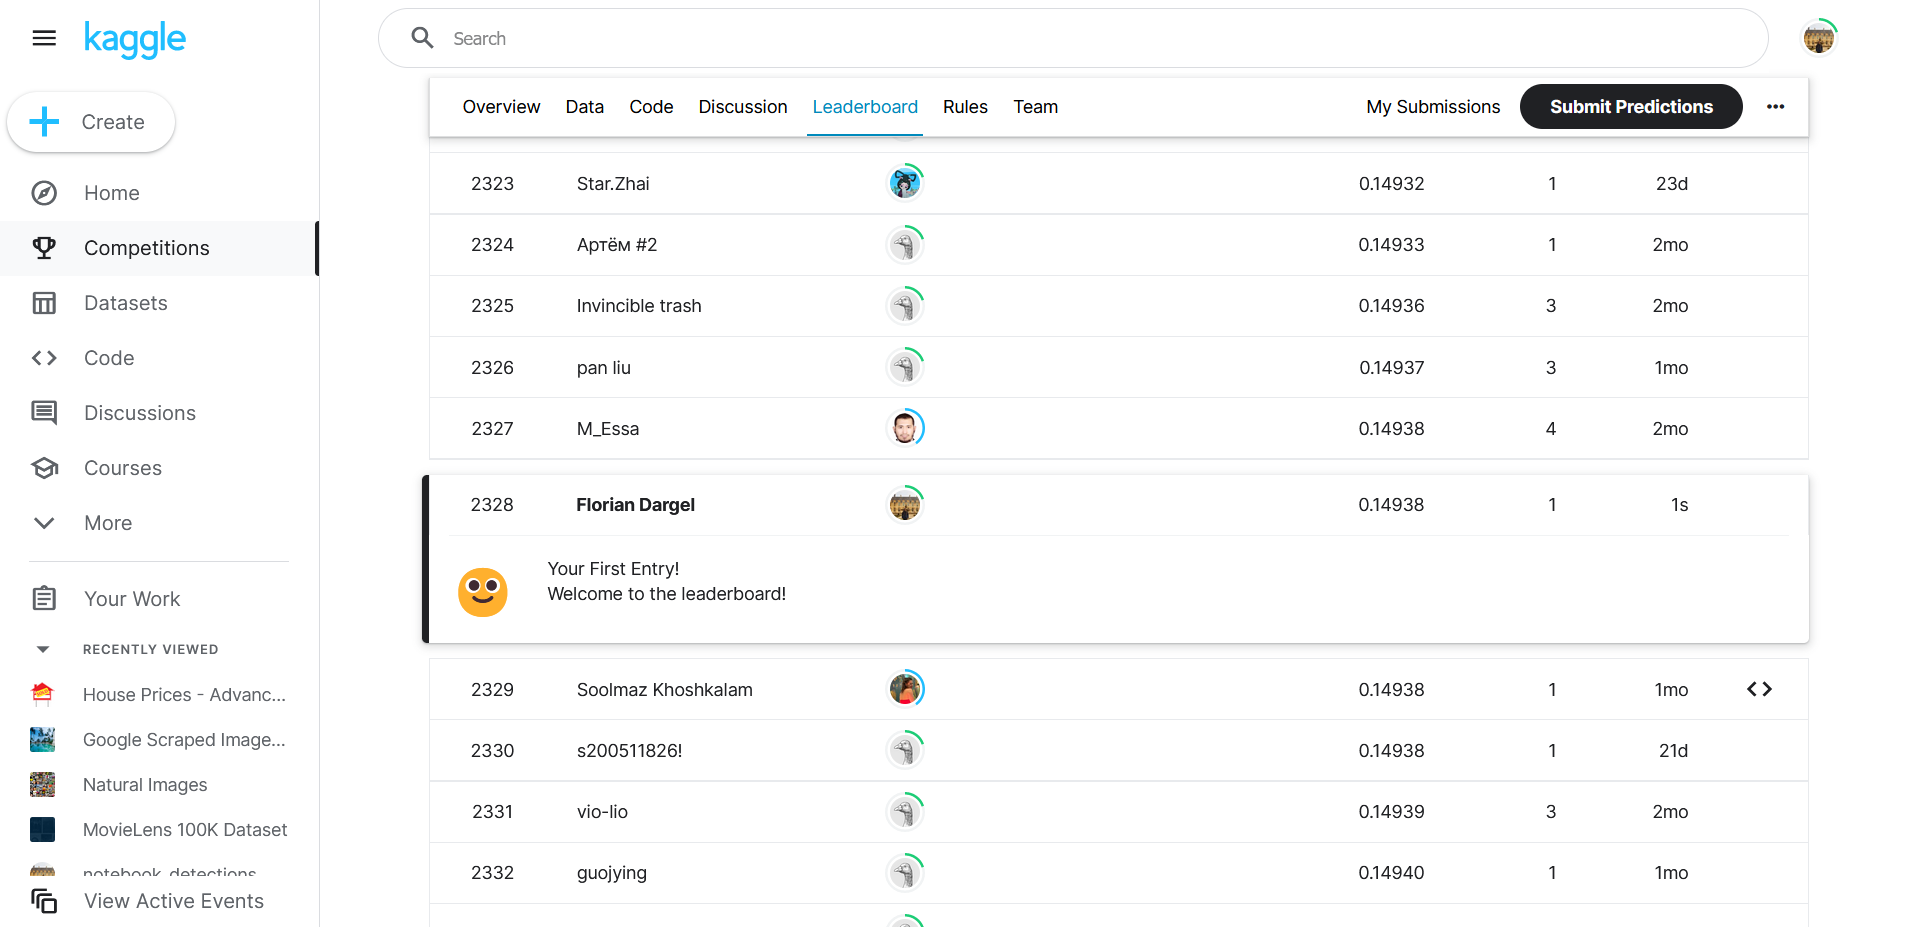

In [444]:
from PIL import Image
im = Image.open('C:/Users/na_to/OneDrive/Bureau/Projet_github/house-prices-advanced-regression-techniques/Leaderboard.PNG')
im

# 10 ] Interprétation : SHAP

In [449]:
import shapash

In [451]:
#On s'intéresse au modèle LGBM
from shapash import SmartExplainer
xpl = SmartExplainer(
  model=model_best_lgbm,
)

In [459]:
xpl.compile(
    x=scaled_dataframe_test,    
    y_pred=pd.DataFrame(Prediction_lgbm_test, columns= ['predict']), # Optional    
)

In [460]:
app = xpl.run_app()

Dash is running on http://0.0.0.0:8050/



Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
INFO:root:Your Shapash application run on http://MSI:8050/


Dash is running on http://0.0.0.0:8050/



INFO:root:Use the method .kill() to down your app.
INFO:shapash.webapp.smart_app:Dash is running on http://0.0.0.0:8050/



 * Serving Flask app "shapash.webapp.smart_app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://192.168.1.69:8050/ (Press CTRL+C to quit)
INFO:werkzeug:192.168.1.69 - - [10/Jul/2022 17:14:13] "GET / HTTP/1.1" 200 -
INFO:werkzeug:192.168.1.69 - - [10/Jul/2022 17:14:13] "GET /assets/material-icons.css?m=1657465499.5170863 HTTP/1.1" 200 -
INFO:werkzeug:192.168.1.69 - - [10/Jul/2022 17:14:13] "GET /_dash-component-suites/dash/deps/react@16.v2_5_1m1657465496.14.0.min.js HTTP/1.1" 200 -
INFO:werkzeug:192.168.1.69 - - [10/Jul/2022 17:14:13] "GET /_dash-component-suites/dash/deps/react-dom@16.v2_5_1m1657465496.14.0.min.js HTTP/1.1" 200 -
INFO:werkzeug:192.168.1.69 - - [10/Jul/2022 17:14:13] "GET /_dash-component-suites/dash/deps/prop-types@15.v2_5_1m1657465496.8.1.min.js HTTP/1.1" 200 -
INFO:werkzeug:192.168.1.69 - - [10/Jul/2022 17:14:13] "GET /assets/style.css?m=1657465499.5254416 HTTP/1.1" 200 -
INFO:werkzeug:192.168.1.69 - - [10/Jul/2022 17:14:13] "GET /_dash-component-suites/dash_daq/dash_daq.v0_5_0m1657465498.min.js HTTP/1.1" 200 -
INFO:werkzeug:1

INFO:werkzeug:192.168.1.69 - - [10/Jul/2022 17:14:51] "GET /_dash-layout HTTP/1.1" 200 -
INFO:werkzeug:192.168.1.69 - - [10/Jul/2022 17:14:51] "GET /assets/favicon.ico?m=1657465499.5127256 HTTP/1.1" 200 -
INFO:werkzeug:192.168.1.69 - - [10/Jul/2022 17:14:51] "GET /assets/shapash-fond-fonce.png HTTP/1.1" 200 -
INFO:werkzeug:192.168.1.69 - - [10/Jul/2022 17:14:51] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 200 -
INFO:werkzeug:192.168.1.69 - - [10/Jul/2022 17:14:51] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
INFO:werkzeug:192.168.1.69 - - [10/Jul/2022 17:14:51] "GET /assets/settings.png HTTP/1.1" 200 -
INFO:werkzeug:192.168.1.69 - - [10/Jul/2022 17:14:51] "GET /_dash-component-suites/dash/dash_table/async-highlight.js HTTP/1.1" 200 -
INFO:werkzeug:192.168.1.69 - - [10/Jul/2022 17:14:51] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
INFO:werkzeug:192.168.1.69 - - [10/Jul/2022 17:14:51] "GET /_dash-component-suites/d

INFO:werkzeug:192.168.1.69 - - [10/Jul/2022 17:16:02] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:192.168.1.69 - - [10/Jul/2022 17:16:06] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:192.168.1.69 - - [10/Jul/2022 17:16:06] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:192.168.1.69 - - [10/Jul/2022 17:16:08] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:192.168.1.69 - - [10/Jul/2022 17:16:08] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:192.168.1.69 - - [10/Jul/2022 17:16:08] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:192.168.1.69 - - [10/Jul/2022 17:16:08] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:192.168.1.69 - - [10/Jul/2022 17:16:10] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:192.168.1.69 - - [10/Jul/2022 17:16:10] "POST /_dash-update-component HTTP/1.1" 200 -


En allant sur le lien du site on obtient le tableau de bord interactif ci-dessous

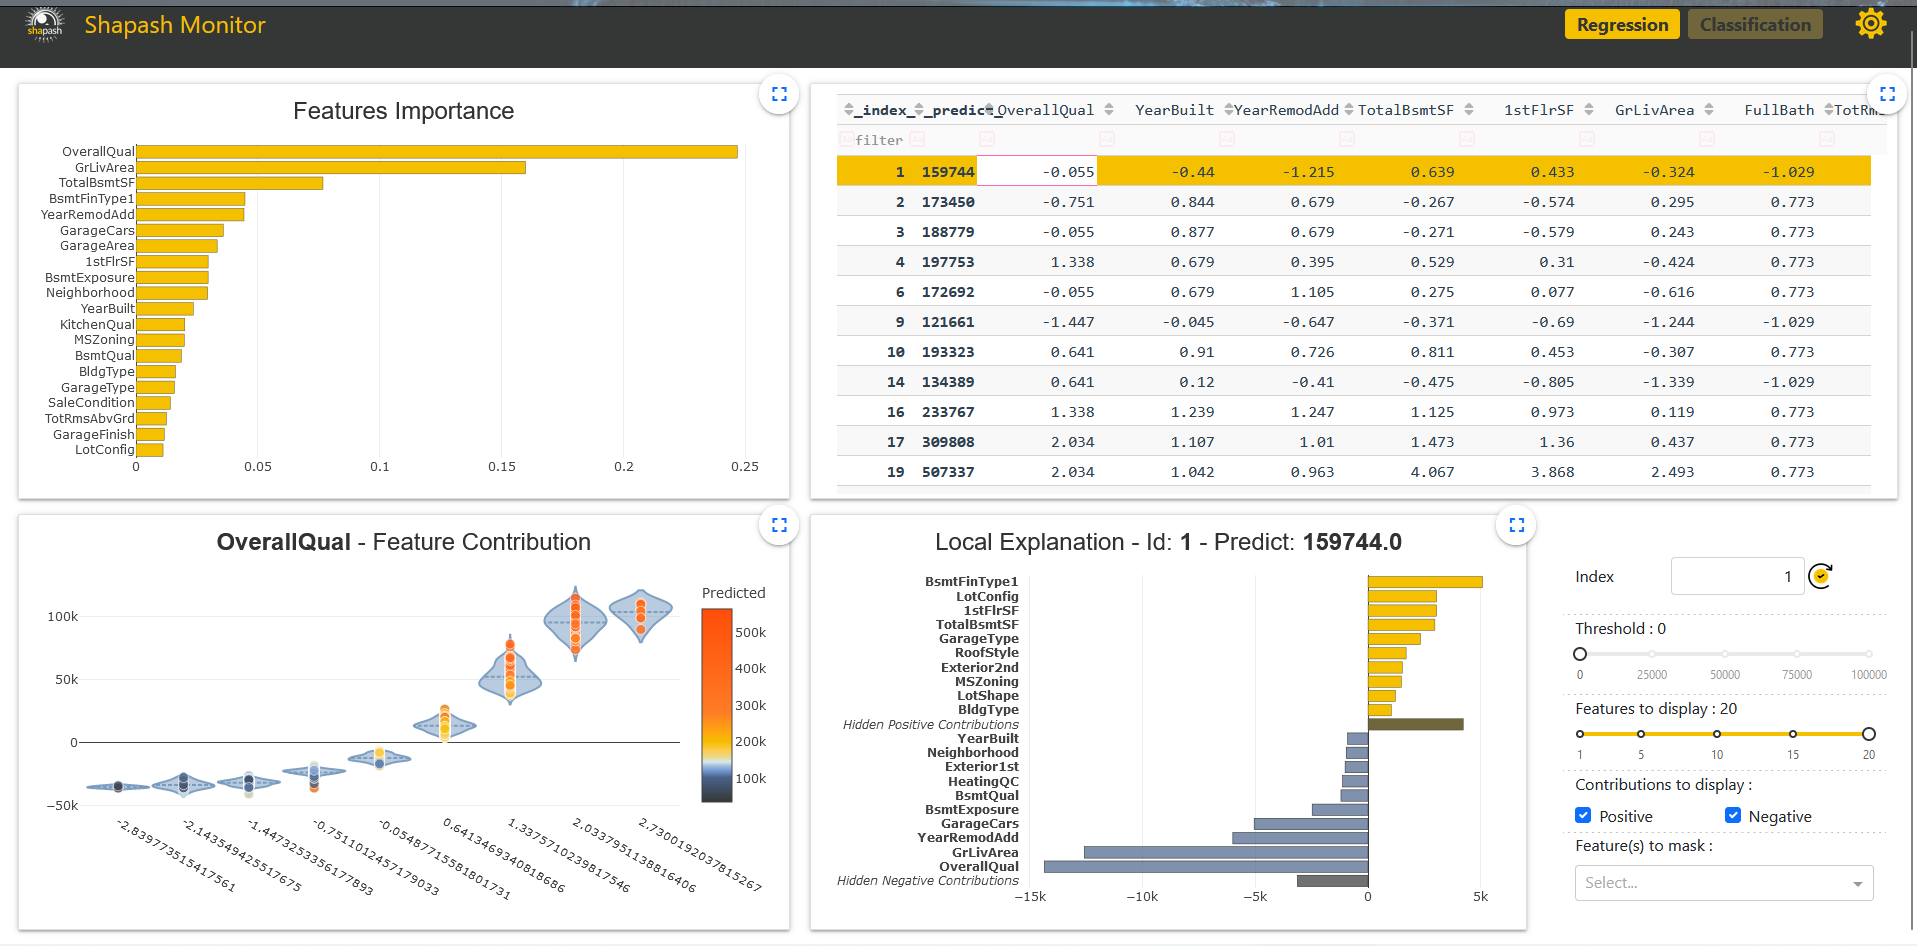

INFO:werkzeug:192.168.1.69 - - [10/Jul/2022 17:29:26] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:192.168.1.69 - - [10/Jul/2022 17:29:26] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:192.168.1.69 - - [10/Jul/2022 17:29:26] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:192.168.1.69 - - [10/Jul/2022 17:29:26] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:192.168.1.69 - - [10/Jul/2022 17:29:26] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:192.168.1.69 - - [10/Jul/2022 17:29:27] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:192.168.1.69 - - [10/Jul/2022 17:29:27] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:192.168.1.69 - - [10/Jul/2022 17:29:27] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:192.168.1.69 - - [10/Jul/2022 17:29:27] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:192.168.1.69 - - [10/Jul/2022 17:29:28] "POST /_dash-update-component HTTP/1.1" 200 -


In [461]:
from PIL import Image
im2 = Image.open('C:/Users/na_to/OneDrive/Bureau/Projet_github/house-prices-advanced-regression-techniques/Shapash.PNG')
im2

$\underline{\textbf{Explication}}$
    
$\textbf{En haut à gauche du graphique:}$
    On a l'affichage des variables les plus importantes. OverallQual s'agit de la variable la plus importante du modèle.Il s'agit d'une variable qui évalue le matériau et la finition de la maison. Les modalités de la variables sont : 
    Very Excellent / Excellent / Very Good / Good / Above Average / Average / Below Average / Fair / Poor /Very Poor. 
    
$\textbf{En bas à gauche du graphique:}$ 
    Lorsqu'on affiche par exemple la variable OverallQual. Le graphique nous enseigne que le prix de la maison peut monter de x euros ou baisser de x euros selon les valeurs de la variable OverallQuall pour chaque observation.


$\textbf{A droite du graphique, en haut et en bas:}$  On sélectionne l'observation qui nous interesse (en haut à droite) et on a les explications locales (en bas à droite), on peut savoir quelles sont les variables qui ont poussées à la hausse ou à la baisse le prix de la maison pour chaque observation.